 2021 빅데이터 통신 플랫폼 경진대회

> 팀명: **[05학번이즈백] ♡。㉦占각관￢ㅖ。♥**<br>
> 팀원: **끙정, 유칼립투스, lion_oh**

# 목차
1. 활용 데이터
2. 활용 데이터 전처리
    - 2.1. DLVR_CALL
    - 2.2. ALL_SHOP
    - 2.3. POP_DEMO
3. DLVR 분석
    - 3.1. 베이스 분석
        - 3.1.1. 주문건수 분석
        - 3.1.2. 주문취소 분석
        - 3.1.3. 주문시간 분석
    - 3.2. DELIVERY DURATION
        - 3.2.1. 주문시간별 배달소요시간
        - 3.2.2. 배달 목적지 비율
        - 3.2.3. 지역구별 총 소요시간
        - 3.2.4. 지역구별 배달소요시간
        - 3.2.5. 지역구별 배차소요시간
        - 3.2.6. 업종별 총 소요시간
        - 3.2.7. 업종별 배차소요시간
        - 3.2.8. 업종별 배송소요시간
    - 3.3. DELIVERY GROWTH
        - 3.3.1. 주차별 주문건수 추이
        - 3.3.2. 업종별 객단가
        - 3.3.3. 주차별 객단가 추이
4. ALL_SHOP 분석
    - SHUT DOWN RATE
        - 광역시도별 폐업률
        - 서울시 업종별 폐업률
        - 서울시 지역별 폐업률
        - 업종별, 지역별 폐업률
    - COMPETITION RATE
        - 전국 광역시도별 비교
        - 서울시 지역별 비교
        - 서울시 가구당 비교
5. POP_DEMO 분석
    - POPULATION TRANSFER
        - 전체 순이동 비교
        - MZ세대인구 순이동 비교
6. SOLUTION

# 서론: 코로나19로 인한 창업시장의 지각변동

코로나19로 창업시장의 패러다임이 바뀌고 있습니다. 이전까지의 창업시장 공식, 법칙, 메뉴얼이 바뀌고 있다는 뜻입니다. 특히, 코로나 시대에 자영업 생태계를 변화시키는 것은 온라인 시장입니다. 온라인 시장은 코로나 시대에 오히려 급성장하고 있기때문에 자영업 사장님들은 네이버, 쿠팡, 배달의민족 같은 온라인 플랫폼을 간과할 수 없습니다.

In [33]:
from IPython.display import Image
cl_url = 'images/그림1.png'
Image(url=cl_url, width=400)

요식업의 경우 특히, 배달의민족, 요기요와 같이 배달을 고려한 창업이 가속화되고 있습니다. 이는 **2021년 1~2월의 음식점 창업 건수가 2000년(1570개)과 2002년(1445개)에 이어 역대 셋째로 높은 수치**임을 통해 확인할 수 있습니다. 지역별로 보면 영등포구에서 158곳이 문을 열어 음식점 창업이 가장 활발했고, 이어 마포구(146개), 강서구(124개), 성동구(99개), 은평구(77개) 순입니다. 이곳들은 **오피스 밀집지나 대학가가 아닌 아파트를 비롯한 주거지가 밀집한 지역**들인 것이 공통점입니다.

이전에는 **이태원이나 명동 등 발달 상권 위주로 음식점 창업**이 이뤄졌다면, **코로나 이후에는 동네 손님을 위한 배달 음식점 창업**이 이뤄지고 있습니다. 따라서, 오피스 밀집지나 대학가가 아닌, 아파트를 비롯한 주거지가 밀집한 곳에서 음식점 창업이 활발히 이뤄지고 있다는 것을 알 수 있습니다.<br>

*[출처] 조선일보, 밀려드는 동네배달 주문… 올해 1~2월 서울 식당 1350곳 개업*

이처럼 코로나19로 오프라인 활동이 감소함에 따라 **발달상권은 축소되고, 배후지 위주의 골목상권이 급부상함에 따라 음식점의 창업 기준이 바뀌어 가고 있다**고 생각하게 되었습니다. 보다 깊이있는 분석을 위해서 창업 및 서울상권과 관련된 신문 기사, 논문, 보고서, 커뮤니티, 유튜브 등의 다양한 자료를 토대로 **배달 전문 음식점을 창업을 위한 n개의 요소를 추출**하였습니다. 또한 **배달 전문 음식점 창업을 위해 고려해야 할 n개 요소에 대해 한 눈에 알 수 있는 ‘다이아몬드 모형’을 개발**하였습니다. 이를 통해 **포스트 코로나 시대에 많은 자영업자분들이 창업 및 사업 확장에 도움**이 되셨으면 합니다.

## 활용 데이터

> **DLVR_CALL**
>>배달 호출 데이터 **(출처 : KT 통신 빅데이터 플랫폼 내 경기대학교 데이터, https://www.dacon.io/competitions/official/235753/data)<br>**
>>음식점에서 배달을 위해 배달기사를 호출하고 고객에게 배달이 완료되는 과정에서 생산되는 데이터

> **ALL_SHOP**
>>창업, 폐업 인허가 데이터 **(출처: 행정안전부, 한국지역정보개발원 데이터, https://www.localdata.go.kr/)<br>**
>>음식점 창업, 폐업에 대한 인허가 데이터이며 현재 영업 중인 음식점의 데이터

> **POP_DEMO**
>>통계청 인구 데이터 **(출처: 통계청 KOSIS 인구 통계 데이터, https://kosis.kr/index/index.do)<br>**
>>성별, 세대별, 가구별, 거주지별 인구 데이터

## 데이터 전처리

In [34]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import os
import time
import datetime as dt
from datetime import datetime
from tqdm import tqdm

### DLVR_CALL

In [35]:
kt_data_path = r'C:\Users\Wyatt\wyatt37\data\ktVisual\kt_bigdata'

In [36]:
# 컬럼이 너무 많아 외우기 힘드니 한글명으로 바꿔주겠습니다.
dlvr_cols = ['순번', '처리일시', '배달요청업체ID', '배달요청상태값','배달접수업체ID','배달상점ID','배달상점업종명',
             '배달상점법정동코드','배달상점광역시도명','배달상점시군구명','배달상점법정동명','배달상점리명',
             '배달상점행정동코드','배달상점도로명주소코드','배달목적지법정동코드','배달목적지광역시도명','배달목적지시군구명',
             '배달목적지법정동명','배달목적지리명','배달목적지행정동코드','배달목적지도로명주소코드','배달자ID',
             '배달금액','호출중계수수료금액','상품금액','결제종류값','결제카드명','배달접수시간','배달배차시간',
             '배달수령시간','배달완료시간','배달취소시간']

dlvr_call = pd.read_csv(kt_data_path + '\\dlvr_call.csv', header=0, names=dlvr_cols)

In [37]:
# \N 으로 되어 있는 빈 값을 np.nan 값으로 치환해줍니다.
dlvr_call.replace({'\\N':np.nan}, inplace=True)

In [38]:
def object_to_datetime(df, columns):
    df[columns] = pd.to_datetime(df[columns])
    return df

In [39]:
columns = ['배달접수시간', '배달배차시간', '배달수령시간', '배달완료시간', '배달취소시간']
for col in columns:
    dlvr_call = object_to_datetime(dlvr_call, col)

In [40]:
# 시간이 초단위로 집계되다가 분단위로 집계됩니다. 어쩔 수 없이 초 단위를 절삭하겠습니다.
dlvr_call['배달접수시간'] = dlvr_call.배달접수시간.dt.floor('T')
dlvr_call['배달배차시간'] = dlvr_call.배달배차시간.dt.floor('T')
dlvr_call['배달수령시간'] = dlvr_call.배달수령시간.dt.floor('T')
dlvr_call['배달완료시간'] = dlvr_call.배달완료시간.dt.floor('T')
dlvr_call['배달취소시간'] = dlvr_call.배달취소시간.dt.floor('T')

In [41]:
# 소요시간 컬럼을 따로 만듭시다.
dlvr_call['접수to배차'] = dlvr_call.배달배차시간 - dlvr_call.배달접수시간
dlvr_call['접수to수령'] = dlvr_call.배달수령시간 - dlvr_call.배달접수시간
dlvr_call['접수to완료'] = dlvr_call.배달완료시간 - dlvr_call.배달접수시간
dlvr_call['배차to수령'] = dlvr_call.배달수령시간 - dlvr_call.배달배차시간
dlvr_call['배차to완료'] = dlvr_call.배달완료시간 - dlvr_call.배달배차시간
dlvr_call['수령to완료'] = dlvr_call.배달완료시간 - dlvr_call.배달수령시간

# 취소 칼럼입니다.
dlvr_call['접수to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달접수시간
dlvr_call['배차to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달배차시간
dlvr_call['수령to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달수령시간
dlvr_call['완료to취소'] = dlvr_call.배달취소시간 - dlvr_call.배달완료시간

In [42]:
%%time
# 분으로 변환합니다.
dlvr_call['접수to배차minutes'] = dlvr_call.접수to배차.apply(lambda x: x.total_seconds()/60)
dlvr_call['접수to수령minutes'] = dlvr_call.접수to수령.apply(lambda x: x.total_seconds()/60)
dlvr_call['접수to완료minutes'] = dlvr_call.접수to완료.apply(lambda x: x.total_seconds()/60)
dlvr_call['배차to수령minutes'] = dlvr_call.배차to수령.apply(lambda x: x.total_seconds()/60)
dlvr_call['배차to완료minutes'] = dlvr_call.배차to완료.apply(lambda x: x.total_seconds()/60)
dlvr_call['수령to완료minutes'] = dlvr_call.수령to완료.apply(lambda x: x.total_seconds()/60)

# 분으로 변환합니다.
dlvr_call['접수to취소minutes'] = dlvr_call.접수to취소.apply(lambda x: x.total_seconds()/60)
dlvr_call['배차to취소minutes'] = dlvr_call.배차to취소.apply(lambda x: x.total_seconds()/60)
dlvr_call['수령to취소minutes'] = dlvr_call.수령to취소.apply(lambda x: x.total_seconds()/60)
dlvr_call['완료to취소minutes'] = dlvr_call.완료to취소.apply(lambda x: x.total_seconds()/60)

Wall time: 3min 39s


In [43]:
# dt를 활용해서 배달월, 배달일, 배달시간, 배달요일 을 추가로 만들겠습니다.
dlvr_call['주문월'] = dlvr_call.배달접수시간.dt.month
dlvr_call['주문일'] = dlvr_call.배달접수시간.dt.day
dlvr_call['주문시간'] = dlvr_call.배달접수시간.dt.hour
dlvr_call['주문요일'] = dlvr_call.배달접수시간.dt.weekday
dlvr_call['주문주차'] = dlvr_call.배달접수시간.dt.weekofyear

In [44]:
# 19년 12월은 순서에 맞게 음수로 변환해줍니다.
# 19년 12월 1일은 일요일이라 따로 잡힙니다.
dlvr_call['주문주차'] = dlvr_call.주문주차.replace({48:-4, 49:-3, 50:-2, 51:-1, 52:0})

In [45]:
# 아웃라이어가 있으니 정규화를 통해 극단값을 삭제하겠습니다.
remove_cols = ['접수to배차minutes','접수to수령minutes', '접수to완료minutes','배차to수령minutes', '배차to완료minutes','수령to완료minutes']

In [46]:
dlvr = dlvr_call.copy()

In [47]:
# z-score를 구하고 3이 넘어가는 값을 제외하겠습니다.
print(dlvr_call.shape)
for col in remove_cols:
    mean_ = dlvr[col].mean()
    std_ = dlvr[col].std()
    dlvr.loc[:, 'temp'] = abs((dlvr.loc[:, col] - mean_) / std_)
    dlvr = dlvr.loc[dlvr.temp < 3]
    print(dlvr.shape)
dlvr.drop(['temp'], axis=1, inplace=True)

(4296271, 57)
(4204928, 58)
(4163058, 58)
(4144176, 58)
(4094605, 58)
(4063034, 58)
(4024447, 58)


In [48]:
# 취소 레코드를 지운 df를 하나 더 만들어주겠습니다.
dlvr_uncanceled = dlvr.loc[dlvr.배달취소시간.isnull()]
dlvr_uncanceled.shape

(4024088, 57)

In [49]:
# 취소에 대해서만 df를 하나 더 만들어줍니다.
dlvr_canceled = dlvr_call.loc[~dlvr_call.배달취소시간.isnull()]
dlvr_canceled.shape

(75279, 57)

### ALL_SHOP

In [50]:
all_shop_df = pd.read_csv(r'C:\Users\Wyatt\wyatt37\data\ktVisual\fulldata_07_24_04_P.csv', encoding='cp949')

In [51]:
all_shop_df.shape

(1950134, 48)

In [52]:
all_shop_df.columns

Index(['번호', '개방서비스명', '개방서비스id', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총종업원수',
       '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액',
       '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지',
       'Unnamed: 47'],
      dtype='object')

In [53]:
# 필요없는 컬럼을 드랍합니다.
all_shop_df.drop(['개방서비스명', '개방서비스id', '개방자치단체코드', '인허가취소일자', '휴업시작일자',
                  '휴업종료일자', '재개업일자', '홈페이지', 'Unnamed: 47', '최종수정시점', '데이터갱신구분', '데이터갱신일자',
                  '좌표정보(x)', '좌표정보(y)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명',
                  '급수시설구분명', '총종업원수', '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수',
                  '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식'],
                 axis=1, inplace=True)

In [54]:
# 소재지전체주소의 결측치가 약 5천건 존재하는데, 서울시의 결측치가 237건이기에 drop을 해주겠습니다.
# 도로명주소를 넣어주려면 동단위까지 주소가 나오지 않기 때문에(사실 번거롭기 때문에) 제외를 해주겠습니다.
# 소재지전체주소에 결측치가 있는 레코드를 드랍해줍니다.
all_shop_df = all_shop_df.loc[~all_shop_df.소재지전체주소.isnull()].reset_index()
all_shop_df.shape

(1945971, 17)

**인허가일자**

In [55]:
# 1086년부터 9187년까지 있습니다. 1970년도부터 2021년 7월 까지만 가져갑니다.
all_shop_df = all_shop_df.loc[(all_shop_df.인허가일자 >= 19700000) & (all_shop_df.인허가일자 <= 20210731)].reset_index(drop=True)
all_shop_df.shape

(1944472, 17)

In [56]:
# datetime64 타입으로 변환해주겠습니다.
new_date = []
for i in range(len(all_shop_df)):
    try:
        new_date.append(pd.to_datetime(str(all_shop_df.인허가일자[i]) + ' 00:00:00'))
    except: # 형식에 맞지 않는 데이터를 버려주기 위해 drop으로 구분해줍니다.
        new_date.append('drop')

In [57]:
all_shop_df['new_date'] = new_date
# drop으로 구분된 레코드를 버려줍니다.
all_shop_df = all_shop_df.loc[all_shop_df.new_date != 'drop'].reset_index(drop=True)
# datetime 형식으로 바꿔줍니다.
all_shop_df['인허가일자'] = pd.to_datetime(all_shop_df.new_date)

In [58]:
# dt를 통해 각종 시간축 컬럼을 만들어줍니다.
all_shop_df['인허가일자년'] = all_shop_df.인허가일자.dt.year.astype(str)
all_shop_df['인허가일자월'] = all_shop_df.인허가일자.dt.month.astype(str)
all_shop_df['인허가일자일'] = all_shop_df.인허가일자.dt.day
all_shop_df['인허가일자요일'] = all_shop_df.인허가일자.dt.weekday
all_shop_df['인허가일자주'] = all_shop_df.인허가일자.dt.weekofyear

In [59]:
# 시간연속성을위해 연월 컬럼을 만듭니다.
all_shop_df.loc[~all_shop_df.인허가일자월.isin(['10', '11', '12']), '인허가일자년월'] = all_shop_df.인허가일자년 + '0' + all_shop_df.인허가일자월
all_shop_df.loc[all_shop_df.인허가일자월.isin(['10', '11', '12']), '인허가일자년월'] = all_shop_df.인허가일자년 + all_shop_df.인허가일자월

In [60]:
all_shop_df.shape

(1944453, 24)

**폐업일자**

In [61]:
# 폐업일자는 nan값이 존재하기 때문에 object로 되어 있습니다.
all_shop_df['폐업일자'] = all_shop_df.폐업일자.fillna(-1)
all_shop_df['폐업일자'] = all_shop_df.폐업일자.apply(lambda x: str(x).replace(' ', '0'))
all_shop_df['폐업일자'] = all_shop_df.폐업일자.astype(float)
all_shop_df['폐업일자'] = all_shop_df.폐업일자.astype(int)

In [62]:
# datetime64 타입으로 변환해주겠습니다.
new_date = []
for i in range(len(all_shop_df)):
    try:
        new_date.append(pd.to_datetime(str(all_shop_df.폐업일자[i]) + ' 00:00:00'))
    except:
        new_date.append(np.nan)

In [63]:
all_shop_df['new_date'] = new_date
all_shop_df['폐업일자'] = pd.to_datetime(all_shop_df.new_date)

In [64]:
all_shop_df['폐업일자년'] = all_shop_df.폐업일자.dt.year.astype(str)
all_shop_df['폐업일자월'] = all_shop_df.폐업일자.dt.month.astype(str)
all_shop_df['폐업일자일'] = all_shop_df.폐업일자.dt.day
all_shop_df['폐업일자요일'] = all_shop_df.폐업일자.dt.weekday
all_shop_df['폐업일자주'] = all_shop_df.폐업일자.dt.weekofyear

In [65]:
# 시간연속성을위해 연월 컬럼을 만듭니다.
all_shop_df.loc[~all_shop_df.폐업일자월.isin(['10', '11', '12']), '폐업일자년월'] = all_shop_df.폐업일자년 + '0' + all_shop_df.폐업일자월
all_shop_df.loc[all_shop_df.폐업일자월.isin(['10', '11', '12']), '폐업일자년월'] = all_shop_df.폐업일자년 + all_shop_df.폐업일자월

In [66]:
all_shop_df['폐업일자년월'] = all_shop_df.폐업일자년월.replace('nan0nan', np.nan)

In [67]:
all_shop_df['폐업일자년월'] = all_shop_df.폐업일자년월.apply(lambda x: str(x).replace('.0', ''))

In [68]:
# 2021-07-31 이후에 폐업한 데이터가 30건 가량 있습니다...
# 1970-01-01 이전에 폐업한 데이터도 있습니다.. 다 날려줍니다. 전부 1899 로 입력되어 있는 것으로 봐서 오류가 있었던 것 같습니다.
all_shop_df = all_shop_df.loc[~(all_shop_df.폐업일자 > '2021-07-31') & ~(all_shop_df.폐업일자 < '1970-01-01')]
all_shop_df.shape

(1943537, 30)

**소재지전체주소**

In [69]:
# nan값이 아닌데도 주소가 비어있는 친구들이 있습니다....
# 이친구들 때문에 apply lambda도 에러고, .loc 도 에러입니다...
# 어쩔 수 없이 for문을 돌립니다.

add_0 = [] # 광역시도
add_1 = [] # 시군구
add_2 = [] # 읍면동
add_3 = [] # 번지

for i in range(len(all_shop_df)):
    try:
        add_0.append(all_shop_df.소재지전체주소[i].split(' ')[0])
    except:
        add_0.append(np.nan)
    try:
        add_1.append(all_shop_df.소재지전체주소[i].split(' ')[1])
    except:
        add_1.append(np.nan)
    try:
        add_2.append(all_shop_df.소재지전체주소[i].split(' ')[2])
    except:
        add_2.append(np.nan)
    try:
        add_3.append(all_shop_df.소재지전체주소[i].split(' ')[3])
    except:
        add_3.append(np.nan)

In [70]:
# 만든 리스트를 변수로 넣어줍니다.
all_shop_df['소재지주소광역시도'] = add_0
all_shop_df['소재지주소시군구'] = add_1
all_shop_df['소재지주소읍면동'] = add_2
all_shop_df['소재지주소번지'] = add_3

In [71]:
# 주소지가 그래도 이상한 애들이 45건 있습니다. 제거하겠습니다.
all_shop_df = all_shop_df.loc[all_shop_df.소재지주소광역시도.isin(['서울특별시', '경기도', '경상남도', '부산광역시', '경상북도',
                                                          '인천광역시', '강원도', '대구광역시', '충청남도', '전라남도',
                                                          '충청북도', '전라북도', '대전광역시', '광주광역시', '울산광역시',
                                                          '제주특별자치도', '세종특별자치시'])]

all_shop_df.shape

(1942576, 34)

**업태구분명**

- 업태구분이 되어 있지만 배달 데이터의 업종 구분과 다소 차이점이 있습니다.
- 명확한 비교를 위해서 최대한 업태 구분을 조정해주겠습니다.

In [72]:
# 기준은 DLVR_CALL 입니다.
all_shop_df.loc[all_shop_df.업태구분명.isin(['호프/통닭', '통닭(치킨)']), '업태구분명'] = '치킨' # 호프/통닭 + 통닭(치킨) = 치킨
all_shop_df.loc[all_shop_df.업태구분명.isin(['탕류(보신용)', '복어취급']), '업태구분명'] = '찜탕' # 탕류(보신용) + 복어취급 = 찜탕
all_shop_df.loc[all_shop_df.업태구분명.isin(['식육(숯불구이)']), '업태구분명'] = '한식' # 식육(숯불구이) = 한식
all_shop_df.loc[all_shop_df.업태구분명.isin(['김밥(도시락)', '김밥', '분식']), '업태구분명'] = '분식' # 김밥(도시락) + 분식 = 분식
all_shop_df.loc[all_shop_df.업태구분명.isin(['중국식']), '업태구분명'] = '중식' # 중국식 -> 중식
all_shop_df.loc[all_shop_df.업태구분명.isin(['카페', '까페', '커피숍']), '업태구분명'] = '카페/디저트' # 카페 + 까페 + 커피숍 -> 카페/디저트
all_shop_df.loc[all_shop_df.업태구분명.isin(['외국음식전문점(인도,태국등)']), '업태구분명'] = '아시안/양식' # 외국음식전문점(인도, 태국등) -> 아시안/양식
all_shop_df.loc[all_shop_df.업태구분명.isin(['경양식', '일식']), '업태구분명'] = '돈까스/일식' # 경양식 + 일식 -> 돈까스/일식
all_shop_df.loc[all_shop_df.업태구분명.isin(['횟집', '회집']), '업태구분명'] = '회' # 횟집 + 회집 = 회
all_shop_df.loc[all_shop_df.업태구분명.isin(['냉면집']), '업태구분명'] = '야식' # 냉면집 -> 야식

In [73]:
# 일단 식당은 한식입니다. 구이류를 한식으로 통합합니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('식당') == True, '업태구분명'] = '한식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('숯불') == True, '업태구분명'] = '한식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('구이') == True, '업태구분명'] = '한식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('갈비') == True, '업태구분명'] = '한식'

# 치킨류를 통합해줍니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('치킨') == True, '업태구분명'] = '치킨'
all_shop_df.loc[all_shop_df.사업장명.str.contains('통닭') == True, '업태구분명'] = '치킨'
all_shop_df.loc[all_shop_df.사업장명.str.contains('BBQ') == True, '업태구분명'] = '치킨'
all_shop_df.loc[all_shop_df.사업장명.str.contains('닭강정') == True, '업태구분명'] = '치킨'

# 돈까스/일식으로 통합해줍니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('경양식') == True, '업태구분명'] = '돈까스/일식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('돈가스') == True, '업태구분명'] = '돈까스/일식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('돈까스') == True, '업태구분명'] = '돈까스/일식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('연어') == True, '업태구분명'] = '돈까스/일식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('스시') == True, '업태구분명'] = '돈까스/일식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('우동') == True, '업태구분명'] = '돈까스/일식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('오뎅') == True, '업태구분명'] = '돈까스/일식'

# 카페/디저트를 만들어줍니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('커피') == True, '업태구분명'] = '카페/디저트'
all_shop_df.loc[all_shop_df.사업장명.str.contains('카페') == True, '업태구분명'] = '카페/디저트'
all_shop_df.loc[all_shop_df.사업장명.str.contains('투썸') == True, '업태구분명'] = '카페/디저트'
all_shop_df.loc[all_shop_df.사업장명.str.contains('샐러') == True, '업태구분명'] = '카페/디저트'
all_shop_df.loc[all_shop_df.사업장명.str.contains('프레즐') == True, '업태구분명'] = '카페/디저트'
all_shop_df.loc[all_shop_df.사업장명.str.contains('도넛') == True, '업태구분명'] = '카페/디저트'

# 족발/보쌈을 만들어줍니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('족발') == True, '업태구분명'] = '족발/보쌈'
all_shop_df.loc[all_shop_df.사업장명.str.contains('보쌈') == True, '업태구분명'] = '족발/보쌈'

# 떡볶이, 김밥류를 분식으로 넣어줍니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('떡볶이') == True, '업태구분명'] = '분식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('김밥') == True, '업태구분명'] = '분식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('분식') == True, '업태구분명'] = '분식'

# 도시락을 따로 만들어줍니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('도시락') == True, '업태구분명'] = '도시락'

# 중식으로 통합해줍니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('반점') == True, '업태구분명'] = '중식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('중화요리') == True, '업태구분명'] = '중식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('중식') == True, '업태구분명'] = '중식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('만두') == True, '업태구분명'] = '중식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('양꼬치') == True, '업태구분명'] = '중식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('짜장') == True, '업태구분명'] = '중식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('자장') == True, '업태구분명'] = '중식'

# 국밥, 탕, 찌개, 찜 등, 국물요리 전부 찜탕입니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('국밥') == True, '업태구분명'] = '찜탕'
all_shop_df.loc[all_shop_df.사업장명.str.contains('탕') == True, '업태구분명'] = '찜탕'
all_shop_df.loc[all_shop_df.사업장명.str.contains('순대') == True, '업태구분명'] = '찜탕'
all_shop_df.loc[all_shop_df.사업장명.str.contains('해장국') == True, '업태구분명'] = '찜탕'
all_shop_df.loc[all_shop_df.사업장명.str.contains('찌개') == True, '업태구분명'] = '찜탕'
all_shop_df.loc[all_shop_df.사업장명.str.contains('찜') == True, '업태구분명'] = '찜탕'

# 피자는 쉽습니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('피자') == True, '업태구분명'] = '피자'

# 빵으로 만드는 빠른 음식 전부 패스트푸드입니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('버거') == True, '업태구분명'] = '패스트푸드'
all_shop_df.loc[all_shop_df.사업장명.str.contains('에그') == True, '업태구분명'] = '패스트푸드'
all_shop_df.loc[all_shop_df.사업장명.str.contains('핫도그') == True, '업태구분명'] = '패스트푸드'
all_shop_df.loc[all_shop_df.사업장명.str.contains('반미') == True, '업태구분명'] = '패스트푸드'
all_shop_df.loc[all_shop_df.사업장명.str.contains('토스트') == True, '업태구분명'] = '패스트푸드'

# 아시안/양식 으로 통합해줍니다. 주로 멕시코, 인도, 태국, 베트남, 이탈리안이 있습니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('멕시칸') == True, '업태구분명'] = '아시안/양식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('인도') == True, '업태구분명'] = '아시안/양식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('쌀국수') == True, '업태구분명'] = '아시안/양식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('파스타') == True, '업태구분명'] = '아시안/양식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('스파게티') == True, '업태구분명'] = '아시안/양식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('태국') == True, '업태구분명'] = '아시안/양식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('타이') == True, '업태구분명'] = '아시안/양식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('베트남') == True, '업태구분명'] = '아시안/양식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('월남') == True, '업태구분명'] = '아시안/양식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('타코') == True, '업태구분명'] = '아시안/양식'

# 야식 업종을 만들어줍니다. 주로 곱창, 냉면, 닭발 등이 있습니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('곱창') == True, '업태구분명'] = '야식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('야식') == True, '업태구분명'] = '야식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('냉면') == True, '업태구분명'] = '야식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('불닭') == True, '업태구분명'] = '야식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('닭발') == True, '업태구분명'] = '야식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('포차') == True, '업태구분명'] = '야식'
all_shop_df.loc[all_shop_df.사업장명.str.contains('면옥') == True, '업태구분명'] = '야식'

# 회로 통합해줍니다.
all_shop_df.loc[all_shop_df.사업장명.str.contains('수산') == True, '업태구분명'] = '회'
all_shop_df.loc[all_shop_df.사업장명.str.contains('횟집') == True, '업태구분명'] = '회'

In [74]:
# 배달과 상관없는 업종은 드랍합니다.
all_shop_df = all_shop_df.loc[~all_shop_df.업태구분명.isin(['전통찻집', '라이브카페', '출장조리', '기타'
                                                       '패밀리레스트랑', '감성주점', '키즈카페', '이동조리', '기타 휴게음식점',
                                                       '일반조리판매', '룸살롱', '다방', '즉석판매제조가공업', '간이주점',
                                                       '식품등 수입판매업', '관광호텔', '제과점영업', '편의점', '도매업(유통)',
                                                       '식품첨가물제조업', '방문판매', '식품제조가공업', '식품소분업',
                                                       '뷔페식', '정종/대포집/소주방'])]

In [75]:
all_shop_df.업태구분명.unique()

array(['돈까스/일식', '한식', '야식', '기타', '분식', '중식', '카페/디저트', '도시락', '치킨',
       '찜탕', '패밀리레스트랑', '패스트푸드', '족발/보쌈', '아시안/양식', '회', '피자', nan],
      dtype=object)

**마무리**

In [76]:
# 그래도 필요없는 없는 컬럼이 너무 많습니다. 일단 지워줍니다.
all_shop_df.drop(['영업상태구분코드', '영업상태명', '상세영업상태코드', '소재지전화',
                  '소재지면적', '도로명우편번호', 'new_date', '소재지전체주소', '도로명전체주소',], axis=1, inplace=True)

In [77]:
# 수치적으로 나중에 활용하기 위해 OC컬럼을 만들어줍니다.
all_shop_df.loc[all_shop_df.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df.loc[all_shop_df.상세영업상태명 == '폐업', 'OC'] = 1

### POP_DEMO

In [78]:
kosis_path = r'C:\Users\Wyatt\wyatt37\data\ktVisual\kosis'
file_list = os.listdir(kosis_path)
pop_unit = pd.read_csv(kosis_path + '\\' + file_list[1], encoding='cp949', header=[0,1])     # 가구별 인구 테이블
pop_age = pd.read_csv(kosis_path + '\\' + file_list[3], encoding='cp949')                    # 나이별 인구 테이블
pop_type = pd.read_csv(kosis_path + '\\' + file_list[4], encoding='cp949', header=[0,1])     # 거주형태별 인구 테이블
pop_all = pd.read_csv(kosis_path + '\\' + file_list[5], encoding='cp949')                    # 총인구 테이블
pop_transfer = pd.read_csv(kosis_path + '\\' + file_list[6], encoding='cp949', header=[0,1]) # 전출입 인구 테이블
pop_one = pd.read_csv(kosis_path + '\\' + file_list[7], encoding = 'cp949', names = ['자치구', '2020_1인가구_비율', '2020_1인가구', '2020_일반가구']).iloc[3:]
pop_total = pd.read_csv(kosis_path + '\\' + file_list[8], encoding = 'cp949')

**총인구수**

In [79]:
pop_age = pop_age.loc[1:]

In [80]:
pop_age['2017'] = pop_age['2017'].astype(int)
pop_age['2018'] = pop_age['2018'].astype(int)
pop_age['2019'] = pop_age['2019'].astype(int)
pop_age['2020'] = pop_age['2020'].astype(int)

In [81]:
# 총 인구수를 만듭니다.
pop_age_sum = pop_age.groupby(['행정구역별(읍면동)']).sum()

In [82]:
pop_age_sum.rename({'2017': '총인구2017', '2018': '총인구2018', '2019': '총인구2019', '2020': '총인구2020'}, axis=1, inplace=True)

**MZ세대(15 ~ 39세) 인구수**

In [83]:
# MZ세대 인구수를 만듭니다.
pop_age_mz = pop_age.loc[pop_age.연령별.isin(['15~19세', '20~24세', '25~29세', '30~34세', '35~39세'])].groupby(['행정구역별(읍면동)']).sum()

In [84]:
pop_age_mz.rename({'2017': 'MZ인구2017', '2018': 'MZ인구2018', '2019': 'MZ인구2019', '2020': 'MZ인구2020'}, axis=1, inplace=True)

**1인가구수**

In [85]:
pop_single = (
    pop_unit
    .set_index(('행정구역별(시군구)', '행정구역별(시군구)'))
    .loc[:, [('2018', '1인가구'), ('2019', '1인가구'), ('2020', '1인가구'),
             ('2018', '일반가구원'), ('2019', '일반가구원'), ('2020', '일반가구원')]]
    .reset_index()
)

In [86]:
pop_single.columns = ['지역구', '일인가구2018', '일인가구2019', '일인가구2020', '전체가구2018', '전체가구2019', '전체가구2020']

In [87]:
pop_single.set_index('지역구', inplace=True)

**주거형태**<br>
통계청이 데이터를 수집한 기준에 의하면 단독주택에 원룸이 포함, 주택이외의 거처에 고시원, 오피스텔, 여관 등이 포함되어 있습니다. 따라서 단독주택 + 주택이외의 거처 = 1 ~ 2인 가구들이 주로 거주하고, 연립주택 + 다세대주택 + 아파트 = 3 ~ 인 가구들이 주로 거주 하는 것으로 알 수 있습니다.<br>
*[출처] 동아일보, 1인 가구 절반 이상이 단독주택 거주? 알고보니 ‘원룸’도 단독주택*

In [88]:
temp = (
    pop_type
    .loc[1:]
    .set_index(('행정구역별(읍면동)', '행정구역별(읍면동)'))
    .stack()
    .reset_index()
)

In [89]:
temp = (
    temp
    .loc[temp['level_1'].isin(['단독주택 (호)', '주택이외의 거처 (호)'])]
    .groupby([('행정구역별(읍면동)', '행정구역별(읍면동)')])
    .sum()
    .reset_index()
)

In [90]:
temp.columns = ['지역구', '미니주택2018', '미니주택2019', '미니주택2020']

In [91]:
pop_type_mini = temp.set_index('지역구')

In [92]:
temp = (
    pop_type
    .loc[1:]
    .set_index(('행정구역별(읍면동)', '행정구역별(읍면동)'))
    .stack()
    .reset_index()
)

In [93]:
temp = (
    temp
    .loc[temp['level_1'].isin(['아파트 (호)', '연립주택 (호)', '다세대주택 (호)'])]
    .groupby([('행정구역별(읍면동)', '행정구역별(읍면동)')])
    .sum()
    .reset_index()
)

In [94]:
temp.columns = ['지역구', '큰주택2018', '큰주택2019', '큰주택2020']

In [95]:
pop_type_big = temp.set_index('지역구')

**형록**

In [96]:
# 서울시 자치구별 1인가구 비율
pop_one['2020_1인가구_비율'] = pop_one['2020_1인가구_비율'].astype(np.float)
pop_one['2020_1인가구'] = pop_one['2020_1인가구'].astype(np.float)
pop_one['2020_일반가구'] = pop_one['2020_일반가구'].astype(np.float)

# 서울시 자치구별 주민등록인구 수 및 세대현황에서...
## 자리숫 표시를 위해 사용된 ',' 제거 후 변수타입 변환해주자
## 제공받은 배달 데이터가 2020년 6월까지 이므로, 2020년 6월에 조사된 총인구수를 사용합니다.
pop_total['2020년06월_총인구수'] = pop_total['2020년06월_총인구수'].apply(lambda x : x.replace(',', "")).astype(np.float)
pop_total['2020년06월_세대수'] = pop_total['2020년06월_세대수'].apply(lambda x : x.replace(',', "")).astype(np.float)
pop_total['2020년06월_남자 인구수'] = pop_total['2020년06월_남자 인구수'].apply(lambda x : x.replace(',', "")).astype(np.float)
pop_total['2020년06월_여자 인구수'] = pop_total['2020년06월_여자 인구수'].apply(lambda x : x.replace(',', "")).astype(np.float)

In [97]:
# 연령대 카테고리를 묶습니다.
age_g = {
 '0~4세' : '10세미만',
 '5~9세' : '10세미만',
 '10~14세' : '10대',
 '15~19세' : '10대',
 '20~24세' : '20대',
 '25~29세' : '20대',
 '30~34세' : '30대',
 '35~39세' : '30대',
 '40~44세' : '40대',
 '45~49세' : '40대',
 '50~54세' : '50대',
 '55~59세' : '50대',
 '60~64세' : '60대',
 '65~69세' : '60대',
 '70~74세' : '70세 이상',
 '75~79세' : '70세 이상',
 '80~84세' : '70세 이상',
 '85~89세' : '70세 이상',
 '90~94세' : '70세 이상',
 '95~99세' : '70세 이상'}

def _get_ageg(age):
    '''
        연령별 카테고리를 연령대 군집하는 함수 정의
        age: 연령별, pop: 2020총인구(명)
    '''
    return age_g[age]

def _get_ratio(region, pop):
    '''
        자치구별 연령대 비율 함수 정의
        region: 자치구, pop: 인구 수
    '''
    global pop_age_region
    
    return round(pop / (pop_age_region[pop_age_region['행정구역별(읍면동)'] == region]['2020'].values[0]) * 100,1)

In [98]:
# 우선 연령대를 다시 라벨링 합니다.
pop_age['age_g'] = pop_age.apply(lambda x: _get_ageg(x['연령별']), axis = 1)

# 그리고 라벨링된 연령대와 자치구 기준으로 집계하여 자치구 및 연령대별 2020총인구를 구하고..
pop_age1 = pop_age.groupby(['행정구역별(읍면동)','age_g']).agg({'2020': np.sum}).reset_index()

# 각 연령대별 인구비율을 구하기위해 자치구별 2020총인구 수를 만들어 놓고..
pop_age_region = pop_age1.groupby('행정구역별(읍면동)').agg({'2020':np.sum}).reset_index()

# 최종적으로 인구비율 변수를 만들어줍니다.
pop_age1['연령대비율(%)'] = pop_age1.apply(lambda x: _get_ratio(x['행정구역별(읍면동)'], x['2020']), axis = 1)

In [99]:
# 서울시 자치구별 남/여 비율
pop_gender = pop_total[['자치구', '2020년06월_총인구수', '2020년06월_남자 인구수', '2020년06월_여자 인구수']]
def _get_gen_ratio(total, male, female):
    '''
        자치구별 남/여 비율 구하는 함수 정의
        total: 전체 인구 수
        male: 남자 인구 수
        female: 여자 인구 수
    '''
    return pd.Series([round(male/total*100,1), round(female/total*100,1)])

pop_gender[['2020년6월_남자 비율', '2020년6월_여자 비율']] = pop_gender.apply(lambda x: _get_gen_ratio(x['2020년06월_총인구수'],x['2020년06월_남자 인구수'], x['2020년06월_여자 인구수']), axis = 1)

In [116]:
# 서울시 자치구별 MZ세대 비율
pop_table["MZ인구비율2020"] = pop_table.apply(lambda x: round(x['MZ인구2020']/x['총인구2020']*100,1), axis = 1)
pop_table["미니주택비율2020"] = pop_table.apply(lambda x: round(x['미니주택2020']/(x['미니주택2020'] + x['큰주택2020'])*100,1), axis = 1)
pop_table["큰주택비율2020"] = pop_table.apply(lambda x: round(x['큰주택2020']/(x['미니주택2020'] + x['큰주택2020'])*100,1), axis = 1)

* 전처리가 끝난 각 데이터셋에서 시각화에 필요한 변수들만 모아보자

In [117]:
pop_total_f = pop_total[['자치구', '2020년06월_총인구수', '2020년06월_세대수', '2020년06월_세대당 인구']]
pop_one_f =  pop_one[['자치구', '2020_1인가구_비율', '2020_1인가구','2020_일반가구']]
pop_age1_f = pop_age1[['행정구역별(읍면동)', 'age_g', '연령대비율(%)']]
pop_gender_f = pop_gender[['자치구', '2020년6월_남자 비율', '2020년6월_여자 비율']]
pop_mz_f = pop_table[['MZ인구2020', 'MZ인구비율2020', '미니주택비율2020', '큰주택비율2020']].reset_index()

df = pop_total_f.merge(pop_one_f, on = '자치구', how = 'left')
df1 = df.merge(pop_age1_f, left_on = '자치구', right_on = '행정구역별(읍면동)', how = 'left')
df2 = df1.merge(pop_gender_f, on = '자치구', how = 'left')
pop_final = df2.merge(pop_mz_f, left_on = '자치구', right_on = 'index', how = 'left')

In [118]:
# 최종 인구통계 데이터
pop_final.drop(['index'], axis=1, inplace=True)

**합치기**

In [119]:
# 서울시 지역구별 데이터를 합쳐줍니다.
pop_table = pd.concat([pop_age_sum, pop_age_mz, pop_single, pop_type_mini, pop_type_big], axis=1)

In [120]:
# 전국 총인구 테이블은 따로 준비해줍니다.
pop_all = pd.pivot(data=pop_all, index='행정구역별(읍면동)', columns='연령별', values='총인구(명)')

In [121]:
# 15~39세를 합쳐서 MZ인구를 만들어줍니다.
pop_all['MZ인구'] = pop_all.iloc[:, :5].sum(axis=1)

# DLVR_CALL 데이터 분석

## 기초 분석

### 주문건수에 대한 분석

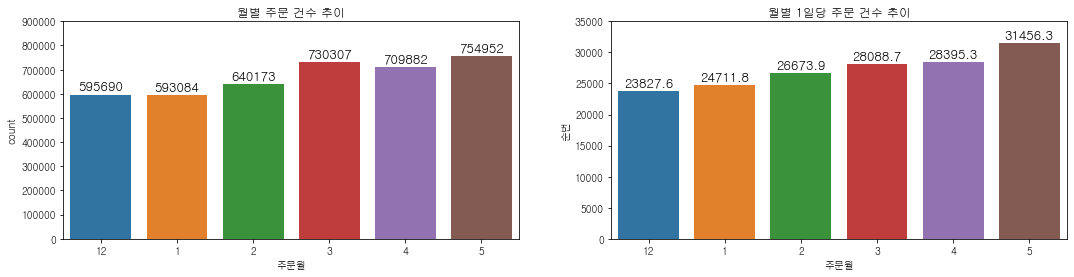

In [122]:
fig = plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plots = sns.countplot(data=dlvr_uncanceled, x='주문월', order=[12, 1, 2, 3, 4, 5])

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.ylim(top=900000)
plt.title('월별 주문 건수 추이')

# 빨간날(기념일, 일요일 등)을 제외한 날을 영업일수로 산출
# 20년1월부터 20년5월, 19년12월 순. 24, 24, 26, 25, 24, 25
plt.subplot(1, 2, 2)
plots= sns.barplot(data=(dlvr_uncanceled.groupby(['주문월'])['순번'].count() / [24, 24, 26, 25, 24, 25]).reset_index(),
            x='주문월', y='순번', order=[12, 1, 2, 3, 4, 5])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(top=35000)
plt.title('월별 1일당 주문 건수 추이')

plt.show()

**좌측 그래프**<br>
- 4월을 제외하고서는 꾸준히 증가세를 보였습니다.
- 보통 영업일수가 적은 2월이 다른 월보다 주문건수가 적어야 맞지만, 2020년 2월은 윤달이었기 때문에 영업일수가 29일이었으며, 2020년은 1월에 설날이 있었기 때문에 영업일수가 2월보다 적었습니다.
- 또한 4월은 영업일수가 30일이고(주말포함), 공휴일은 총선과 석가탄신일이 있었습니다. 그렇기에 영업일수가 많이 부족했습니다.
- 영업일수에 대한 영향력을 적용해 살펴본다면 꾸준히 양적성장을 이루고 있다는 것을 알 수 있습니다.
<br>
**우측 그래프**<br>
- 1일당 주문건수로 보면 좌측 그래프에서 언급한 것과 같이 12월부터 5월까지 꾸준히 성장한 것을 확인할 수 있습니다.

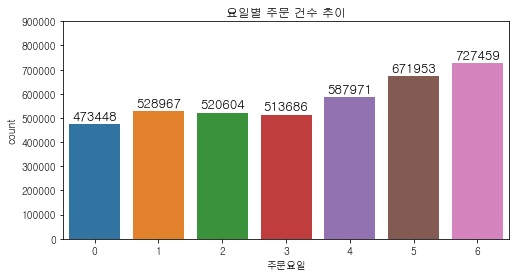

In [123]:
plt.figure(figsize=(8, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='주문요일')

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=900000)
plt.title('요일별 주문 건수 추이')
plt.show()

- 요일별로는 주말로 향할수록 배달건수가 급격히 증가합니다.
- 배달건수가 적은 요일은 월, 목요일입니다.

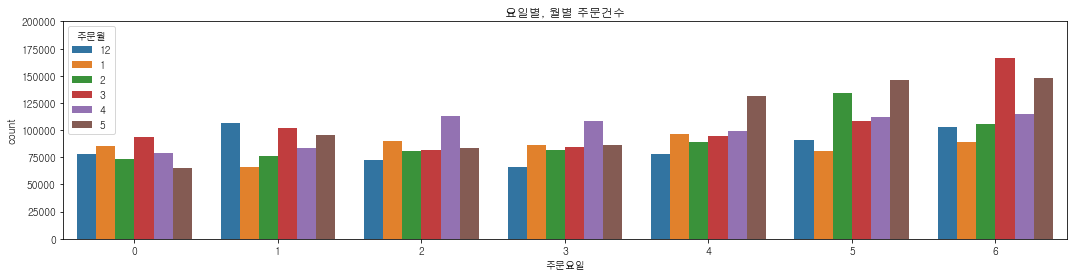

In [124]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='주문요일', hue='주문월', hue_order=[12, 1, 2, 3, 4, 5])
plt.title('요일별, 월별 주문건수')
plt.ylim(top=200000)
plt.show()

- 요일별 주문건수를 월별로 나눠서 살펴보면,
- 대체적으로 우상향을 보이지만, 월요일과 금토요일에서 특이한 패턴이 보입니다.
- 감소 혹은 유지세를 보이는 월화수목, 횡보하면서도 꾸준히 증가하는 금토일로 나눌 수 있습니다.

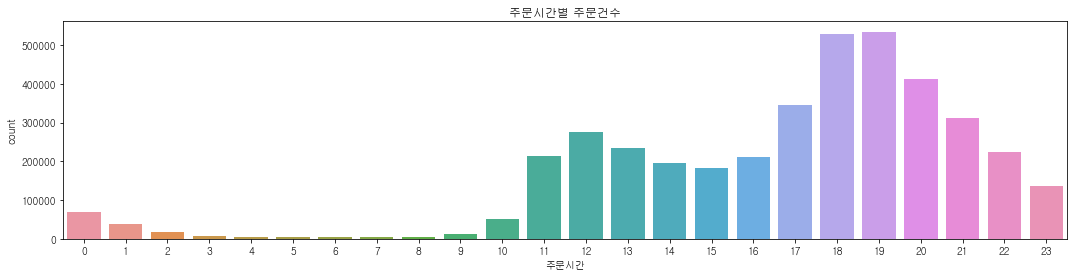

In [125]:
plt.figure(figsize=(18, 4))
sns.countplot(data=dlvr_uncanceled, x='주문시간')
plt.title('주문시간별 주문건수')
plt.show()

- 주문시간대별로 주문건수를 살펴보면,
- 역시나 식사시간에 많은 주문건수를 볼 수 있으며, 저녁시간에 몰려 있습니다.

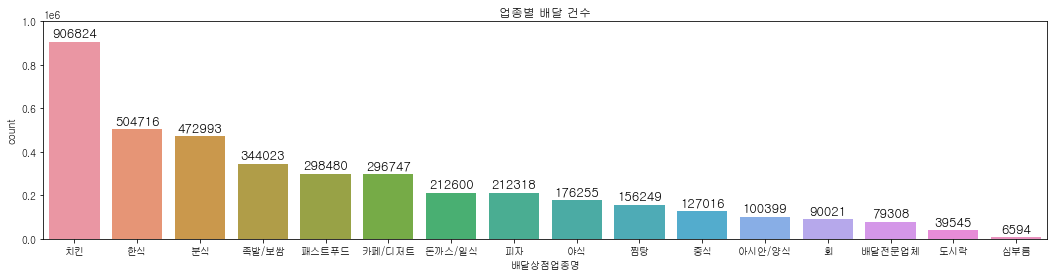

In [126]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='배달상점업종명',
                      order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별 배달 건수')
plt.ylim(top=1000000)
plt.show()

- 역시 치킨은 배달 음식의 최강자입니다.
- 한식, 분식, 족발/보쌈, 패스트푸드가 뒤를 잇습니다.

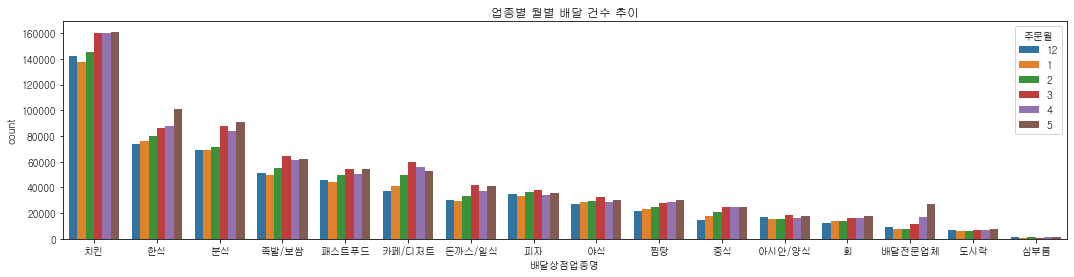

In [127]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_uncanceled, x='배달상점업종명', hue='주문월', hue_order=[12, 1, 2, 3, 4, 5],
                    order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

plt.title('업종별 월별 배달 건수 추이')
plt.show()

- 치킨은 3, 4, 5월의 주문량이 크게 변하지 않았습니다.
- **주문량이 많이 증가한 업종은 한식입니다. 한식은 매달 꾸준히 증가했으며 5월에 특히 많이 증가했습니다.**
- 마찬가지로 꾸준히 증가한 업종은 찜탕입니다.
- 이는 장기화되는 코로나로 인해 치킨이나 패스트푸드, 피자, 돈까스/일식 등 보다는 **주식으로 먹는 한식, 찜탕의 수요가 증가한 것으로 추정할 수 있습니다.**

### 주문 취소에 대한 분석

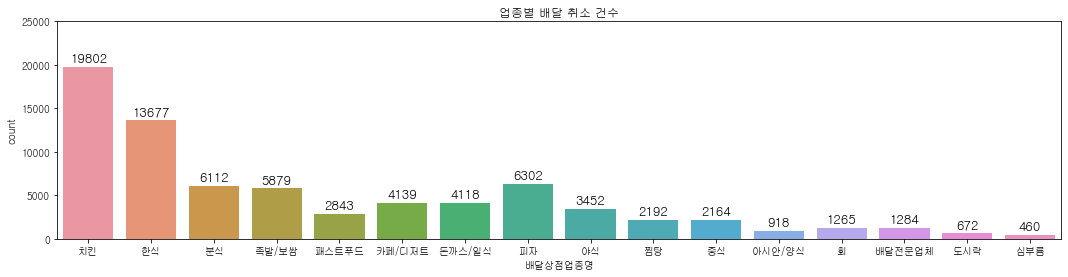

In [128]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_canceled, x='배달상점업종명',
                      order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별 배달 취소 건수')
plt.ylim(top=25000)
plt.show()

- 취소 건수를 살펴보겠습니다.
- 총 주문 건수 대비 한식, 족발/보쌈, 피자 등의 업종에서 취소가 다소 많습니다.
- 패스트푸드는 취소 건수가 적은 편에 속하는 것을 알 수 있습니다.

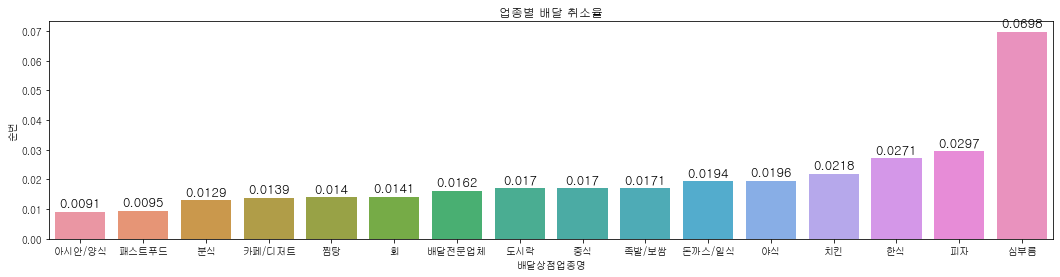

In [129]:
# 취소율을 살펴보겠습니다.
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=(dlvr_canceled.groupby(['배달상점업종명'])['순번'].count() /
                  dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count()).round(4).reset_index().sort_values('순번'),
            x='배달상점업종명', y='순번')

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.title('업종별 배달 취소율')
plt.show()

- 취소율로 따져보면 배달건수가 많은 치킨이나 한식에서 취소율이 높습니다. 피자가 가장 높습니다.
- 패스트푸드는 취소 건수도 적으면서 취소율도 낮습니다.

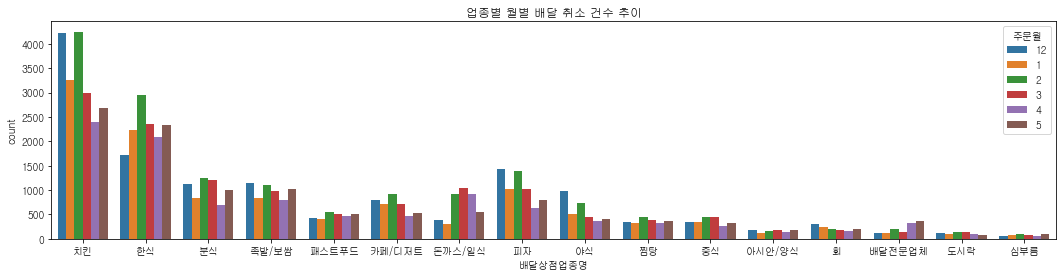

In [130]:
plt.figure(figsize=(18, 4))
plots = sns.countplot(data=dlvr_canceled, x='배달상점업종명', hue='주문월', hue_order=[12, 1, 2, 3, 4, 5],
                      order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

plt.title('업종별 월별 배달 취소 건수 추이')
plt.show()

- 전체적으로 12 ~ 2월보다 3 ~ 5월의 취소 건수가 적습니다.
- 다만 대다수의 업종에서 4월보다 5월의 취소건수가 증가하고 있음을 알 수 있습니다.

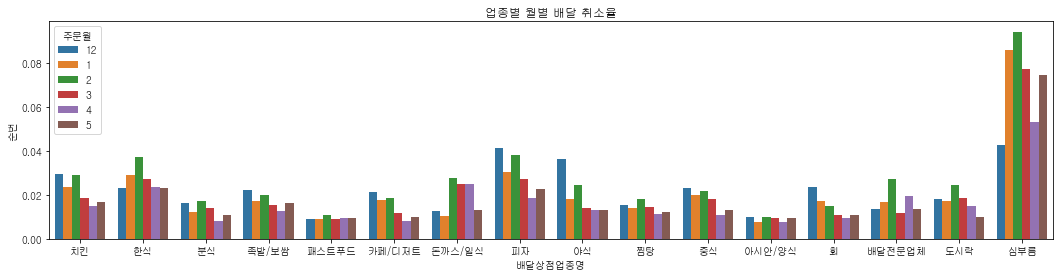

In [131]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=(dlvr_canceled.groupby(['배달상점업종명', '주문월'])['순번'].count() /
                          dlvr_uncanceled.groupby(['배달상점업종명', '주문월'])['순번'].count()).reset_index().round(4),
                    x='배달상점업종명', y='순번', hue='주문월', hue_order=[12, 1, 2, 3, 4, 5],
                      order=dlvr_uncanceled.groupby(['배달상점업종명'])['순번'].count().sort_values(ascending=False).index)

plt.title('업종별 월별 배달 취소율')
plt.show()

- 취소율 관점에서 전체적으로 취소율은 감소중에 있습니다.
- 2월을 기점으로 꾸준히 감소중이며, 5월 들어서 증가한 업종이 존재합니다.

### 주문 시간에 대한 분석

**HOUR**

In [132]:
shop_sample = ['치킨', '한식', '도시락', '카페/디저트']

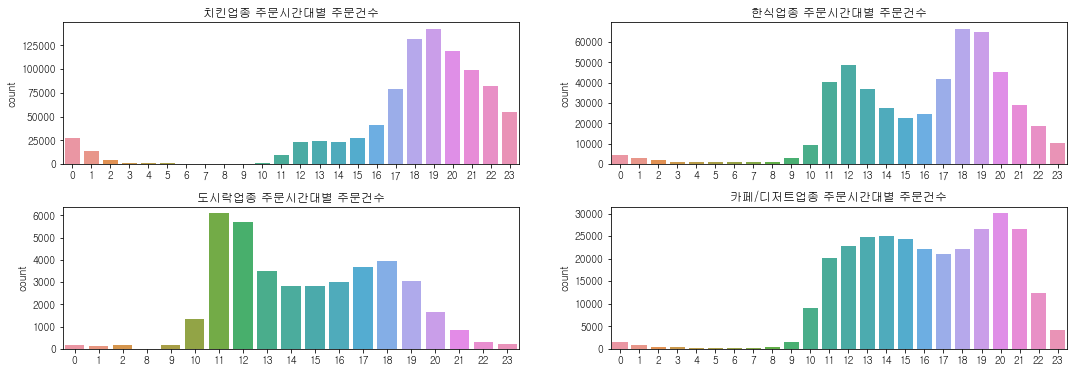

In [133]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_sample):
    plt.subplot(12, 2, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문시간')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.title('{}업종 주문시간대별 주문건수'.format(n))

- 4가지 패턴의 대표적인 업종을 플롯팅 했습니다.
- 치킨은 족발/보쌈과 함께 저녁시간에 주문이 몰리는 업종입니다.
- 한식은 분식과 함께 점심과 저녁시간에 주문이 몰리는 쌍봉형태입니다.
- 도시락업종은 점심에 유독 주문량이 몰리는 업종입니다. 회사 등에서 점심 용도로 많이 주문하는 것으로 파악됩니다.
- 카페/디저트 업종은 오전부터 밤가지 꾸준히 주문량이 많습니다.

**WEEKDAY** 

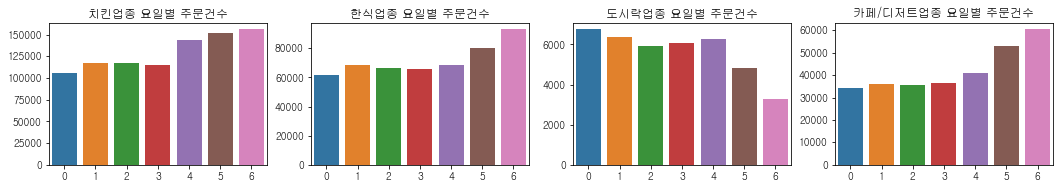

In [134]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(shop_sample):
    plt.subplot(12, 4, i+1)
    sns.countplot(data=dlvr_uncanceled.loc[dlvr_uncanceled.배달상점업종명 == n], x='주문요일')
    plt.subplots_adjust(hspace=0.3)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('{}업종 요일별 주문건수'.format(n))

- 치킨업종은 월화수목, 금토일로 패턴이 나뉘는 것을 보여줍니다.
- 도시락은 주말보다는 평일에 주문이 두드러집니다.

## 배달소요시간 분석

**배달 시간**<br>
: 배달시간은 이용자들의 마음을 움직일 수 있는 가장 강력한 무기입니다.

: 2020년, 배달의민족과 요기요가 배달앱에서 많은 비중을 차지했던 것에 비해 2021년에는 쿠팡이츠가 급부상하고 있음을 알 수 있습니다. <그림1, 표1, 2>

In [135]:
cl_url = 'images/그림2.png'
Image(url=cl_url, width=800)

In [136]:
cl_url = 'images/표1.png'
Image(url=cl_url, width=800)

In [137]:
cl_url = 'images/표2.png'
Image(url=cl_url, width=800)

쿠팡이츠가 점유율을 뺏어올 수 있었던 이유 중 하나는 ‘배달 속도’때문입니다. 쿠팡이츠의 전략은 쿠팡과 기본적으로 동일해 보입니다. ‘치타배달’이라는 개념을 도입해서 주문 후 빠르면 20분 이내에 배달해주는 배달 속도 차별화 전략을 펼치고 있기 때문입니다. 그리고 이 전략은 성공적인 것으로 보입니다. 최근 3개월간 배달 앱 이용 경험자를 대상으로 각 배달 앱에 대해 연상되는 이미지를 주관식으로 물었는데요. 배달의민족과 요기요는 서비스를 요약할만한 키워드가 별로 나타나지 않은 반면, 쿠팡이츠에는 ‘빠른 배달’이라는 키워드가 보입니다. <그림3> 쿠팡의 차별점이 소비자들에게 통했다고 볼 수 있습니다. 이에 질세라 배달의민족도 ‘번쩍배달’, ‘배달원(1)’ 처럼 빠른 배달을 위한 시스템을 만들어 가고 있습니다.

In [138]:
cl_url = 'images/그림3.png'
Image(url=cl_url, width=800)

**배차 시간**<br>
: 배달 시간을 줄이기 위해서는 배차 시간을 단축시키는 것이 중요합니다.

: 배달 업계에 따르면 배달앱에 입점한 자영업자들에게 배달 지연은 가장 큰 문제로 꼽힙니다. 한 번에 한 집만 배달하는 단건배달은 30분 이내 배달이 기본입니다. 소비자도, 배달앱 입점 업체도 선호하는 방식이지만, 배달 수요가 몰리는 저녁 시간이나 주말 점심에는 단건배달이 1시간을 넘기기 일쑤입니다. 주문을 감당할 만큼 라이더가 충분하지 않다 보니 벌어지는 현상으로 볼 수 있습니다.<br>
*[출처] 국민일보, 배달앱 ‘단건경쟁’에 라이더 기근… 저녁장사 접는 식당들* 

In [139]:
# 서울시 데이터만 추출해줍니다.
dlvr_seoul = dlvr.loc[dlvr.배달상점광역시도명 == '서울특별시']

In [140]:
dlvr_seoul['count'] = 1 # 계산을 위해 컬럼을 하나 잡아줍니다.

In [141]:
# 배달목적지에 인천, 전북, 대전은 지워주겠습니다.
dlvr_seoul = dlvr_seoul.loc[dlvr_seoul.배달목적지광역시도명.isin(['서울특별시', '경기도'])]

In [142]:
# - 상점 수가 너무 적은 강동구, 서대문구, 강서구, 송파구는 삭제하겠습니다.
# - 절대수가 차이가 크니, 무조건 비율로 분석합니다.
dlvr_seoul = dlvr_seoul.loc[~dlvr_seoul.배달상점시군구명.isin(['강동구', '서대문구', '강서구', '송파구'])]

### 주문시간별 배달소요시간

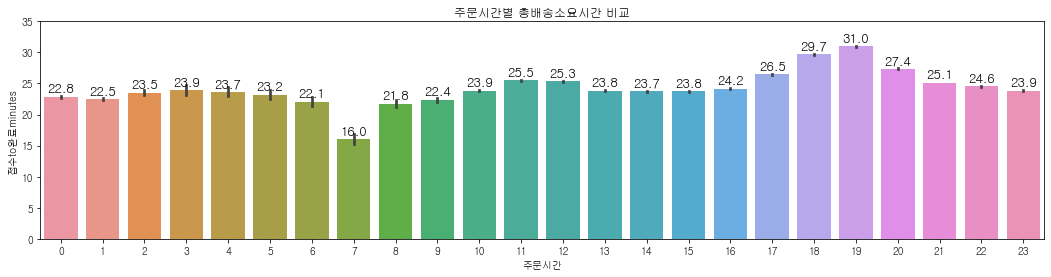

In [143]:
# 시간단위 총배송시간 비교

plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='주문시간', y='접수to완료minutes')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.ylim(top=35)
plt.title('주문시간별 총배송소요시간 비교')
plt.show()

- 상식적으로 교통량이 많을 것이며, 배달건수가 많아지는 시간대에 배송시간이 오래 걸리는 것을 알 수 있습니다.

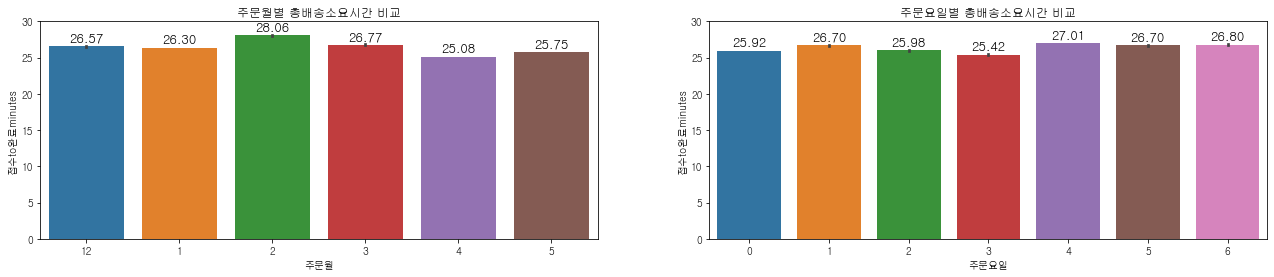

In [144]:
fig = plt.figure(figsize=(22, 4))

plt.subplot(1, 2, 1)
plots = sns.barplot(data=dlvr_seoul, x='주문월', y='접수to완료minutes',
           order=[12, 1, 2, 3, 4, 5])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')
plt.ylim(top=30)
plt.title('주문월별 총배송소요시간 비교')

plt.subplot(1, 2, 2)
plots = sns.barplot(data=dlvr_seoul, x='주문요일', y='접수to완료minutes')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',size=13, xytext=(0, 8), textcoords='offset points')
plt.ylim(top=30)
plt.title('주문요일별 총배송소요시간 비교')

plt.show()

- 12월부터 2월까지는 총배달소요시간이 약 26 ~ 28분 정도 걸렸지만, 3 ~ 5월에서는 25 ~ 27분으로 감소하였습니다.
- 이는 업주나 라이더의 숙련도 증가, 라이더 수의 증가 등의 영향이 있을 수 있습니다.
- 주문 요일에 따른 총배달소요시간은 배달수요가 몰리고 주문수요도 몰리는 금요일이 가장 오래 걸리며, 다른 요일은 큰 편차가 존재하지 않습니다..

### 배달목적지비율

In [145]:
# 배달목적지시군구명에서 통계적으로 유의하지 않은 과천시, 중랑구, 남양주시, 덕양구, 서대문구는 제외하겠습니다.
dlvr_seoul = dlvr_seoul.loc[~dlvr_seoul.배달목적지시군구명.isin(['과천시', '중랑구', '남양주시',
                                                        '고양시 덕양구', '종로구', '서대문구'])]

In [146]:
temp = pd.pivot_table(data=dlvr_seoul, index='배달상점시군구명', columns='배달목적지시군구명', values='count', aggfunc='sum').fillna(0)

In [147]:
temp['총배달건수'] = temp.sum(axis=1)

In [148]:
for col in list(temp.columns):
    temp['{}_비중'.format(col)] = temp[col] / temp.총배달건수

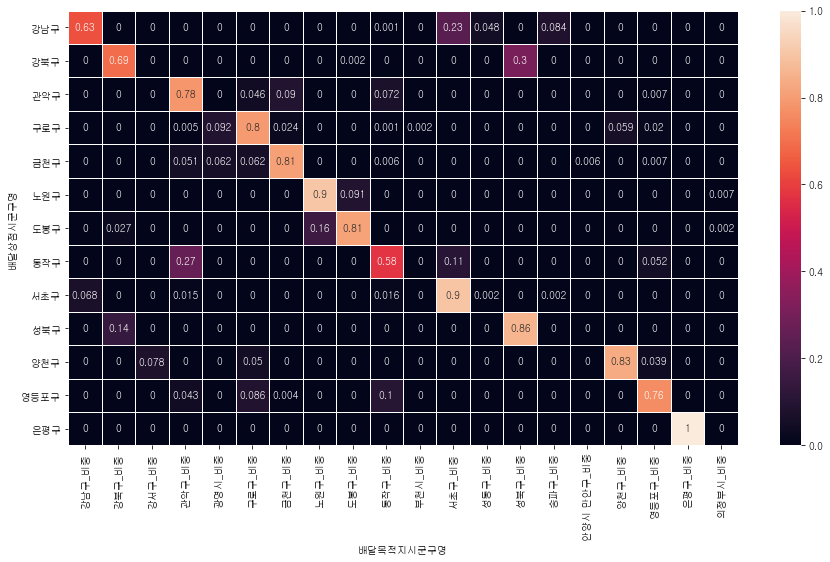

In [149]:
plt.figure(figsize=(15, 8))
sns.heatmap(temp.iloc[:, 21:-1].round(3),
           annot=True, linewidths=.5, vmin=0)
plt.show()

- 배달상점이 소재한 지역구 외에 타 지역구로 배달을 많이 가는 **강남구, 강북구, 동작구, 영등포구** 등이 있습니다.
- 배달상점이 소재한 지역구 내에 배달을 많이 가는 **은평구, 서초구, 노원구, 성북구** 등이 있습니다.

### 지역구별 총소요시간

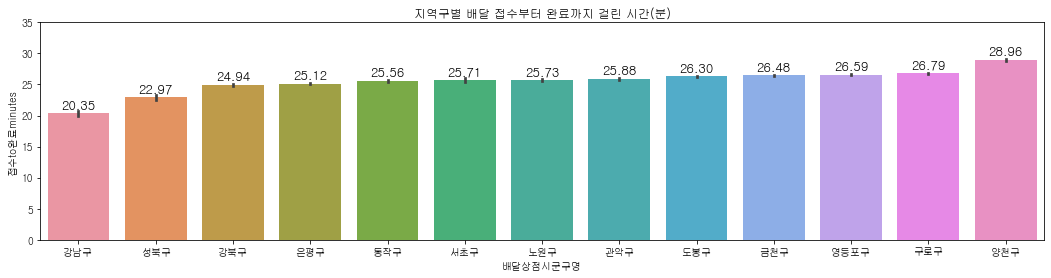

In [150]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점시군구명', y='접수to완료minutes',
                    order=dlvr_seoul.groupby(['배달상점시군구명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('지역구별 배달 접수부터 완료까지 걸린 시간(분)')
plt.ylim(top=35)
plt.show()

- 배송이 가장 빠른 지역은 강남구이며, 가장 오래 걸리는 지역은 양천구입니다.

### 지역구별 배달소요시간

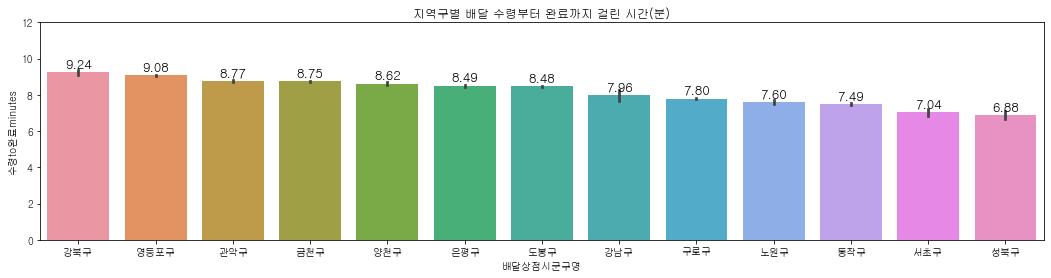

In [151]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점시군구명', y='수령to완료minutes',
                   order=dlvr_seoul.groupby(['배달상점시군구명'])['수령to완료minutes'].mean().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('지역구별 배달 수령부터 완료까지 걸린 시간(분)')    
plt.ylim(top=12)
plt.show()

- 타 지역구 배달 비율이 비교적 높은 강북구, 영등포구는 배달 시간이 오래 걸립니다.
- 그러나 강남구와 동작구는 타 지역구 배달 비율이 높음에도 배달 시간이 매우 짧습니다.


- 타 지역구 배달 비율이 비교적 낮은 은평구, 노원구, 서초구, 성북구는 배달시간이 매우 적게 걸립니다.
- 그나마 은평구가 8.5분이지만, 노원 7.6, 서초 7.0, 성북 6.9 입니다.

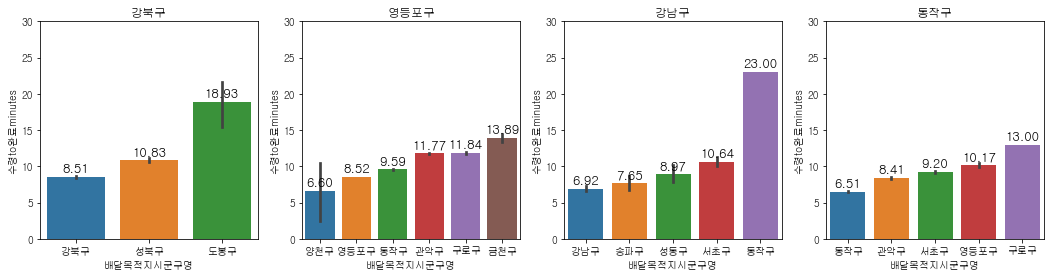

In [152]:
# 타지역 배달 비율이 비교적 높은 지역구
# 강북구, 영등포구, 강남구, 동작구
abroad_goo = ['강북구', '영등포구', '강남구', '동작구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='수령to완료minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['수령to완료minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 30)
    plt.title('{}'.format(n))

- 네 지역 모두 관외 배달 지역 비율이 높지만, 배달시간의 차이가 나는 이유는 기본적인 관내 배달 시간의 차이입니다.
- 강북구와 영등포구는 8.5분, 강남구와 동작구는 각각 6.9, 6.5 분이 걸립니다.


- 관외 지역 배달 시간도 당연히 차이가 큽니다.
- 강북구-> 성북구는 10.8분, 영등포구->동작구는 9.6분, 영등포구->관악구는 11.7분이 걸립니다.
- 반면에 강남구->송파구는 7.7분, 동작구->관악구는 8.4분이 걸립니다.

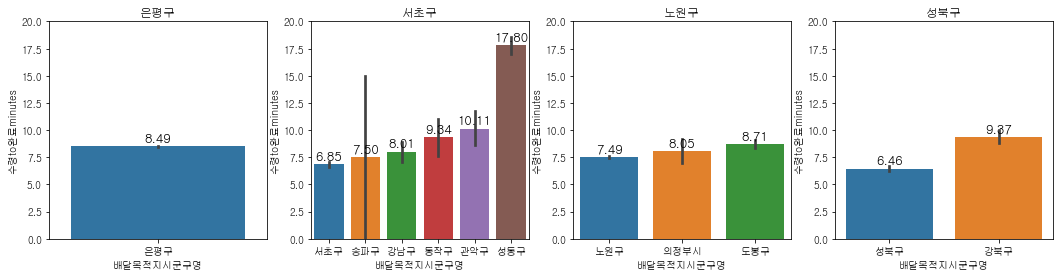

In [153]:
# 타지역 배달 비율이 비교적 낮은 지역구
# 은평구, 서초구, 노원구, 성북구
abroad_goo = ['은평구', '서초구', '노원구', '성북구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='수령to완료minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['수령to완료minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 20)
    plt.title('{}'.format(n))

- 관내 배달 비중이 높은 지역구는 배달 시간도 매우 적게 걸리는 것으로 파악되었습니다.
- 서초구와 성북구는 관내 배달 시간이 채 7분이 되지 않으며, 노원구는 7.5분 가량이 걸리지만 관외 배달시간도 큰 차이가 없습니다.

### 지역구별 배차소요시간

- 배차소요시간은 라이더가 얼마나 빨리 잡히느냐입니다.
- 배차소요시간을 통해 해당 업종이나 지역이 라이더들에게 인기가 있는지 없는지를 1차적으로 살펴볼 수 있으며,
- 2차적으로는 해당 지역에 라이더의 수가 많느냐 적느냐까지 살펴볼 수 있습니다.
- 배차시간이 적게 걸리는 지역과 업종은 라이더가 많으며 라이더가 선호하는 지역과 업종이라는 것입니다.
- 즉, 업주 입장에서 배차는 빨리 잡히면 잡힐수록 유리합니다.

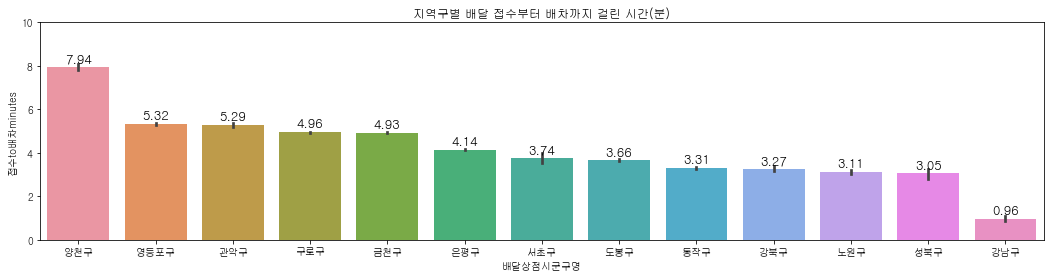

In [154]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점시군구명', y='접수to배차minutes',
                   order=dlvr_seoul.groupby(['배달상점시군구명'])['접수to배차minutes'].mean().sort_values(ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.title('지역구별 배달 접수부터 배차까지 걸린 시간(분)')
plt.ylim(top=10)
plt.show()

- 4분을 기점으로 4분보다 적게 걸리면 배차가 빨리 잡히는 편이고, 4분이 넘으면 오래 걸리는 편입니다.
- 강남구와 양천구는 대척점에 있습니다. 1분도 안 걸리는 강남구, 8분이나 걸리는 양천구입니다.


- 타지역 배달 비율이 높은 지역구 중 영등포구를 제외하고, 강북, 강남, 동작구는 전부 4분이 걸리지 않습니다.
- 타지역 배달 비율이 낮은 은평, 서초, 노원, 성북구도 배차 시간은 4분이 걸리지 않습니다.

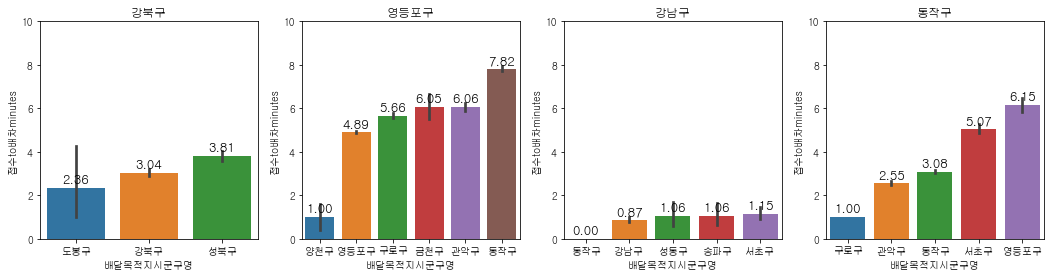

In [155]:
# 타지역 배달 비율이 비교적 높은 지역구
# 강북구, 영등포구, 강남구, 동작구
abroad_goo = ['강북구', '영등포구', '강남구', '동작구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='접수to배차minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['접수to배차minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 10)
    plt.title('{}'.format(n))

- 영등포구, 동작구는 타 지역구 배달 건수에 대해서는 배차 시간이 조금 걸리는 편입니다.
- 강남구는 타 지역구 배달 건수도 1분 밖에 걸리지 않습니다.

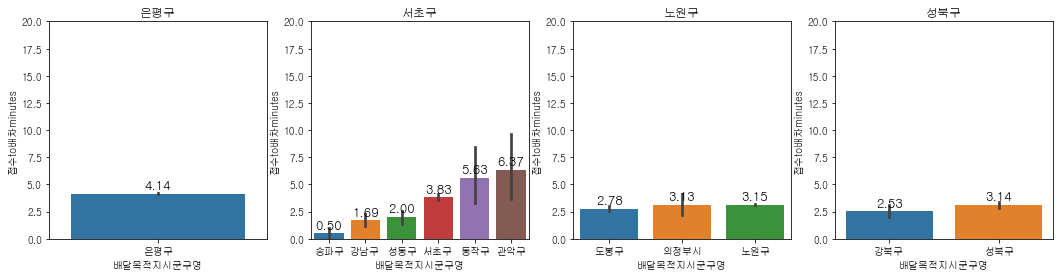

In [156]:
# 타지역 배달 비율이 비교적 낮은 지역구
# 은평구, 서초구, 노원구, 성북구
abroad_goo = ['은평구', '서초구', '노원구', '성북구']
fig = plt.figure(figsize=(18, 4))
for i, n in enumerate(abroad_goo):
    plt.subplot(1, 4, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달목적지시군구명', y='접수to배차minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달목적지시군구명'])['접수to배차minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 20)
    plt.title('{}'.format(n))

### 업종별 총소요시간

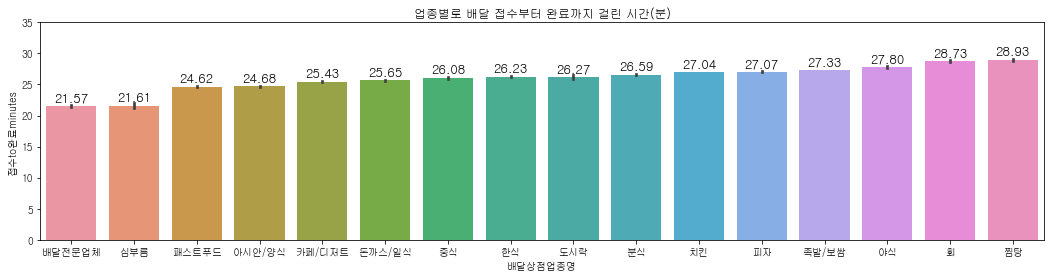

In [157]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점업종명', y='접수to완료minutes',
                    order=dlvr_seoul.groupby(['배달상점업종명'])['접수to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별로 배달 접수부터 완료까지 걸린 시간(분)')
plt.ylim(top=35)
plt.show()

- 접수부터 완료까지 가장 짧은 시간에 배송된 업종은 패스트푸드, 아시안/양식 등입니다.
- 야식, 회, 찜탕 등은 접수부터 완료까지 가장 오랜 시간이 걸린 업종입니다.

### 업종별 배차소요시간

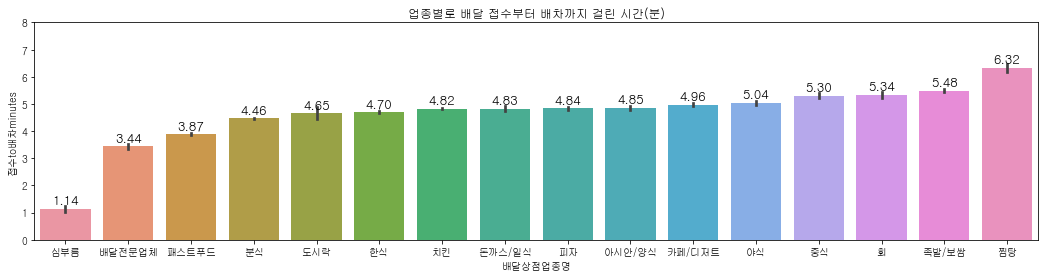

In [158]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점업종명', y='접수to배차minutes',
                    order=dlvr_seoul.groupby(['배달상점업종명'])['접수to배차minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')


plt.title('업종별로 배달 접수부터 배차까지 걸린 시간(분)')
plt.ylim(top=8)
plt.show()

- 배차소요시간은 여전히 패스트푸드가 높습니다. 분식과 도시락, 한식도 상위권에 위치합니다.
- 중식, 회, 족발/보쌈, 찜탕 같은 경우는 배차소요시간이 꽤나 걸립니다.
- 라이더들이 꺼리는 업종이라고 생각할 수 있습니다.

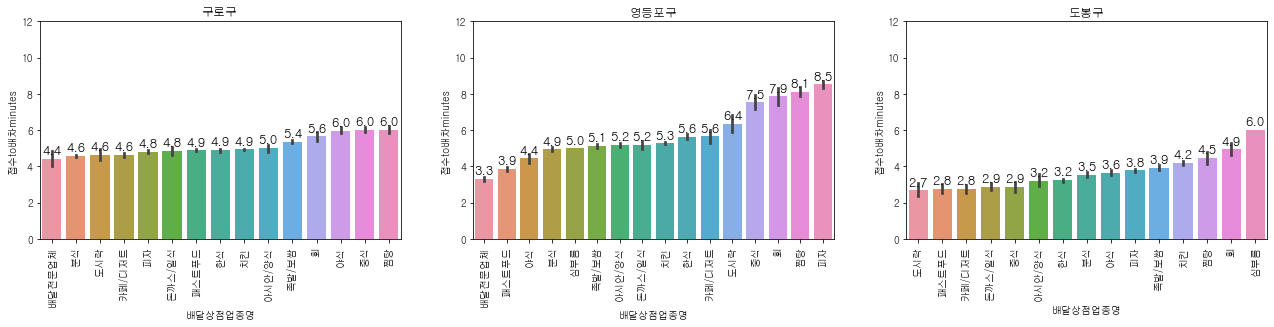

In [159]:
# dlvr_call 데이터가 많은 지역구 중에서 구로구, 영등포, 도봉구를 살펴보겠습니다.
many_goo = ['구로구', '영등포구', '도봉구']
fig = plt.figure(figsize=(22, 4))
for i, n in enumerate(many_goo):
    plt.subplot(1, 3, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달상점업종명', y='접수to배차minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달상점업종명'])['접수to배차minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.1f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 12)
    plt.xticks(rotation=90)
    plt.title('{}'.format(n))

- 구로구와 도봉구는 업종별로 편차가 크지는 않습니다. 영등포구는 패스트푸드와 피자가 4분이 넘게 차이가 납니다.
- 찜탕, 회 등은 3개의 구에서 동일하게 배차가 오래 걸립니다.
- 패스트푸드는 3개의 구에서 동일하게 배차가 빨리 잡힙니다.
- 도시락은 구로와 도봉에서는 배차가 빨리 잡히지만, 영등포에서는 매우 늦게 잡힙니다.
- 중식은 도봉에서는 배차가 빨리 잡히지만 구로와 영등포에서는 매우 늦게 잡힙니다.

### 업종별 배송소요시간

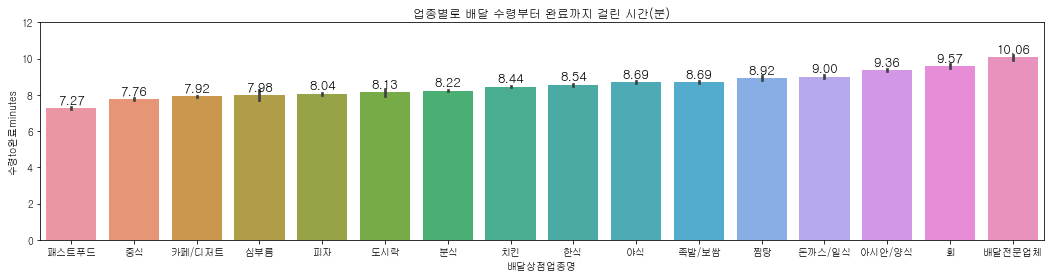

In [160]:
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul, x='배달상점업종명', y='수령to완료minutes',
                   order=dlvr_seoul.groupby(['배달상점업종명'])['수령to완료minutes'].mean().sort_values().index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.title('업종별로 배달 수령부터 완료까지 걸린 시간(분)')
plt.ylim(top=12)

plt.show()

- 실질적인 배달기사의 배송 소요 시간입니다.
- 패스트푸드는 여전히 가장 짧은 시간을 기록하고 있습니다.
- 의외의 포인트는 중식입니다. 배차는 느리지만 배송은 빠릅니다.
- 아시안/양식 같은 경우도 총소요시간은 상위권이지만 배송 소요시간은 하위권입니다.

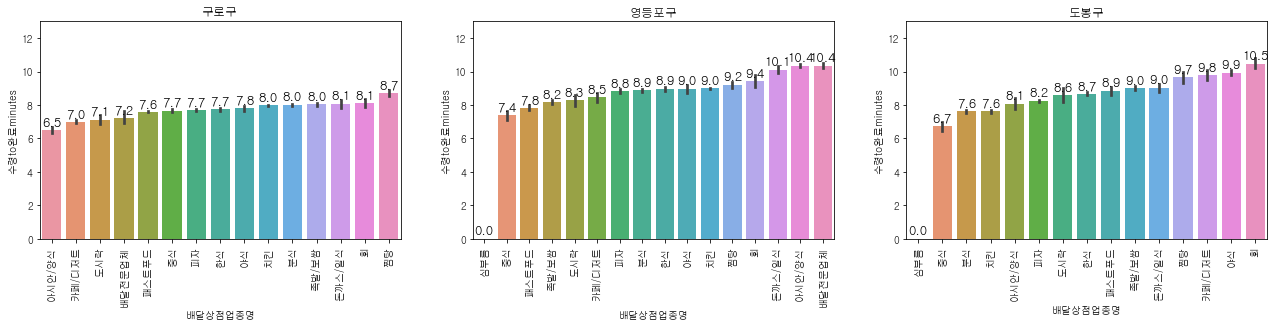

In [161]:
# dlvr_call 데이터가 많은 지역구 중에서 구로구, 영등포, 도봉구를 살펴보겠습니다.
many_goo = ['구로구', '영등포구', '도봉구']
fig = plt.figure(figsize=(22, 4))
for i, n in enumerate(many_goo):
    plt.subplot(1, 3, i+1)
    plots = sns.barplot(data=dlvr_seoul.loc[dlvr_seoul.배달상점시군구명 == n], x='배달상점업종명', y='수령to완료minutes',
                       order=(dlvr_seoul
                              .loc[dlvr_seoul.배달상점시군구명 == n]
                              .groupby(['배달상점업종명'])['수령to완료minutes']
                              .mean()
                              .sort_values()
                              .index))

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.1f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=13, xytext=(0, 8),
                       textcoords='offset points')
    plt.ylim(top = 13)
    plt.xticks(rotation=90)
    plt.title('{}'.format(n))

- 중식은 영등포에서 배차가 안잡히는 것과는 다르게 배송시간은 가장 빠릅니다.
- 찜탕은 배차를 꺼리는 것과 마찬가지로 배송시간도 매우 느립니다. 이러한 패턴은 회도 마찬가지입니다.
- 패스트푸드는 도봉구에서 배송시간이 꽤 걸리는 편입니다. 분식과 치킨은 매우 빠른 것과 대조됩니다. 배차 시간과 반대의 패턴을 보입니다.

## 배달 성장 분석

**배달 주문 증가율**<br>
: 배달 주문이 증가하는 업종은 배달앱을 통한 온라인 시프팅과 배달 서비스에 적응하고 있다는 것을 시사합니다.

### 주차별 주문건수 추이

In [162]:
# 업종별 1개 상점당 주차별 평균 주문건수
temp = (
    dlvr_seoul
    .groupby(['배달상점업종명','배달상점ID', '주문주차'])['count'].sum()
    .unstack()
    .groupby(['배달상점업종명']).mean()
)

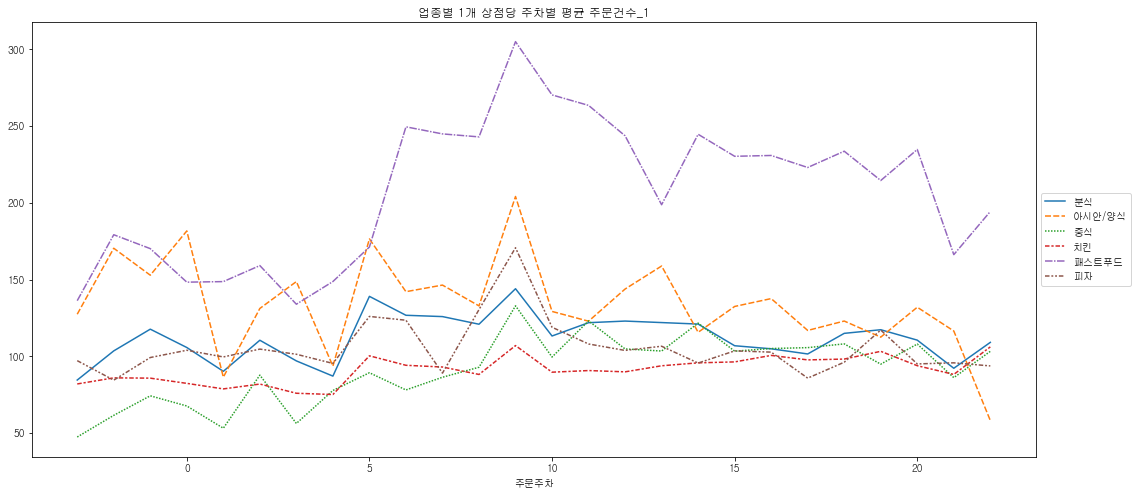

In [163]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['치킨', '피자', '중식', '분식', '아시안/양식', '패스트푸드'])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('업종별 1개 상점당 주차별 평균 주문건수_1')
plt.show()

- 대부분의 업종이 유지, 혹은 감소세에 있습니다.
- 치킨과 중식은 장기적으로 완만하게 상승하였습니다.
- 패스트푸드는 크게 배달이 증가했다가 다소 내려왔지만, 그럼에도 성장한 업종입니다. 

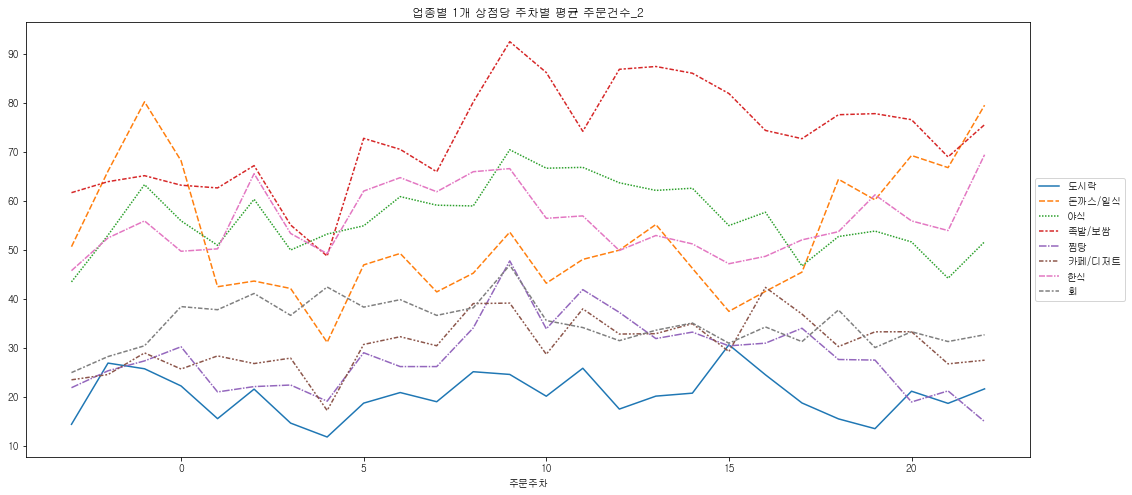

In [164]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=temp.T.loc[-3:, temp.T.columns.isin(['찜탕', '도시락', '회', '카페/디저트', '야식', '한식', '돈까스/일식', '족발/보쌈',])])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('업종별 1개 상점당 주차별 평균 주문건수_2')
plt.show()

- 족발/보쌈만이 완만한 상승세를 보이고 있습니다.
- 돈까스/일식은 크게 줄었다가 회복세를 보이고 있습니다.

### 업종별 객단가

In [165]:
# 극단값인 10만원 이상 주문건은 삭제해줍니다.
dlvr_seoul_10k = dlvr_seoul.loc[dlvr_seoul.상품금액 <= 100000]
print(dlvr_seoul.shape, dlvr_seoul_10k.shape)

(910470, 58) (909560, 58)


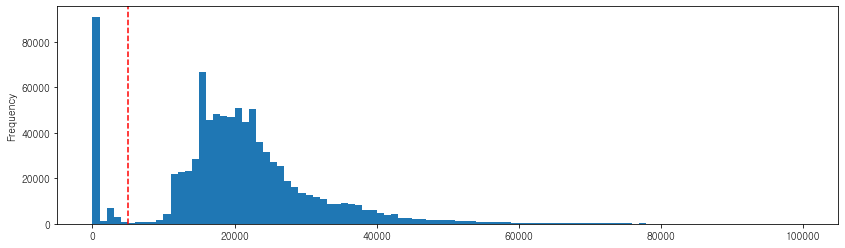

In [166]:
dlvr_seoul_10k.상품금액.plot(kind='hist', bins=100, figsize=(14, 4))
plt.axvline(x = 5000, color = 'r', linestyle = '--',)
plt.show()

In [167]:
# 상품금액 중에서 5000원 이하는 제외하겠습니다.
dlvr_seoul_10k = dlvr_seoul_10k.loc[dlvr_seoul_10k.상품금액 >= 5000]

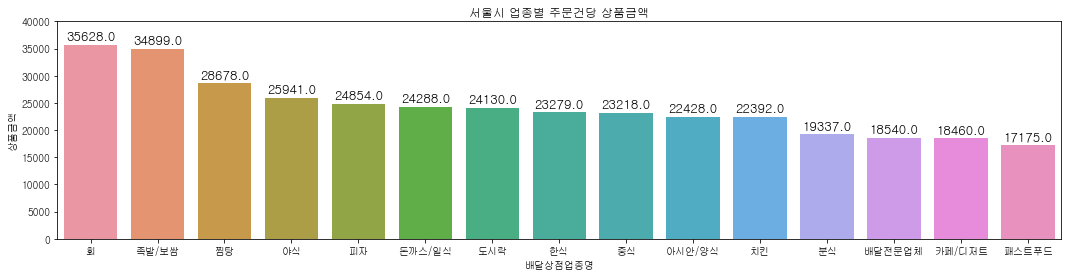

In [168]:
# 업종별 객단가 비교
plt.figure(figsize=(18, 4))
plots = sns.barplot(data=dlvr_seoul_10k.groupby(['배달상점업종명'])['상품금액'].mean().reset_index().sort_values(by='상품금액', ascending=False).round(),
                    x='배달상점업종명', y='상품금액')

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(top=40000)
plt.title('서울시 업종별 주문건당 상품금액')
plt.show()

- 회나 족발/보쌈, 찜탕 류는 일반적으로 매우 고가의 음식이고 다인분을 주문하기 때문에 객단가가 상대적으로 높습니다.
- 카페/디저트, 분식은 음식의 가격이 저렴한 편이고, 패스트푸드는 1인분 위주로 주문을 하기 때문에 객단가가 상대적으로 낮습니다.
- 피자부터 치킨까지는 보통 2만원 초반부터 2만원 중반의 객단가를 형성하고 있습니다.

### 주차별 객단가 추이

In [169]:
temp = dlvr_seoul_10k.groupby(['배달상점업종명', '주문주차'])['상품금액'].mean().reset_index()

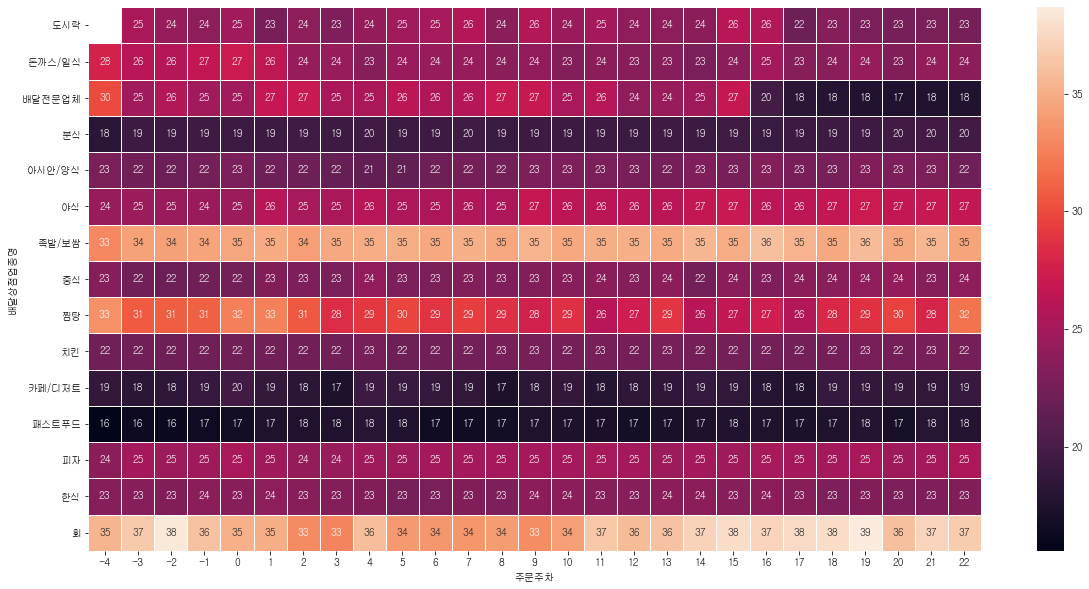

In [170]:
plt.figure(figsize=(20, 10))
sns.heatmap(pd.pivot(data=temp, index='배달상점업종명', columns='주문주차', values='상품금액')*0.001, annot=True, linewidths=.5)
plt.show()

- 도시락, 돈까스/일식, 찜탕 등의 업종은 주차별 객단가가 꾸준히 감소하였습니다.
- 반면에 분식, 야식, 패스트푸드 업종은 주차별 객단가가 꾸준히 상승하였습니다.

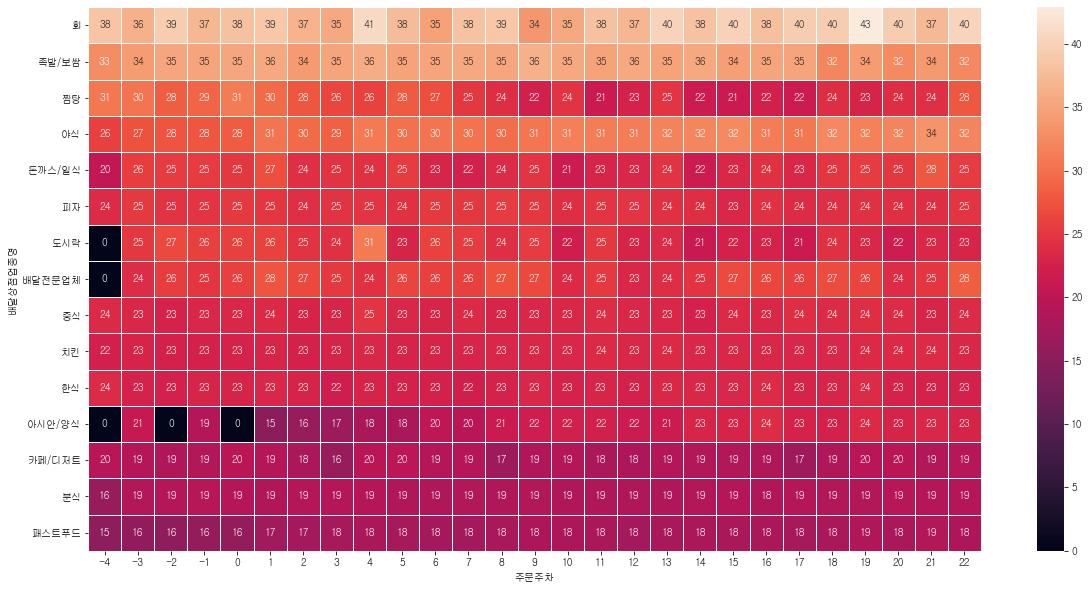

In [171]:
plt.figure(figsize=(20, 10))
sns.heatmap((dlvr_seoul_10k.loc[dlvr_seoul_10k.배달상점시군구명 == '구로구']
             .groupby(['배달상점업종명', '주문주차'])['상품금액'].mean()
             .unstack()
             .fillna(0)
             .sort_values(by=-3, ascending=False)*0.001),
           annot=True, linewidths=.5)
plt.show()

- 데이터가 가장 많은 구로구를 살펴보면,
- 마찬가지로 패스트푸드는 15 ~ 16천원에서 18 ~ 19천원으로 약 3천원 가량이나 상승하였습니다.
- 야식 또한 30천원 미만이었으나 30천원 이상으로 많이 상승하였습니다.

# ALL_SHOP 데이터 분석

## 폐업률 분석

**업종 폐업률**<br>
: 지역별 업종 폐업률은 창업 후 생존율을 미리 예측해볼 수 있습니다.

**인구 대비 점포 수**<br>
: 인구수 대비 점포 수는 해당 지역에 대한 해당 업종의 경쟁 상황을 유추해볼 수 있습니다.

: 음식점은 밀집함에 따라 경제적 이득을 얻는 업종으로 선행연구에서 분석되었습니다. 그러나 일정 수준을 넘어가면 폐업이 증가하는 것으로 나타났습니다. 따라서 음식점은 밀도의 적정규모 관리가 필요합니다.<br>
*[출처] 상업시설 업종별 밀도가 음식점 폐업에 미치는 영향 분석: 서울시 발달상권과 골목상권을 대상으로 : 이정민, 김동준, 이승일*

- 기본적으로 폐업률은 해당 기간 이전에 폐업한 업체는 제외하고 영업중이던 업체만 기준으로 진행합니다.
- 비교를 위해서 동기간의 테이블을 추가로 만들고 두 기간을 비교하겠습니다.
- 코로나 이후 시기의 데이터를 모두 활용하기 위해 2020-01-01 부터 ALL_SHOP 데이터의 수집 기준인 2021-07-31 까지(19개월)를 코로나 이후의 시기로 잡았습니다.
- 최대한 동일한 기준으로 비교를 하기 위해 코로나 이전 시기는 2018-01-01 ~ 2019-07-31(19개월), 2016-01-01 ~ 2017-07-31(19개월) 로 산정했습니다.

In [172]:
# 2019년 12월 31일 이전에 폐업을 한 점포를 제거합니다.
# 2020.01.01 ~ 2021.07.31 까지
all_shop_df_after = all_shop_df.loc[~(all_shop_df.폐업일자 <= '2019-12-31')]

In [173]:
all_shop_df_after.loc[all_shop_df_after.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_after.loc[all_shop_df_after.상세영업상태명 == '폐업', 'OC'] = 1

In [174]:
# 기본적으로 인허가일자가 2019년 7월 31일 이후의 점포를 제거합니다.
# 그리고 폐업일자가 2017년 12월 31일 이전의 점포를 제거합니다.

# 2018.01.01 ~ 2019.07.31 까지
all_shop_df_before = all_shop_df.loc[~(all_shop_df.폐업일자 <= '2017-12-31') & (all_shop_df.인허가일자 <= '2019-07-31')]

# 2019년 7월 31일 이후로 폐업한 가게는 영업중인 것으로 바꿔줍니다.
all_shop_df_before.loc[all_shop_df_before.폐업일자 > '2019-07-31', '상세영업상태명'] = '영업'

# 마찬가지로 폐업일자도 바꿔줍니다.
all_shop_df_before.loc[all_shop_df_before.폐업일자 > '2019-07-31', '폐업일자'] = np.nan

In [175]:
all_shop_df_before.loc[all_shop_df_before.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_before.loc[all_shop_df_before.상세영업상태명 == '폐업', 'OC'] = 1

In [176]:
# 비교용으로 하나를 더 만들겠습니다.
# 기본적으로 인허가일자가 2017년 7월 31일 이후의 점포를 제거합니다.
# 그리고 폐업일자가 2015년 12월 31일 이전의 점포를 제거합니다.

# 2018.01.01 ~ 2019.07.31 까지
all_shop_df_before2 = all_shop_df.loc[~(all_shop_df.폐업일자 <= '2015-12-31') & (all_shop_df.인허가일자 <= '2017-07-31')]

# 2019년 7월 31일 이후로 폐업한 가게는 영업중인 것으로 바꿔줍니다.
all_shop_df_before2.loc[all_shop_df_before2.폐업일자 > '2017-07-31', '상세영업상태명'] = '영업'

# 마찬가지로 폐업일자도 바꿔줍니다.
all_shop_df_before2.loc[all_shop_df_before2.폐업일자 > '2017-07-31', '폐업일자'] = np.nan

In [177]:
all_shop_df_before2.loc[all_shop_df_before2.상세영업상태명 == '영업', 'OC'] = 0
all_shop_df_before2.loc[all_shop_df_before2.상세영업상태명 == '폐업', 'OC'] = 1

### 광역시도별 폐업률

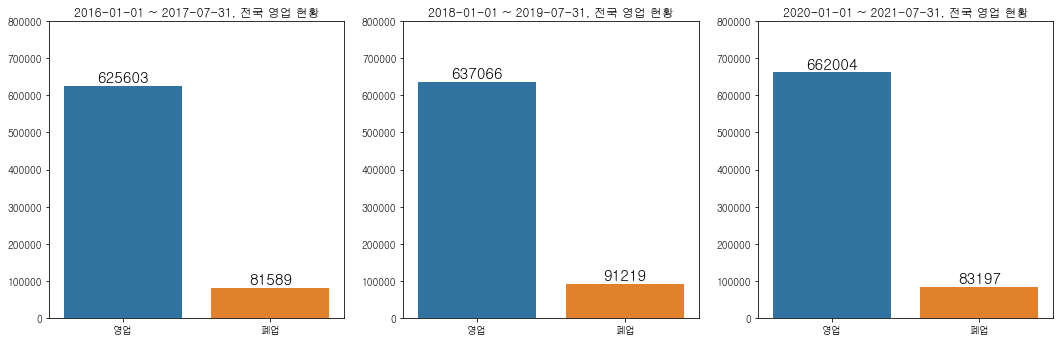

시기별 폐업률
코로나 오래전:  11.53703661806129
코로나 직전:  12.52517901645647
코로나 이후:  11.164370418182477


In [178]:
fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2, x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=800000)
plt.title('2016-01-01 ~ 2017-07-31, 전국 영업 현황')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before, x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=800000)
plt.title('2018-01-01 ~ 2019-07-31, 전국 영업 현황')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after, x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=800000)
plt.title('2020-01-01 ~ 2021-07-31, 전국 영업 현황')

plt.show()

print('시기별 폐업률')
print('코로나 오래전: ', (len(all_shop_df_before2.loc[all_shop_df_before2.상세영업상태명 == '폐업']) / len(all_shop_df_before2))*100)
print('코로나 직전: ', (len(all_shop_df_before.loc[all_shop_df_before.상세영업상태명 == '폐업']) / len(all_shop_df_before))*100)
print('코로나 이후: ', (len(all_shop_df_after.loc[all_shop_df_after.상세영업상태명 == '폐업']) / len(all_shop_df_after))*100)

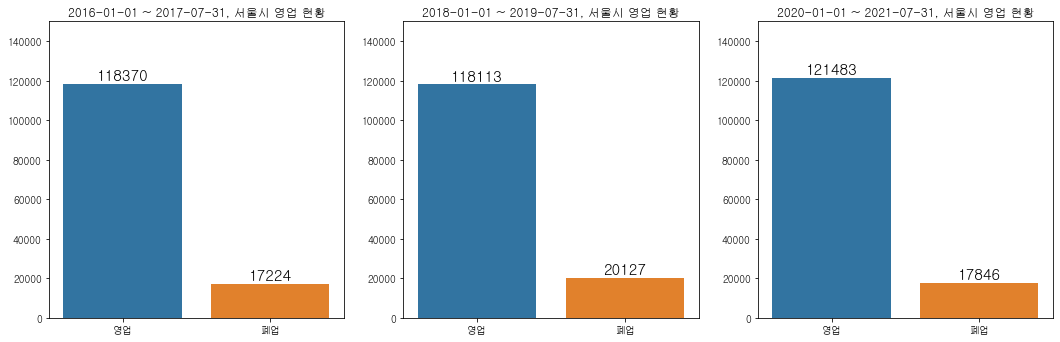

시기별 폐업률
코로나 오래전:  12.70262695989498
코로나 직전:  14.559461805555557
코로나 이후:  12.80853232277559


In [179]:
# 서울특별시

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '서울특별시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2016-01-01 ~ 2017-07-31, 서울시 영업 현황')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '서울특별시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2018-01-01 ~ 2019-07-31, 서울시 영업 현황')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '서울특별시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=150000)
plt.title('2020-01-01 ~ 2021-07-31, 서울시 영업 현황')

plt.show()

print('시기별 폐업률')
print('코로나 오래전: ', (len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') & (all_shop_df_before2.소재지주소광역시도 == '서울특별시')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '서울특별시']))*100)
print('코로나 직전: ', (len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') & (all_shop_df_before.소재지주소광역시도 == '서울특별시')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '서울특별시']))*100)
print('코로나 이후: ', (len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') & (all_shop_df_after.소재지주소광역시도 == '서울특별시')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '서울특별시']))*100)

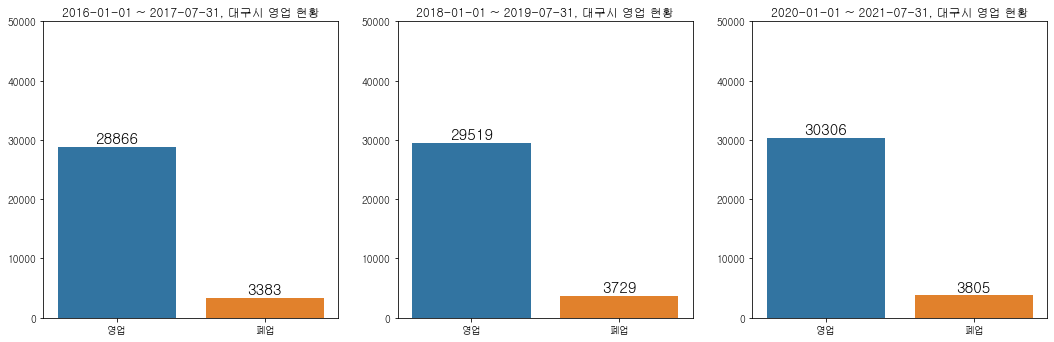

시기별 폐업률
코로나 오래전:  10.490247759620454
코로나 직전:  11.215712223291627
코로나 이후:  11.154759461757205


In [180]:
# 대구광역시

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '대구광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=50000)
plt.title('2016-01-01 ~ 2017-07-31, 대구시 영업 현황')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '대구광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=50000)
plt.title('2018-01-01 ~ 2019-07-31, 대구시 영업 현황')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '대구광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=50000)
plt.title('2020-01-01 ~ 2021-07-31, 대구시 영업 현황')

plt.show()

print('시기별 폐업률')
print('코로나 오래전: ', (len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') & (all_shop_df_before2.소재지주소광역시도 == '대구광역시')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '대구광역시']))*100)
print('코로나 직전: ', (len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') & (all_shop_df_before.소재지주소광역시도 == '대구광역시')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '대구광역시']))*100)
print('코로나 이후: ', (len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') & (all_shop_df_after.소재지주소광역시도 == '대구광역시')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '대구광역시']))*100)

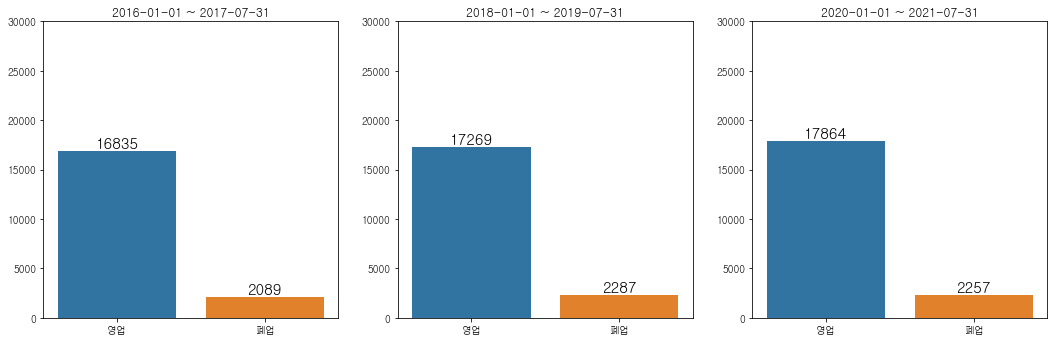

In [181]:
# 광주광역시

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '광주광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=30000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '광주광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=30000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '광주광역시'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=30000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [182]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '광주광역시')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '광주광역시']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '광주광역시')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '광주광역시']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '광주광역시')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '광주광역시']))*100)

11.038892411752272
11.694620576805073
11.217136325232344


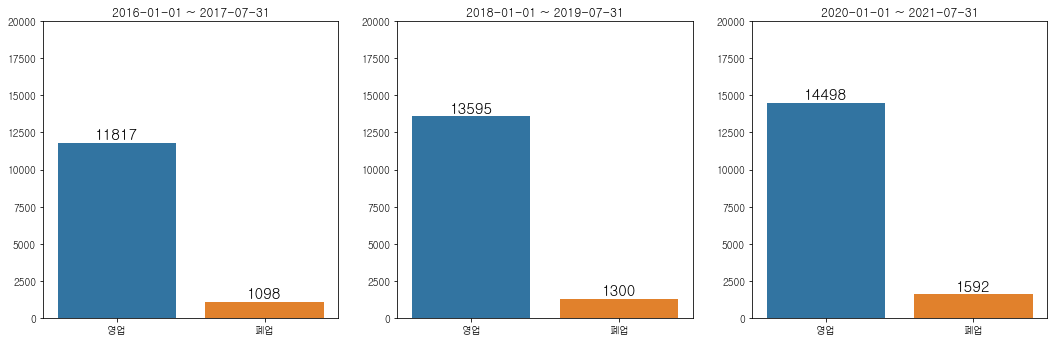

In [183]:
# 제주도

fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plots = sns.countplot(data = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '제주특별자치도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=20000)
plt.title('2016-01-01 ~ 2017-07-31')

plt.subplot(2, 3, 2)
plots = sns.countplot(data = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '제주특별자치도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=20000)
plt.title('2018-01-01 ~ 2019-07-31')

plt.subplot(2, 3, 3)
plots = sns.countplot(data = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '제주특별자치도'], x='상세영업상태명')
for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.ylim(top=20000)
plt.title('2020-01-01 ~ 2021-07-31')

plt.show()

In [184]:
print((len(all_shop_df_before2.loc[(all_shop_df_before2.상세영업상태명 == '폐업') &
                                   (all_shop_df_before2.소재지주소광역시도 == '제주특별자치도')]) /
       len(all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '제주특별자치도']))*100)

print((len(all_shop_df_before.loc[(all_shop_df_before.상세영업상태명 == '폐업') &
                                   (all_shop_df_before.소재지주소광역시도 == '제주특별자치도')]) /
       len(all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '제주특별자치도']))*100)

print((len(all_shop_df_after.loc[(all_shop_df_after.상세영업상태명 == '폐업') &
                                   (all_shop_df_after.소재지주소광역시도 == '제주특별자치도')]) /
       len(all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '제주특별자치도']))*100)

8.501742160278745
8.72776099362202
9.894344313238037


### 서울시 업종별 폐업률

In [185]:
df_seoul_before2 = all_shop_df_before2.loc[all_shop_df_before2.소재지주소광역시도 == '서울특별시']
df_seoul_before = all_shop_df_before.loc[all_shop_df_before.소재지주소광역시도 == '서울특별시']
df_seoul_after = all_shop_df_after.loc[all_shop_df_after.소재지주소광역시도 == '서울특별시']

In [186]:
temp = pd.concat([pd.pivot_table(df_seoul_after, index='업태구분명', values='OC').sort_values('OC', ascending=False).round(4).rename({'OC':'after'}, axis=1), 
                  pd.pivot_table(df_seoul_before2, index='업태구분명', values='OC').sort_values('OC', ascending=False).round(4).rename({'OC':'before'}, axis=1),
                  pd.pivot_table(df_seoul_before, index='업태구분명', values='OC').sort_values('OC', ascending=False).round(4).rename({'OC':'before2'}, axis=1)], axis=1)
temp.T

업태구분명         회      치킨     도시락      기타  카페/디저트      야식   패스트푸드   족발/보쌈  \
after    0.1730  0.1434  0.1387  0.1360  0.1334  0.1327  0.1294  0.1271   
before   0.1422  0.1504  0.1227  0.1388  0.1576  0.1239  0.1827  0.1315   
before2  0.1721  0.1620  0.1514  0.1546  0.1713  0.1347  0.1901  0.1368   

업태구분명    패밀리레스트랑      한식      분식  돈까스/일식  아시안/양식      피자      중식      찜탕  
after     0.1268  0.1264  0.1253  0.1224  0.1197  0.1193  0.1155  0.1105  
before    0.1154  0.1176  0.1364  0.1243  0.1025  0.1335  0.0988  0.0970  
before2   0.1099  0.1405  0.1450  0.1514  0.1341  0.1462  0.1258  0.1142

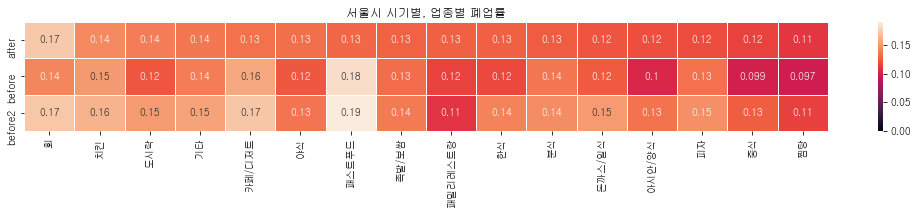

In [187]:
plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0)
plt.title('서울시 시기별, 업종별 폐업률')
plt.xlabel('')
plt.show()

- 폐업률이 증가한 업종은 회, 도시락, 아시안/양식 정도입니다.
- 폐업률이 감소한 업종은 치킨, 카페, 패스트푸드 정도입니다.

### 서울시 지역별 폐업률

In [188]:
temp2 = pd.concat([(pd.pivot_table(df_seoul_after, index='소재지주소시군구', values='OC').sort_values('OC', ascending=False).round(3).rename({'OC':'after'}, axis=1)),
                   (pd.pivot_table(df_seoul_before, index='소재지주소시군구', values='OC').sort_values('OC', ascending=False).round(3).rename({'OC':'before'}, axis=1)),
                   (pd.pivot_table(df_seoul_before2, index='소재지주소시군구', values='OC').sort_values('OC', ascending=False).round(3).rename({'OC':'before2'}, axis=1))], axis=1)
temp2.T

소재지주소시군구    중랑구   동대문구    구로구    양천구    강동구    송파구    마포구    강북구    성북구  \
after     0.188  0.176  0.172  0.169  0.159  0.155  0.153  0.143  0.141   
before    0.206  0.196  0.178  0.183  0.165  0.181  0.163  0.145  0.187   
before2   0.149  0.165  0.156  0.155  0.169  0.148  0.131  0.136  0.131   

소재지주소시군구    강남구    서초구    노원구    관악구   서대문구    동작구    강서구    도봉구    은평구  \
after     0.138  0.132  0.128  0.127  0.122  0.122  0.113  0.110  0.110   
before    0.146  0.151  0.147  0.136  0.161  0.122  0.110  0.121  0.136   
before2   0.138  0.129  0.140  0.134  0.123  0.112  0.115  0.128  0.120   

소재지주소시군구   영등포구    금천구    광진구    성동구     중구    용산구    종로구  
after     0.109  0.107  0.102  0.096  0.082  0.075  0.066  
before    0.139  0.118  0.111  0.105  0.093  0.110  0.093  
before2   0.115  0.110  0.096  0.100  0.081  0.089  0.074

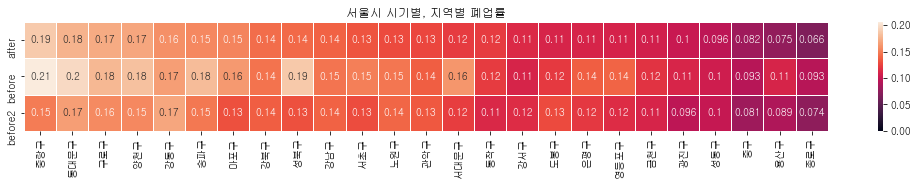

In [189]:
plt.figure(figsize=(18, 2))
sns.heatmap(temp2.T, annot=True, linewidths=.5, vmin=0)
plt.title('서울시 시기별, 지역별 폐업률')
plt.xlabel('')
plt.show()

- 전체적으로 코로나 이전 시점보다 코로나 이후 시점에 폐업률이 줄었습니다.
- 코로나 이전 시점에 폐업과 더불어 창업이 많지 않아서일수도 있습니다.

In [190]:
print('코로나 이후 창업건수: ', df_seoul_after.loc[df_seoul_after.인허가일자 >= '2020-01-01']['관리번호'].count())
print('코로나 직전 창업건수: ', df_seoul_before.loc[df_seoul_before.인허가일자 >= '2018-01-01']['관리번호'].count())
print('코로나 오래전 창업건수: ', df_seoul_before2.loc[df_seoul_before2.인허가일자 >= '2016-01-01']['관리번호'].count())

코로나 이후 창업건수:  21026
코로나 직전 창업건수:  19615
코로나 오래전 창업건수:  18193


- 그러나 코로나 이후 시대에 창업 점포수는 오히려 늘고 있습니다.
- 이러한 현상은 폐업을 하고 싶어도 못하는 점포수가 많기 때문이며, 보증금을 내며 버티고 있기 때문입니다.
- 반대로 창업이 주거상권 위주로 활발하게 이루어지고 있다는 것을 알 수 있습니다.

### 업종별, 지역별 폐업률

- 샘플 분석으로 중랑구, 서초구, 마포구를 살펴보겠습니다.

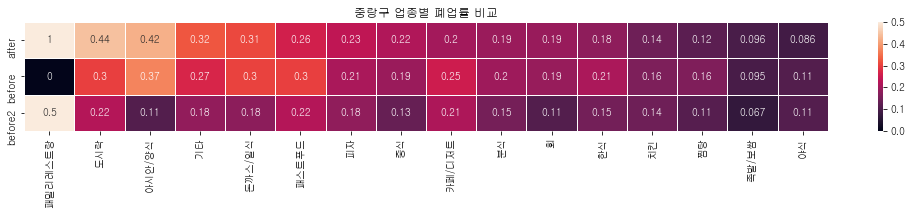

In [191]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '중랑구'], index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False).round(3).rename({'OC':'after'}, axis=1)),
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '중랑구'],index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False).round(3).rename({'OC':'before'}, axis=1)),
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '중랑구'],index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False).round(3).rename({'OC':'before2'}, axis=1))], axis=1)
plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0, vmax=0.5)
plt.title('중랑구 업종별 폐업률 비교')
plt.xlabel('')
plt.show()

- 중랑구는 전체적으로 폐업률이 상당히 높습니다.
- 도시락, 아시안/양식, 돈까스/일식 까지 폐업률이 3할이 넘어갑니다.
- 폐업률이 떨어지거나 낮은 업종은 카페/디저트, 치킨, 찡탕, 족발/보쌈, 야식 으로 볼 수 있습니다.

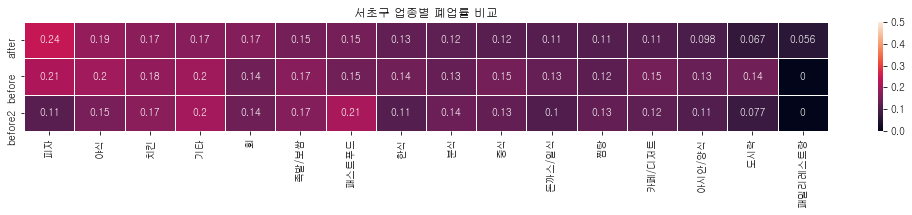

In [192]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '서초구'], index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False).round(3).rename({'OC':'after'}, axis=1)),
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '서초구'],index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False).round(3).rename({'OC':'before'}, axis=1)),
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '서초구'],index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False).round(3).rename({'OC':'before2'}, axis=1))], axis=1)
plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0, vmax=0.5)
plt.title('서초구 업종별 폐업률 비교')
plt.xlabel('')
plt.show()

- 서초구는 중랑구에 비해 폐업률이 전체적으로 낮게 형성되고 있습니다.
- 특이하게도 피자 업종이 폐업률이 가장 높고 꾸준히 높아져왔습니다. 회 업종 또한 상승한 업종입니다.
- 피자와 회를 제외하고서는 다른 업종들은 폐업률이 대체적으로 감소세에 있습니다.

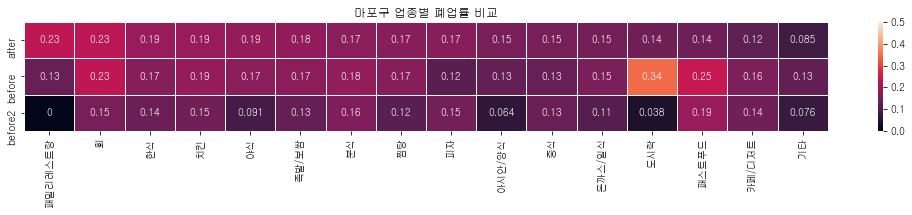

In [193]:
temp = pd.concat([(pd.pivot_table(df_seoul_after.loc[df_seoul_after.소재지주소시군구 == '마포구'],index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False).round(3).rename({'OC':'after'}, axis=1)),
                  (pd.pivot_table(df_seoul_before.loc[df_seoul_before.소재지주소시군구 == '마포구'],index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False).round(3).rename({'OC':'before'}, axis=1)),
                  (pd.pivot_table(df_seoul_before2.loc[df_seoul_before2.소재지주소시군구 == '마포구'],index='업태구분명', values='OC')
                   .sort_values('OC', ascending=False).round(3).rename({'OC':'before2'}, axis=1))], axis=1)
plt.figure(figsize=(18, 2))
sns.heatmap(temp.T, annot=True, linewidths=.5, vmin=0, vmax=0.5)
plt.title('마포구 업종별 폐업률 비교')
plt.xlabel('')
plt.show()

- 마포구도 서초구와 마찬가지로 폐업률이 대체적으로 낮습니다.
- 회 업종은 서초구와 마찬가지로 폐업률이 높아져왔으며, 한식 업종에서 폐업률이 꾸준히 증가하고 있습니다.

## 경쟁률 분석

In [194]:
# 인구 데이터와 맞춰주기 위해 2020년 12월 31일 이전에 창업했으며, 현재 영업 중인 데이터만 가져갑니다.
asdf_2020 = all_shop_df.loc[(all_shop_df.인허가일자 <= '2020-12-31')]
asdf_2020.loc[asdf_2020.폐업일자 > '2020-12-31', '상세영업상태명'] = '영업' # 2020년 12월 31일 이후에 폐업한 업체는 여전히 영업중인 것으로 바꿔줍니다.
asdf_2020 = asdf_2020.loc[asdf_2020.상세영업상태명 == '영업'] # 영업중인 데이터만 추려줍니다.

### 전국 광역시도별 비교

In [195]:
asdf_2020_sum = asdf_2020.groupby(['소재지주소광역시도', '업태구분명'])['관리번호'].count().reset_index()

In [196]:
# 인구 테이블을 합쳐줍니다.
asdf_demo_all = pd.merge(asdf_2020_sum, pop_all.reset_index()[['행정구역별(읍면동)', '합계', 'MZ인구']], how='left', left_on='소재지주소광역시도', right_on='행정구역별(읍면동)')

In [197]:
asdf_demo_all['점포당인구수'] = (asdf_demo_all.합계 / asdf_demo_all.관리번호).astype(int)
asdf_demo_all['점포당MZ인구수'] = (asdf_demo_all.MZ인구 / asdf_demo_all.관리번호).astype(int)

In [198]:
categories = ['치킨', '한식', '패스트푸드']

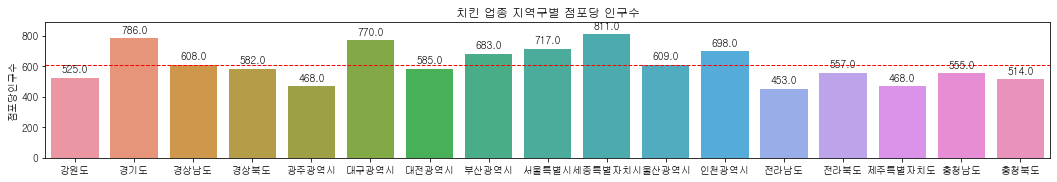

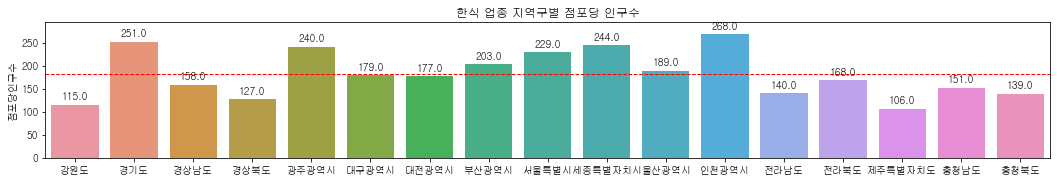

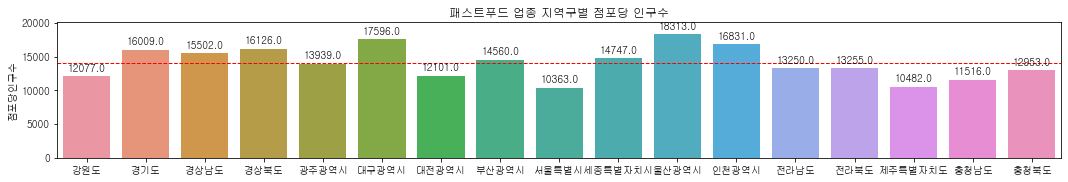

In [199]:
for col in list(categories):
    plt.figure(figsize=(18, 2.5))
    plots = sns.barplot(data = asdf_demo_all.loc[asdf_demo_all.업태구분명 == col].round(), x='소재지주소광역시도', y='점포당인구수', order = asdf_demo_all.소재지주소광역시도.unique())
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')
    plt.ylim(top = asdf_demo_all.loc[asdf_demo_all.업태구분명 == col].점포당인구수.max()*1.1)
    plt.axhline(y = asdf_demo_all.loc[asdf_demo_all.업태구분명 == col, '점포당인구수'].mean(), color = 'r', linestyle = '--', linewidth = 1)
    plt.title('{} 업종 지역구별 점포당 인구수'.format(col))
    plt.xlabel('')
    plt.show()

- 치킨은 전국적으로 1개의 점포당 약 600명의 고객을 가지며, 한식은 약 180명, 패스트푸드는 약 14000명의 고객을 가집니다.
- 서울시는 치킨 업종 같은 경우 점포당 717명으로 전국 평균보다 밀도가 낮습니다.
- 반면에 패스트푸드 업종 같은 경우는 점포당 10363명으로 전국에서 가장 밀도가 높은 수준입니다.

### 서울시 지역별 비교

In [200]:
# 서울시만 추출해줍니다.
asdf_2020_seoul = asdf_2020.loc[asdf_2020.소재지주소광역시도 == '서울특별시']
asdf_2020_seoul_sum = asdf_2020_seoul.groupby(['소재지주소시군구', '업태구분명', '상세영업상태명'])['관리번호'].count().reset_index()

In [201]:
# 인구데이터와 합쳐줍니다.
temp = pd.merge(asdf_2020_seoul_sum, pop_table.reset_index()[['index', '총인구2020', '일인가구2020', 'MZ인구2020']], how='left', left_on='소재지주소시군구', right_on='index')

In [202]:
temp.drop(['index', '상세영업상태명'], axis=1, inplace=True)

In [203]:
temp['점포당인구수'] = temp.총인구2020 / temp.관리번호
temp['점포당일인가구수'] = temp.일인가구2020 / temp.관리번호
temp['점포당MZ인구수'] = temp.MZ인구2020 / temp.관리번호

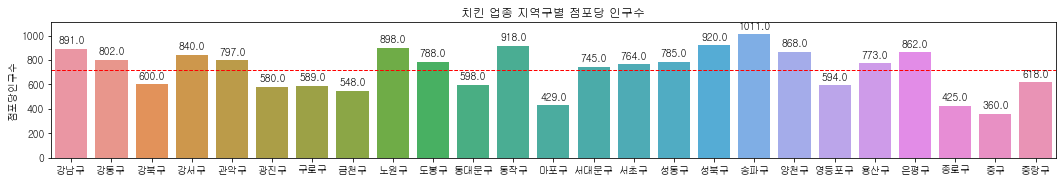

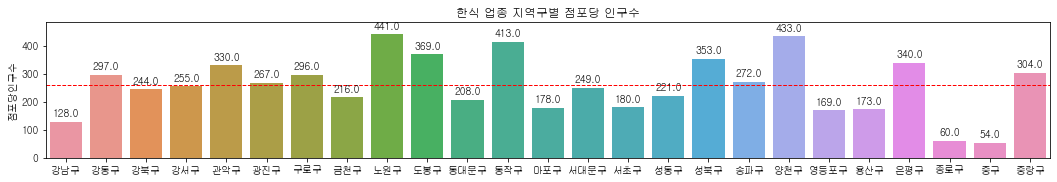

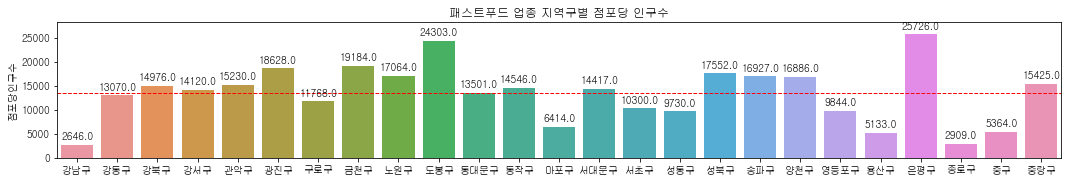

In [204]:
for col in list(categories):
    plt.figure(figsize=(18, 2.5))
    plots = sns.barplot(data = temp.loc[temp.업태구분명 == col].round(), x='소재지주소시군구', y='점포당인구수',
               order = temp.소재지주소시군구.unique())
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')
    plt.ylim(top = temp.loc[temp.업태구분명 == col].점포당인구수.max()*1.1)
    plt.title('{} 업종 지역구별 점포당 인구수'.format(col))
    plt.axhline(y = temp.loc[temp.업태구분명 == col, '점포당인구수'].mean(), color = 'r', linestyle = '--', linewidth = 1)
    plt.xlabel('')
    plt.show()

- 서울시의 치킨 점포 1개당 약 730명을 담당하고 있습니다.
- 마포구, 종로구, 중구는 인구대비 치킨 점포의 수가 많다고 볼 수 있으며, 송파구나 성북구는 적다고 볼 수 있습니다.
- 한식 업종 같은 경우는 종로구와 중구에 매우 높은 밀도를 가지며, 노원, 동작, 양천구는 인구대비 점포수가 적습니다.
- 패스트푸드는 편차가 매우 크게 나타나는데, 강남구는 2600명당 1개의 점포를 가지지만, 은평구는 25000명이 1개의 점포를 가집니다.

### 서울시 가구당 비교

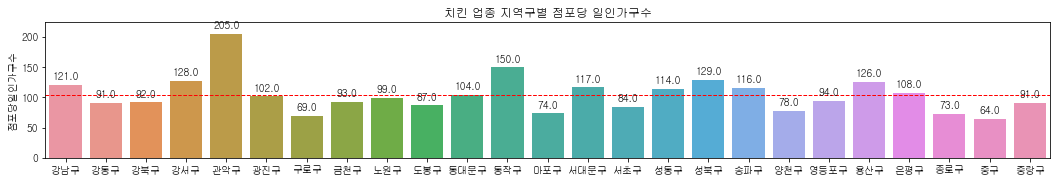

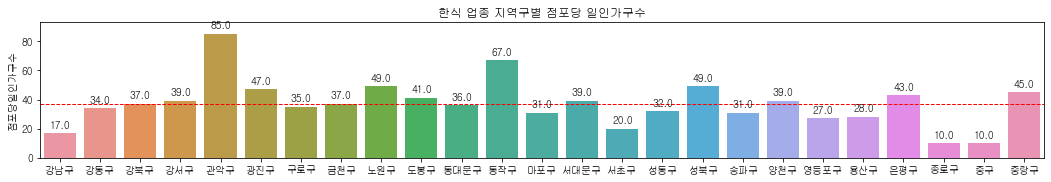

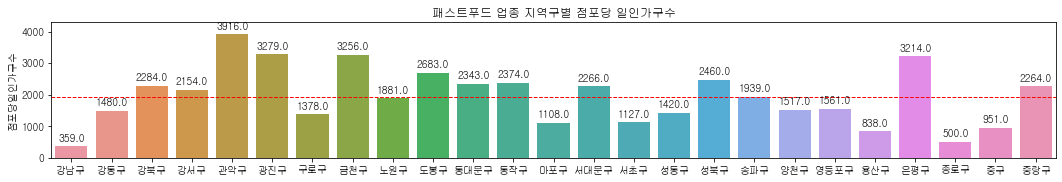

In [205]:
for col in list(categories):
    plt.figure(figsize=(18, 2.5))
    plots = sns.barplot(data = temp.loc[temp.업태구분명 == col].round(), x='소재지주소시군구', y='점포당일인가구수', order = temp.소재지주소시군구.unique())
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')
    plt.ylim(top = temp.loc[temp.업태구분명 == col].점포당일인가구수.max()*1.1)
    plt.title('{} 업종 지역구별 점포당 일인가구수'.format(col))
    plt.axhline(y = temp.loc[temp.업태구분명 == col, '점포당일인가구수'].mean(), color = 'r', linestyle = '--', linewidth = 1)
    plt.xlabel('')
    plt.show()

- 점포당 일인가구수를 살펴보면 다소 차이가 생기는 부분이 있습니다.
- 치킨 업종에서 강동구는 점포당 802명으로 평균보다 밀도가 낮았지만, 일인가구수는 점포당 91가구로 평균보다 밀집되어 있습니다.
- 관악구는 일인가구 비율이 가장 높은 지역으로, 인구 측면에서는 대체로 평균이었으나, 일인가구를 기준으로는 밀도가 낮아지는 것을 알 수 있습니다.

# POP_DEMO 데이터 분석

**MZ세대인구비율**<br>
: 배달 서비스를 가장 많이 이용하는 MZ세대의 비율은 해당 상권을 이해하는데 아주 중요한 요소입니다.

**MZ세대인구증가율**<br>
: MZ세대인구를 흡수하는 지역일수록 배달 음식 상권으로서 성장성이 높다고 할 수 있습니다.

: 주 1회 이상 배달 서비스를 이용하는 전체 비율은 66.2%인데 **20-30대에서는 주 1회 이상 배달 서비스를 이용하는 비율이 70% 이상**입니다. 이는 20-30대에서 다른 연령대 보다 배달 서비스를 많이 이용하고 있음을 알 수 있습니다. <표3 참고><br>

In [206]:
cl_url = 'images/표3.png'
Image(url=cl_url, width=500)

: 또한, 연령대가 낮을수록 서비스 이용 의향이 높은 것을 알 수 있습니다. <표4 참고><br>

In [207]:
cl_url = 'images/표4.png'
Image(url=cl_url, width=800)

**1인가구비율**<br>
: 1인가구는 3인 이상 가구보다 배달 서비스 이용 빈도가 더 높으면서도, 음식 배달에 대한 지불 용의가 높습니다.

: 2020년 배달 소비자들이 배달비에 지불한 평균 금액은 1,340원이었으나, 1인분 고객이 부담한 배달비는 1,890원으로 평균적인 배달 비용 보다 더 많이 배달비를 지불하고 있습니다. 이는 **값이 비싸도 본인들이 원하는 음식점이나 메뉴에 대해 금액에 관계없이 구매하거나 만족도를 높이기 위해 지출을 아끼지 않는 소비패턴**을 보여주는 것으로 분석되고 있습니다.<br>
*[출처] 한국농수산식품유통공사 2020년 외식업체 마케팅 트렌드 조사 보고서*

: 이를 종합해보았을 때, **MZ세대 및 1-2인 가구가 많은 지역은 배달 음식점 창업 지역으로 적합**하다고 볼 수 있습니다.

## ddd

## Base Analysis

##### 서울시 자치구별 총인구 수
**주민등록인구 vs 생활인구**  
> 주민등록인구는 주민등록신고에 기반하여 작성한 통계이며 생활인구는 조사시점 현재 그 지역에 머무르고 있는 실제 인구를 뜻합니다.  
> 본 분석에서 자치구별 총인구 수를 기준으로 비율을 산출하기 때문에 변동성이 적은 주민등록인구를 사용합시다.

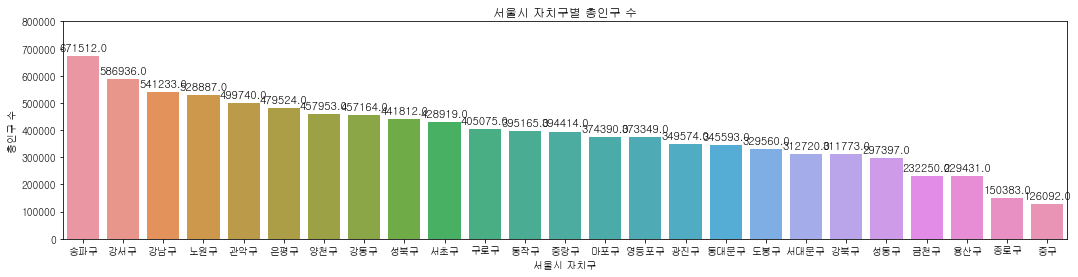

In [208]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020년06월_총인구수', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('총인구 수')
plt.title('서울시 자치구별 총인구 수')
plt.ylim(top = 800000)
plt.show()

* 기본적으로 자치구별 총인구 수를 비교합니다.  
* 송파구가 제일 인구 수가 많네요

##### 서울시 자치구별 세대 수 
**세대수란**  
> 주거 및 생계를 같이하는 집단

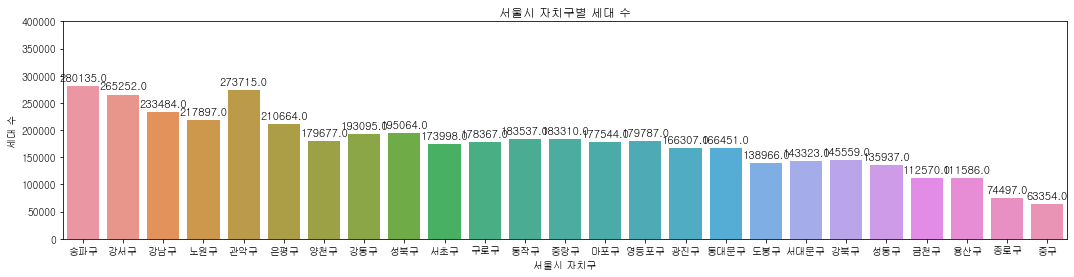

In [209]:
## 서울시 자치구별 세대 수
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020년06월_세대수', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('세대 수')
plt.title('서울시 자치구별 세대 수')
plt.ylim(top = 400000)
plt.show()

* 전반적으로 총인구 수가 낮을 수록 세대 수가 낮은 경향을 보이고 있습니다.  
* **관악구**의 경우는 조금 다르네요. 총인구 수 대비 세대가 많다는 것을 확인할 수 있습니다. 하지만, 자치구별로 총인구 수가 다르기 때문에 정확히 비교하기에는 어려움이 있네요... 
* 좀더 자세히 살펴보기 위해 **세대당 인구 수**를 확인해 볼 필요가 있겠습니다.

##### 서울시 자치구별 세대당 인구 수  
**세대당 인구 수**
> 세대당 인구 = 총인구 수 / 세대 수  

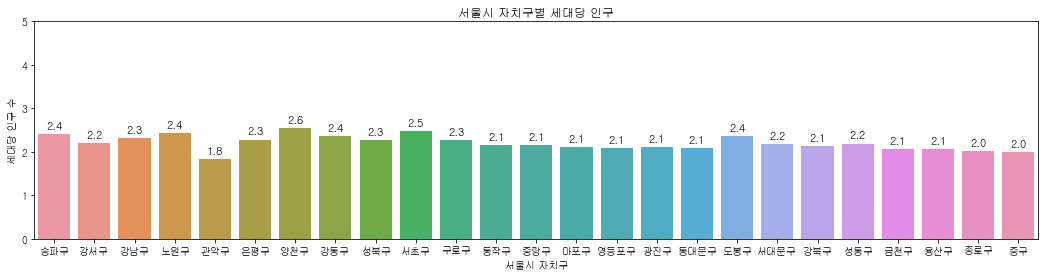

In [210]:
## 서울시 자치구별 세대 당 인구 수
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020년06월_세대당 인구', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('세대당 인구 수')
plt.title('서울시 자치구별 세대당 인구')
plt.ylim(top = 5)
plt.show()

* 확실히, **관악구**는 각 세대가 적은 수의 구성원으로 이루어져 있다는 것을 내포하는 것 같습니다.  
* 좀 더 자세히 확인해보기 위해 1인가구 수 비율도 같이 확인해보죠

##### 서울시 자치구별 1인가구 수

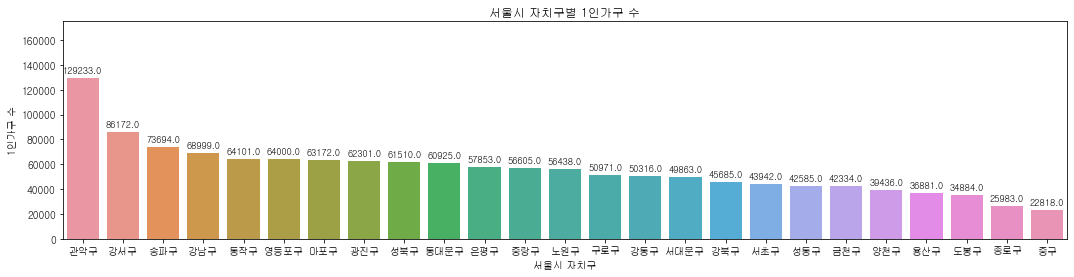

In [211]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020_1인가구', 
                    order = pop_final.groupby('자치구')['2020_1인가구'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('서울시 자치구')
plt.ylabel('1인가구 수')
plt.title('서울시 자치구별 1인가구 수')
plt.ylim(top = 175000)
plt.show()

* 서울시 자치구별 1인가구 수를 살펴보니, 관악구가 제일 많았습니다.
* 대학과 고시촌이 밀집해 있어서 학생과 수험생 수요가 많아 1인가구 수가 많아보입니다(출처: 서울경제TV)  
* 반면, 중구와 종로구는 관악구 절반에도 못 미치는 수치입니다.

##### 서울시 자치구별 일반가구 수
**일반가구란?**
> 1인 또는 2인 이상이 모여서 취사, 취침, 생계를 같이하는 단위인 가구중 외국인 가구와 집단가구(6인이상)를 제외한 가구

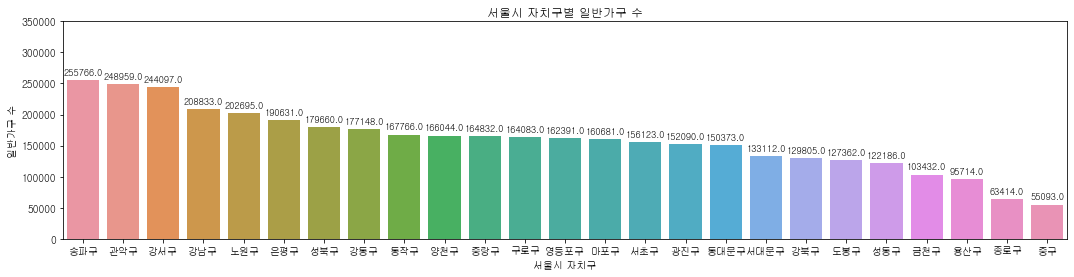

In [212]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020_일반가구', 
                    order = pop_final.groupby('자치구')['2020_일반가구'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('일반가구 수')
plt.title('서울시 자치구별 일반가구 수')
plt.ylim(top = 350000)
plt.show()

* 일반가구를 살펴보니 송파구가 가장 많은 것을 확인할 수 있습니다.  
* 중구와 종로구는 일반가구에서도 적은 수치를 보이고 있네요.  
* 배경에서 1인가구의 비율이 높아짐에 따라 배달 수요가 많아진다고 했으니, 1인가구 수 보다는 **1인가구 비율**로 분석해봅시다 

##### 서울시 자치구별 성별 비율

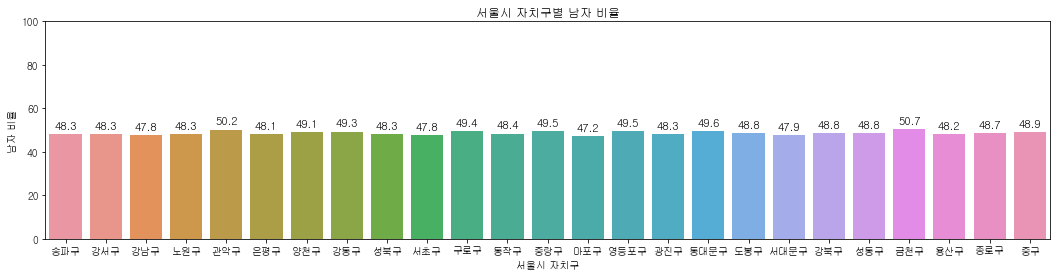

In [213]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020년6월_남자 비율', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('남자 비율')
plt.title('서울시 자치구별 남자 비율')
plt.ylim(top = 100)
plt.show()

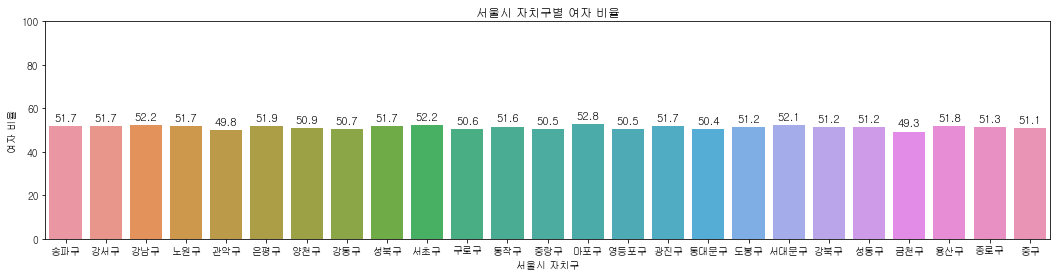

In [214]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = '2020년6월_여자 비율', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('여자 비율')
plt.title('서울시 자치구별 여자 비율')
plt.ylim(top = 100)
plt.show()

* 서울시 자치구별 성별 비율을 확인해본 결과, 전체적으로 여성의 비율이 다소 높은것을 확인할 수 있습니다. 

##### 서울시 자치구별 MZ인구 수
**MZ세대란**  
> 밀레니얼(Millennials)의 M과 제네레이션(Generation)의 Z가 합쳐진 말입니다. M세대는 1980년대 초부터 2000년대 초 출생한 세대로 정보기술(IT)에 능통하며 대학 진학률이 높다는 특징이 있습니다.  Z세대는 1990년대 중반 2000년대 초반 출생한 세대로 디지털 환경에서 자란’디지털 네이티브(디지털 원주민)’라는 특징이 있습니다.  
(출처: "MZ세대 제대로 알아보기", 생각의 힘)  

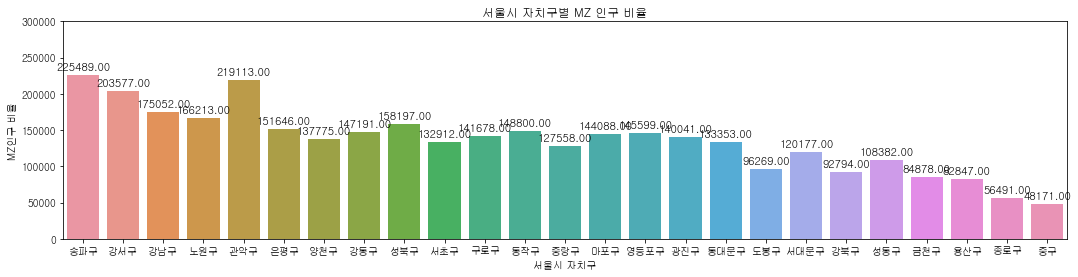

In [215]:
plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_final, x = '자치구', y = 'MZ인구2020', 
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('서울시 자치구')
plt.ylabel('MZ인구 비율')
plt.title('서울시 자치구별 MZ 인구 비율')
plt.ylim(top = 300000)
plt.show()

* **송파구**, **관악구**, **강서구**에서 MZ세대가 많이 거주하고 있습니다.  
* 반면, "중구", "종로구"에서는 MZ세대가 적군요...  
* MZ인구 또한 자치구별 총인구 수 대비 비율로 확인하면 좋을 것 같습니다. 그리고 연령대 분포도 같이 확인해보죠

##### 서울시 자치구별 연령대 분포

In [216]:
pop_final.columns

Index(['자치구', '2020년06월_총인구수', '2020년06월_세대수', '2020년06월_세대당 인구',
       '2020_1인가구_비율', '2020_1인가구', '2020_일반가구', '행정구역별(읍면동)', 'age_g',
       '연령대비율(%)', '2020년6월_남자 비율', '2020년6월_여자 비율', 'MZ인구2020', 'MZ인구비율2020',
       '미니주택비율2020', '큰주택비율2020'],
      dtype='object')

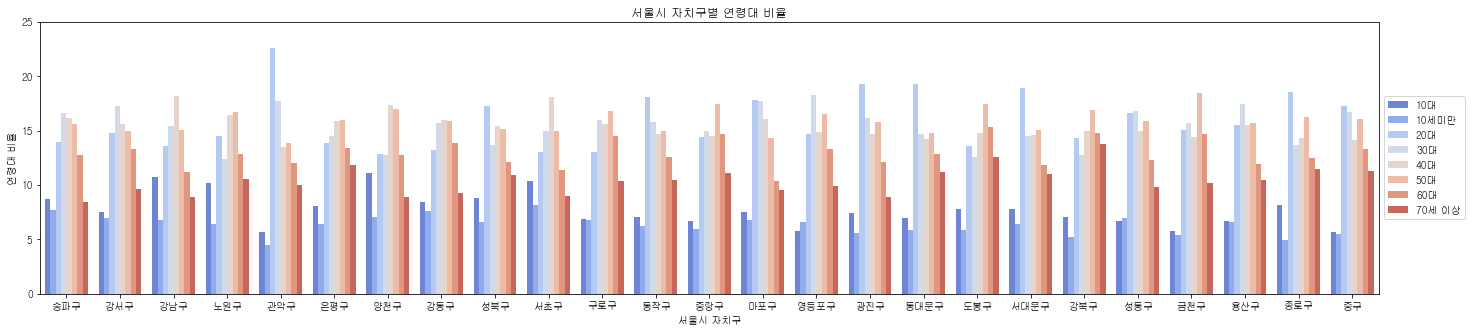

In [217]:
plt.figure(figsize=(24, 5))
plots = sns.barplot(data=pop_final, x='자치구', y='연령대비율(%)',hue='age_g', palette="coolwarm",
                   order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

plt.xlabel('서울시 자치구')
plt.ylabel('연령대 비율')
plt.title('서울시 자치구별 연령대 비율')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(top = 25)
plt.show()

#### Attractive of Hinterland(배후지 매력도)

In [218]:
# 배후지 매력도를 위한 테이블을 생성합니다.
## Score1: 1인가구 비율, Score2: MZ인구 비율
pop_score = pop_final.groupby('자치구').agg({'2020_1인가구_비율':max, 'MZ인구비율2020':max}).reset_index()
pop_score = pop_score.rename(columns = {'2020_1인가구_비율':'S1_1인가구비율', 'MZ인구비율2020':'S2_MZ비율'})
pop_score.head()

자치구  S1_1인가구비율  S2_MZ비율
0  강남구       33.0     34.5
1  강동구       28.4     33.1
2  강북구       35.2     31.0
3  강서구       35.3     36.0
4  관악구       51.9     43.6

##### 1인가구비율
서울시 자치구별 총인구수 대비 1인가구 비율을 확인해봅시다

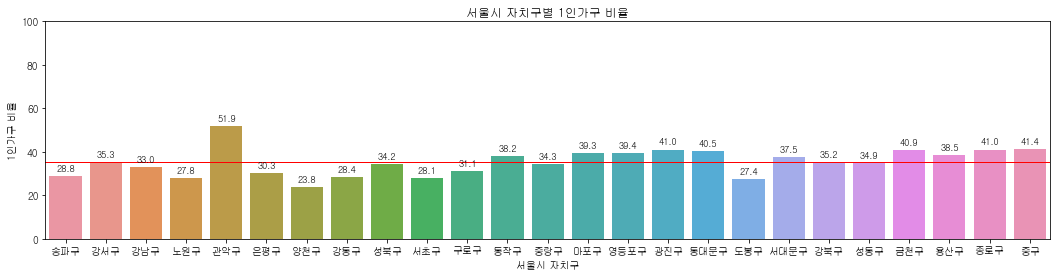

In [219]:
mean_y = pop_score['S1_1인가구비율'].mean()

plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_score, x = '자치구', y = 'S1_1인가구비율',
                    order = pop_final.groupby('자치구')['2020년06월_총인구수'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

plt.axhline(y = mean_y, color = 'r', linewidth = 1)
plt.xlabel('서울시 자치구')
plt.ylabel('1인가구 비율')
plt.title('서울시 자치구별 1인가구 비율')
plt.ylim(top = 100)
plt.show()

* "1인가구 수"와 같이 **관악구**에서 가장 높은 비율을 차지하는 것을 확인할 수 있습니다.  
* "1인가구 수" 기준으로 정렬했을 때, "1인가구 수"가 상대적으로 적었던 **종로구**, **중구**에서 높은 비율을 보이고 있네요?
* "1인가구"안에는 다양한 연령대가 분포에 있을 거고, 특히 독거노인등과 같은 취약계층은 배달 수요가 많지는 않을겁니다. 이처럼 "1인가구 비율"도 중요하지만 그 안에 연령대 분포를 확인하는것도 필요해 보이네요

In [220]:
## Z_score 정규화
pop_s1 = pop_score.copy()
S1_mean = pop_s1['S1_1인가구비율'].mean()
S1_std = pop_s1['S1_1인가구비율'].std()
pop_s1['S1_Z_score'] = pop_s1.apply(lambda x: (x['S1_1인가구비율'] - S1_mean) / S1_std, axis = 1)
pop_s1_T = pop_s1.transpose().rename(columns = pop_s1.transpose().iloc[0]).drop(pop_s1.transpose().index[0])
pop_s1_T

강남구       강동구       강북구       강서구      관악구       광진구  \
S1_1인가구비율       33.0      28.4      35.2      35.3     51.9      41.0   
S2_MZ비율         34.5      33.1      31.0      36.0     43.6      39.6   
S1_Z_score -0.366497 -1.103336 -0.014096  0.001922  2.66095  0.914962   

                 구로구       금천구       노원구       도봉구      동대문구       동작구  \
S1_1인가구비율       31.1      40.9      27.8      27.4      40.5      38.2   
S2_MZ비율         32.5      34.0      32.5      30.5      38.0      37.9   
S1_Z_score -0.670844  0.898944 -1.199446 -1.263519  0.834871  0.466451   

                 마포구      서대문구       서초구       성동구       성북구       송파구  \
S1_1인가구비율       39.3      37.5      28.1      34.9      34.2      28.8   
S2_MZ비율         39.4      37.9      33.1      37.1      36.1      35.1   
S1_Z_score  0.642652  0.354323 -1.151391 -0.062151 -0.174278 -1.039263   

                 양천구     영등포구       용산구      은평구       종로구        중구      중랑구  
S1_1인가구비율       23.8     39.4      38.5     30.3      41.0      41.4     34.3  
S2_MZ비율         31.4     36.1      36.7     32.7      37.3      37.4     33.1  
S1_Z_score -1.840175  0.65867  0.514506 -0.79899  0.914962  0.979035 -0.15826

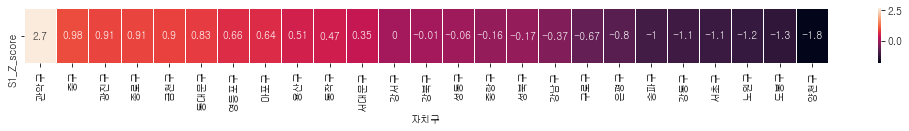

In [221]:
## 정규화된 서울시 자치구별 1인가구 비율
plt.figure(figsize=(18, 1))
sns.heatmap(pop_s1.set_index('자치구').loc[:,'S1_Z_score'].sort_values(ascending = False).to_frame().T.round(2), annot = True, linewidth = .5)
plt.show()

##### MZ세대 비율
서울시 자치구별 1인가구 비율 대비 MZ세대 비율을 확인해봅시다. 
> MZ인구 비율 = (MZ인구 수 / 총인구 수) * 100

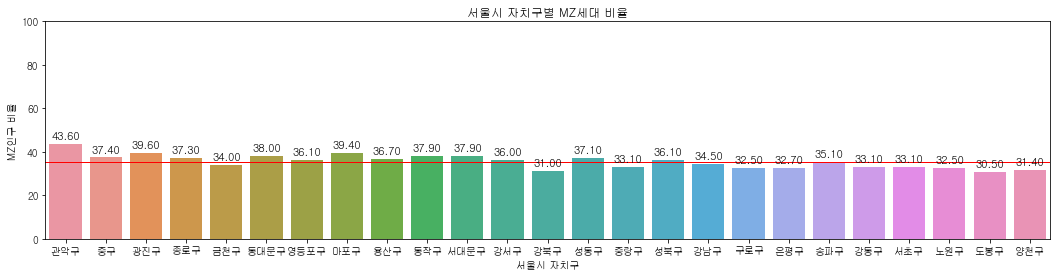

In [222]:
mean_y = pop_score['S2_MZ비율'].mean()

plt.figure(figsize = (18, 4))
plots = sns.barplot(data = pop_score, x = '자치구', y = 'S2_MZ비율', 
                    order = pop_score.groupby('자치구')['S1_1인가구비율'].mean().sort_values(ascending = False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

plt.axhline(y = mean_y, color = 'r', linewidth = 1)
plt.xlabel('서울시 자치구')
plt.ylabel('MZ인구 비율')
plt.title('서울시 자치구별 MZ세대 비율')
plt.ylim(top = 100)
plt.show()

* 총인구수 대비 자치구별 MZ세대 비율을 살펴본 결과, **관악구**에서 가장 높은 비율을 보이고 있습니다.  
* 관악구, 중구, 광진구, 종로구, 동대문구, 영등포구, 마포구, 용산구, 동작구, 서대문구, 강서구, 성동구, 성북구가 자치구 평균보다 높은 비율의 MZ세대를 보유하고 있습니다. 
* "마포구", "성동구", "성북구"는 1인 가구 비율에 비해 보다 높은 MZ세대 비율을 보유하고 있습니다. 즉, 젊은층 1인가구가 많이 거주하고 있다는 것을 확인할 수 있습니다.  

In [223]:
## Z_score 정규화
pop_s2 = pop_score.copy()
S2_mean = pop_s2['S2_MZ비율'].mean()
S2_std = pop_s2['S2_MZ비율'].std()
pop_s2['S2_Z_score'] = pop_s2.apply(lambda x: (x['S2_MZ비율'] - S2_mean) / S2_std, axis = 1)
pop_s2_T = pop_s2.transpose().rename(columns = pop_s2.transpose().iloc[0]).drop(pop_s2.transpose().index[0])
pop_s2_T

강남구       강동구       강북구       강서구       관악구       광진구  \
S1_1인가구비율       33.0      28.4      35.2      35.3      51.9      41.0   
S2_MZ비율         34.5      33.1      31.0      36.0      43.6      39.6   
S2_Z_score -0.307561 -0.754227 -1.424225  0.171009  2.595765  1.319577   

                 구로구       금천구       노원구       도봉구      동대문구       동작구  \
S1_1인가구비율       31.1      40.9      27.8      27.4      40.5      38.2   
S2_MZ비율         32.5      34.0      32.5      30.5      38.0      37.9   
S2_Z_score -0.945655 -0.467084 -0.945655 -1.583748  0.809103  0.777198   

                 마포구      서대문구       서초구       성동구       성북구       송파구  \
S1_1인가구비율       39.3      37.5      28.1      34.9      34.2      28.8   
S2_MZ비율         39.4      37.9      33.1      37.1      36.1      35.1   
S2_Z_score  1.255768  0.777198 -0.754227  0.521961  0.202914 -0.116133   

                 양천구      영등포구       용산구       은평구      종로구        중구  \
S1_1인가구비율       23.8      39.4      38.5      30.3     41.0      41.4   
S2_MZ비율         31.4      36.1      36.7      32.7     37.3      37.4   
S2_Z_score -1.296606  0.202914  0.394342 -0.881845  0.58577  0.617675   

                 중랑구  
S1_1인가구비율       34.3  
S2_MZ비율         33.1  
S2_Z_score -0.754227

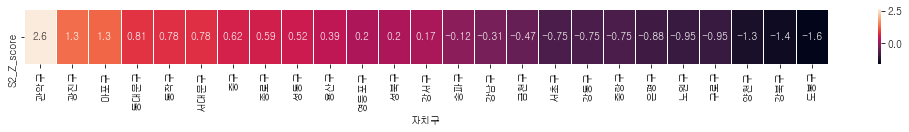

In [224]:
## 서울시 자치구별 MZ인구 비율
plt.figure(figsize=(18, 1))
sns.heatmap(pop_s2.set_index('자치구').iloc[:,-1].sort_values(ascending = False).to_frame().T.round(2), annot = True, linewidth = .5)
plt.show()

## 인구 이동 분석

In [225]:
# 전처리가 까다롭습니다.
pop_transfer = pop_transfer.set_index([('행정구역(시군구)별', '행정구역(시군구)별'), ('연령별','연령별')]).stack().reset_index()
pop_transfer.columns = ['지역구', '연령별', '이동종류', '2016', '2017', '2018', '2019', '2020']
pop_transfer_sum = pop_transfer.loc[(pop_transfer.연령별 == '계') & (pop_transfer.지역구 != '서울특별시')]
pop_transfer_sum.set_index(['지역구', '이동종류'], inplace=True)
pop_transfer_mz = pop_transfer.loc[~(pop_transfer.연령별 == '계') & (pop_transfer.지역구 != '서울특별시')].groupby(['지역구', '이동종류']).sum()
pop_transfer_mz.rename({'2016': 'MZ2016', '2017': 'MZ2017', '2018': 'MZ2018', '2019': 'MZ2019', '2020': 'MZ2020'}, axis=1, inplace=True)
pop_transfer_fianl = pd.concat([pop_transfer_sum, pop_transfer_mz], axis=1).reset_index().drop(['연령별'], axis=1)
pop_transfer_fianl1 = pop_transfer_fianl.loc[pop_transfer_fianl.이동종류 == '순이동 (명)'].set_index(['지역구']).drop(['이동종류'], axis=1)

### 전체 순이동 비교

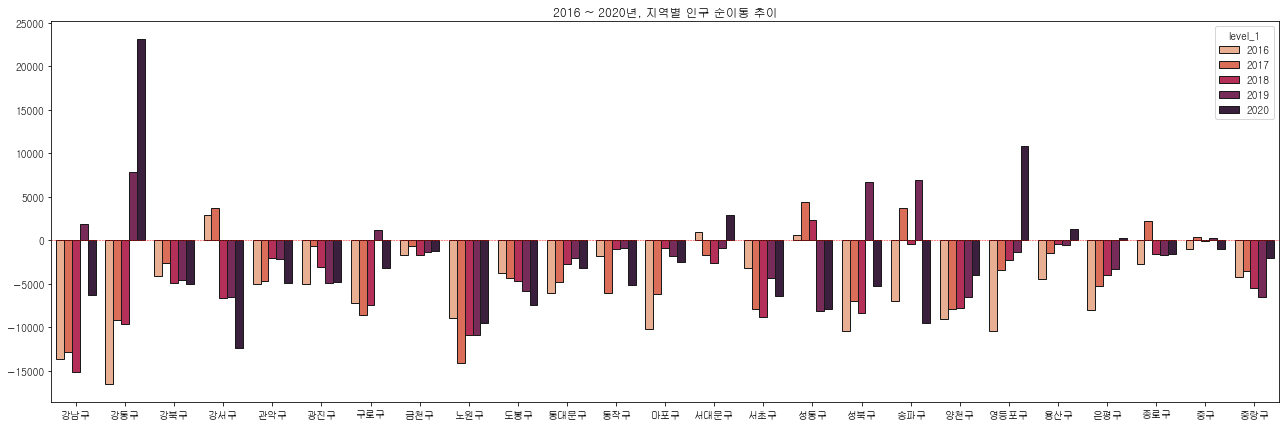

In [226]:
plt.figure(figsize=(22, 7))
sns.barplot(data = pop_transfer_fianl1.iloc[:, :5].stack().reset_index(),
            x='지역구', y=0, hue='level_1', edgecolor=".1", palette="rocket_r")
plt.axhline(y = 0, color = 'r', linestyle = '--', linewidth = 0.5)
plt.xlabel('')
plt.ylabel('')
plt.title('2016 ~ 2020년, 지역별 인구 순이동 추이')
plt.show()

- https://www.hani.co.kr/arti/area/capital/985179.html
- 최근 5년간 서울시 인구는 꾸준히 감소했습니다.
- 인구 순증이 일어난 곳은 오직 강동구, 서대문구, 영등포구, 용산구 뿐입니다.
- 강서구는 순감이 심화되고 있으며, 노원구, 도봉구, 성동구도 순감이 심각한 수준입니다.

### MZ세대인구 순이동 비교

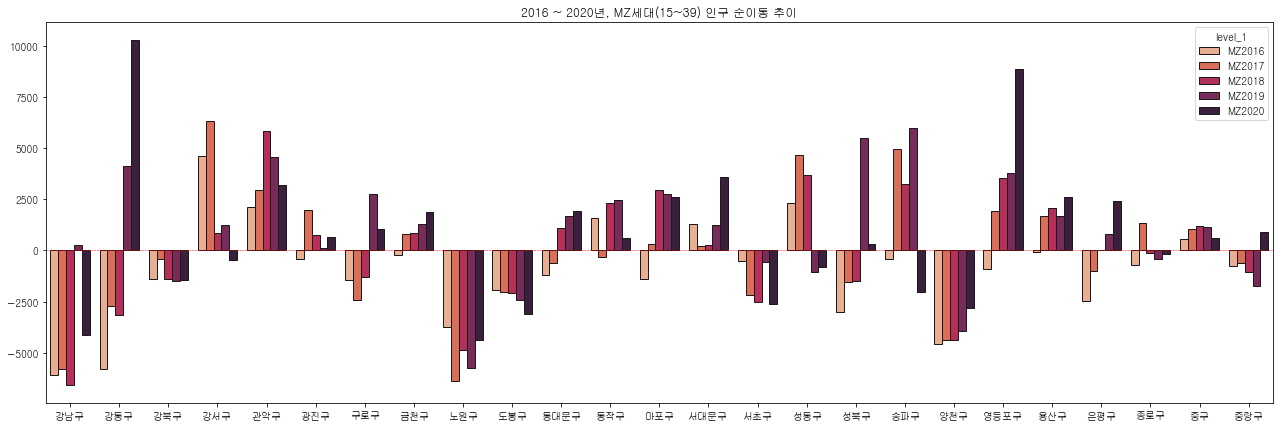

In [227]:
plt.figure(figsize=(22, 7))
sns.barplot(data = pop_transfer_fianl1.iloc[:, 5:].stack().reset_index(), x='지역구', y=0, hue='level_1', edgecolor=".1", palette="rocket_r")
plt.axhline(y = 0, color = 'r', linestyle = '--', linewidth = 0.5)
plt.xlabel('')
plt.ylabel('')
plt.title('2016 ~ 2020년, MZ세대(15~39) 인구 순이동 추이')
plt.show()

- MZ세대 인구 순이동을 살펴보면 다소 다른 결과가 펼쳐집니다.
- 총인구 순증이 일어났던 강동구와 영등포구는 MZ세대 인구의 순증이 두드러집니다.
- 1인가구가 많은 관악구를 비롯하여 금천구, 마포구, 서대문구, 용산구 등은 꾸준히 MZ세대의 순증이 일어난 지역입니다.
- 구로구, 동대문구, 성북구, 은평구, 중랑구 등은 최근에 MZ세대의 순증으로 전환된 지역입니다.
- 강남구, 노원구, 도봉구, 서초구, 도봉구는 꾸준히 순감이 일어나는 지역입니다.


- 송파구마저 2020년 순감으로 전환되며, 강남3구는 MZ세대가 빠져나가는 지역이 되었습니다.
- 여의도를 중심으로 뭉쳐 있는 영등포구, 마포구, 서대문구, 용산구는 MZ세대를 흡수하는 지역입니다.

# SOLUTION: 배달 전문 음식점 창업을 위한 다이아몬드 모형

In [228]:
cl_url = 'images/다이아몬드_모델.png'
Image(url=cl_url, width=800)

> **배달 용이성**
>>**배달 시간**<br>
>>: 배달시간은 이용자들의 마음을 움직일 수 있는 가장 강력한 무기<br>
>>**배차 시간**<br>
>>: 배달 시간을 줄이기 위해서는 배차 시간을 단축시키는 것이 중요합니다.<br>

> **생존 가능성**
>>**업종 폐업률**<br>
>>: 지역별 업종 폐업률은 창업 후 생존율을 미리 예측해볼 수 있습니다.<br>
>>**인구 대비 점포 수**<br>
>>: 인구수 대비 점포 수는 해당 지역에 대한 해당 업종의 경쟁 상황을 유추해볼 수 있습니다.

> **배후지 매력도**
>>**1인가구비율**<br>
>>: 1인가구는 3인 이상 가구보다 배달 서비스 이용 빈도가 더 높으면서도, 음식 배달에 대한 지불 용의가 높습니다.<br>
>>**MZ세대인구비율**<br>
>>: 배달 서비스를 가장 많이 이용하는 MZ세대의 비율은 해당 상권을 이해하는데 아주 중요한 요소입니다.

> **성장 가능성**
>>**MZ세대인구증가율**<br>
>>: MZ세대인구를 흡수하는 지역일수록 배달 음식 상권으로서 성장성이 높다고 할 수 있습니다.<br>
>>**배달 주문 증가율**<br>
>>: 배달 주문이 증가하는 업종은 배달앱을 통한 온라인 시프팅과 배달 서비스에 적응하고 있다는 것을 시사합니다.

## 배달 용이성

### 배달소요시간

배달 데이터에는 존재하지 않는 지역구가 있습니다. 부득이하게 다른 지역, 업종에 대한 평균으로 보간해줍니다.<br>
추가로 데이터가 주어진다면 더욱 정확한 수치를 추출할 수 있을 것입니다.

In [229]:
goo = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구']

In [230]:
dlvr_lastmile = pd.pivot_table(data=dlvr_seoul.loc[(dlvr_seoul.수령to완료minutes != 0) & ~(dlvr_seoul.배달상점업종명.isin(['배달전문업체', '심부름']))],
                               index='배달상점시군구명', columns='배달상점업종명', values='수령to완료minutes').T

In [231]:
# 각 지역구 평균을 통해 비어있는 업종배달소요 시간을 채워줍니다.
for col in list(dlvr_lastmile.columns):
    dlvr_lastmile[col] = dlvr_lastmile[col].fillna(dlvr_lastmile[col].mean())

In [232]:
# 존재하지 않는 지역구를 찾아줍니다.
nogoo = list(set(goo).difference(dlvr_lastmile.columns))

In [233]:
# 각 업종명 평균을 통해 비어있는 지역구를 채워줍니다.
for col in nogoo:
    dlvr_lastmile[col] = dlvr_lastmile.mean(axis=1)

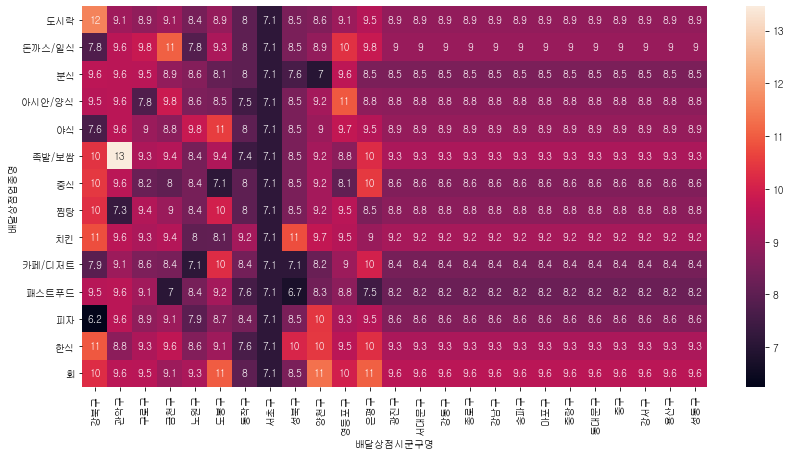

In [234]:
plt.figure(figsize=(14, 7))
sns.heatmap(dlvr_lastmile, annot=True)
plt.show()

In [235]:
# # 정규화를 진행합니다.
# mean_ = dlvr_lastmile.values.mean()
# std_ = dlvr_lastmile.values.std()
# dlvr_lastmile_zscore = pd.DataFrame((mean_ - dlvr_lastmile.values) / std_, columns = dlvr_lastmile.columns, index=dlvr_lastmile.index)

In [280]:
dlvr_lastmile

배달상점시군구명        강북구        관악구       구로구        금천구       노원구        도봉구  \
배달상점업종명                                                                    
도시락       11.600000   9.113208  8.863918   9.058853  8.428936   8.936407   
돈까스/일식     7.750000   9.550650  9.791681  11.038848  7.828660   9.307751   
분식         9.575697   9.550650  9.534927   8.897271  8.646995   8.111451   
아시안/양식     9.492412   9.550650  7.754188   9.839775  8.559028   8.455657   
야식         7.641379   9.550650  9.031711   8.776173  9.784314  10.537583   
족발/보쌈     10.365385  13.460000  9.341087   9.448634  8.428936   9.361732   
중식        10.466248   9.550650  8.203507   8.028759  8.428936   7.096035   
찜탕        10.328194   7.307692  9.430528   9.033283  8.428936   9.971449   
치킨        10.812068   9.550650  9.307579   9.442014  8.040119   8.078050   
카페/디저트     7.926136   9.064631  8.552097   8.447864  7.117405  10.273203   
패스트푸드      9.492412   9.550650  9.123360   7.046996  8.428936   9.187258   
피자         6.250000   9.550650  8.855379   9.058853  7.943775   8.669393   
한식        10.938363   8.807718  9.323359   9.647762  8.643757   9.070647   
회         10.255474   9.550650  9.540719   9.058853  9.296372  10.981898   

배달상점시군구명       동작구       서초구        성북구        양천구       영등포구        은평구  \
배달상점업종명                                                                    
도시락       8.007555  7.130924   8.480515   8.600000   9.059432   9.476879   
돈까스/일식    8.007555  7.130924   8.480515   8.920135  10.359287   9.797220   
분식        8.007555  7.130924   7.602052   6.990588   9.628138   8.529589   
아시안/양식    7.500000  7.130924   8.480515   9.196505  10.948599   8.840031   
야식        8.007555  7.130924   8.480515   9.020104   9.698292   9.476879   
족발/보쌈     7.377522  7.130924   8.480515   9.196505   8.766023  10.238068   
중식        8.007555  7.130924   8.480515   9.196505   8.068439  10.488439   
찜탕        8.007555  7.130924   8.480515   9.196505   9.529539   8.516667   
치킨        9.180223  7.130924  10.809160   9.697962   9.487492   8.983258   
카페/디저트    8.384304  7.130924   7.127726   8.203437   9.039088  10.013812   
패스트푸드     7.562978  7.130924   6.742424   8.341232   8.794645   7.488238   
피자        8.399212  7.130924   8.480515  10.424460   9.297217   9.476879   
한식        7.648649  7.130924  10.121212  10.471388   9.547423  10.286823   
회         8.007555  7.130924   8.480515  11.295745   9.995181  11.063520   

배달상점시군구명       광진구      서대문구       강동구       종로구       강남구       송파구  \
배달상점업종명                                                                
도시락       8.896385  8.896385  8.896385  8.896385  8.896385  8.896385   
돈까스/일식    8.996936  8.996936  8.996936  8.996936  8.996936  8.996936   
분식        8.517153  8.517153  8.517153  8.517153  8.517153  8.517153   
아시안/양식    8.812357  8.812357  8.812357  8.812357  8.812357  8.812357   
야식        8.928006  8.928006  8.928006  8.928006  8.928006  8.928006   
족발/보쌈     9.299611  9.299611  9.299611  9.299611  9.299611  9.299611   
중식        8.595543  8.595543  8.595543  8.595543  8.595543  8.595543   
찜탕        8.780149  8.780149  8.780149  8.780149  8.780149  8.780149   
치킨        9.209958  9.209958  9.209958  9.209958  9.209958  9.209958   
카페/디저트    8.440052  8.440052  8.440052  8.440052  8.440052  8.440052   
패스트푸드     8.240838  8.240838  8.240838  8.240838  8.240838  8.240838   
피자        8.628105  8.628105  8.628105  8.628105  8.628105  8.628105   
한식        9.303169  9.303169  9.303169  9.303169  9.303169  9.303169   
회         9.554784  9.554784  9.554784  9.554784  9.554784  9.554784   

배달상점시군구명       마포구       중랑구      동대문구        중구       강서구       용산구       성동구  
배달상점업종명                                                                         
도시락       8.896385  8.896385  8.896385  8.896385  8.896385  8.896385  8.896385  
돈까스/일식    8.996936  8.996936  8.996936  8.996936  8.996936  8.996936  8.996936  
분식        8.517153  8.517153  8.517153  8.517153  8.517153  8.517153  8.517153  
아시안/양식  

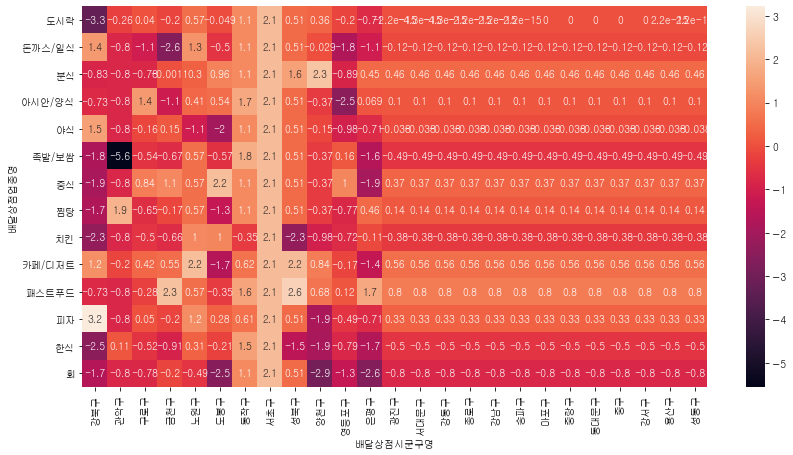

In [291]:
# 로버스트 정규화를 진행합니다.
median_ = np.median(dlvr_lastmile.values)
q75, q25 = np.percentile(dlvr_lastmile.values, [75, 25])
iqr_ = q75 - q25
dlvr_lastmile_rscore = pd.DataFrame((median_ - dlvr_lastmile.values) / iqr_, columns = dlvr_lastmile.columns, index=dlvr_lastmile.index)

plt.figure(figsize=(14, 7))
sns.heatmap(dlvr_lastmile_rscore, annot=True)
plt.show()

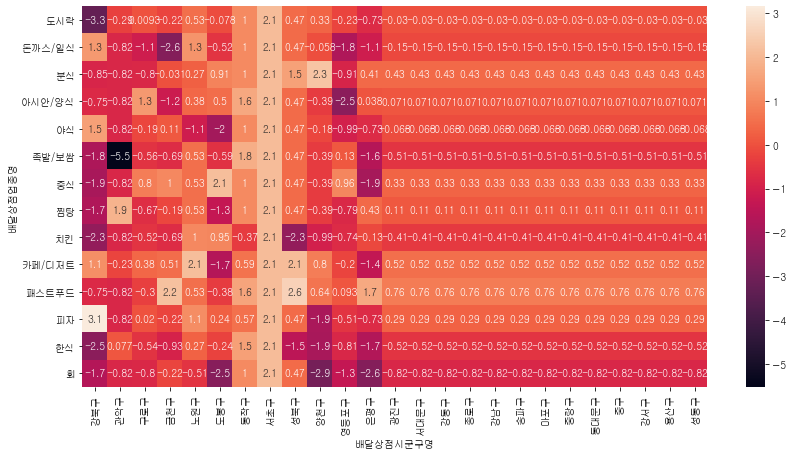

In [236]:
plt.figure(figsize=(14, 7))
sns.heatmap(dlvr_lastmile_zscore, annot=True)
plt.show()

### 배차소요시간

In [237]:
dlvr_firstmile = pd.pivot_table(data=dlvr_seoul.loc[(dlvr_seoul.접수to배차minutes != 0) & ~(dlvr_seoul.배달상점업종명.isin(['배달전문업체', '심부름']))],
                                index='배달상점시군구명', columns='배달상점업종명', values='접수to배차minutes').T

In [238]:
# 각 지역구 평균을 통해 비어있는 업종별 시간을 채워줍니다.
for col in list(dlvr_firstmile.columns):
    dlvr_firstmile[col] = dlvr_firstmile[col].fillna(dlvr_firstmile[col].mean())

In [239]:
# 존재하지 않는 지역구를 찾아줍니다.
nogoo = list(set(goo).difference(dlvr_firstmile.columns))

In [240]:
# 각 업종명 평균을 통해 비어있는 지역구를 채워줍니다.
for col in nogoo:
    dlvr_firstmile[col] = dlvr_firstmile.mean(axis=1)

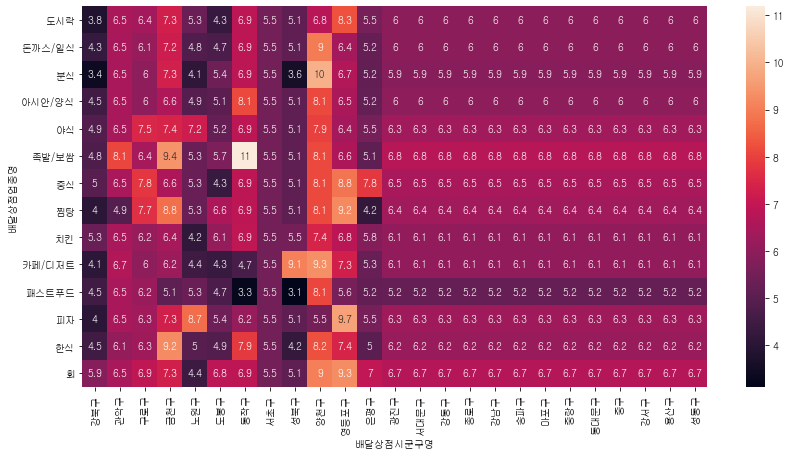

In [241]:
plt.figure(figsize=(14, 7))
sns.heatmap(dlvr_firstmile, annot=True)
plt.show()

In [242]:
# # 정규화를 진행합니다.
# mean_ = dlvr_firstmile.values.mean()
# std_ = dlvr_firstmile.values.std()
# dlvr_firstmile_zscore = pd.DataFrame((mean_ - dlvr_firstmile.values) / std_, columns = dlvr_firstmile.columns, index=dlvr_firstmile.index)

In [294]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(dlvr_firstmile.values)
transformer.transform(dlvr_firstmile.values)

array([[-8.53769781e-01,  7.88494205e-02,  1.44790393e-01,
         0.00000000e+00,  2.29523487e-01, -9.74085048e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.66960507e+00,  5.52163003e-01,  8.07489009e-01,
        -4.13115700e-01, -4.13115700e-01, -4.13115700e-01,
        -4.13115700e-01, -4.13115700e-01, -4.13115700e-01,
        -4.13115700e-01, -4.13115700e-01, -4.13115700e-01,
        -4.13115700e-01, -4.13115700e-01, -4.13115700e-01,
        -4.13115700e-01],
       [-2.87313609e-01,  0.00000000e+00, -2.80657993e-01,
        -1.10465183e-01, -4.11428313e-01, -4.65419364e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.03736312e+00, -2.94694010e-01, -4.26730087e-02,
        -4.23666884e-01, -4.23666884e-01, -4.23666884e-01,
        -4.23666884e-01, -4.23666884e-01, -4.23666884e-01,
        -4.23666884e-01, -4.23666884e-01, -4.23666884e-01,
        -4.23666884e-01, -4.23666884e-01, -4.23666884e-01,
        -4.23666884e-01],
    

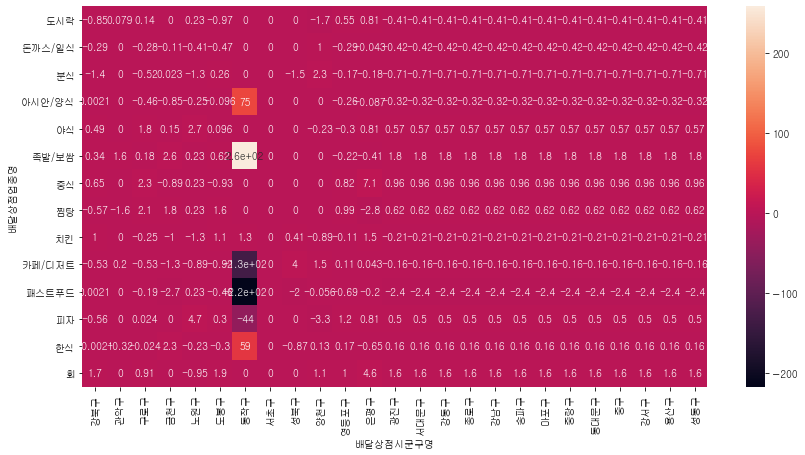

In [295]:
# 로버스트 정규화를 진행합니다.
median_ = np.median(dlvr_firstmile.values)
q75, q25 = np.percentile(dlvr_firstmile.values, [75, 25])
iqr_ = q75 - q25
dlvr_firstmile_rscore = pd.DataFrame(transformer.transform(dlvr_firstmile.values), columns = dlvr_firstmile.columns, index=dlvr_firstmile.index)

plt.figure(figsize=(14, 7))
sns.heatmap(dlvr_firstmile_rscore, annot=True)
plt.show()

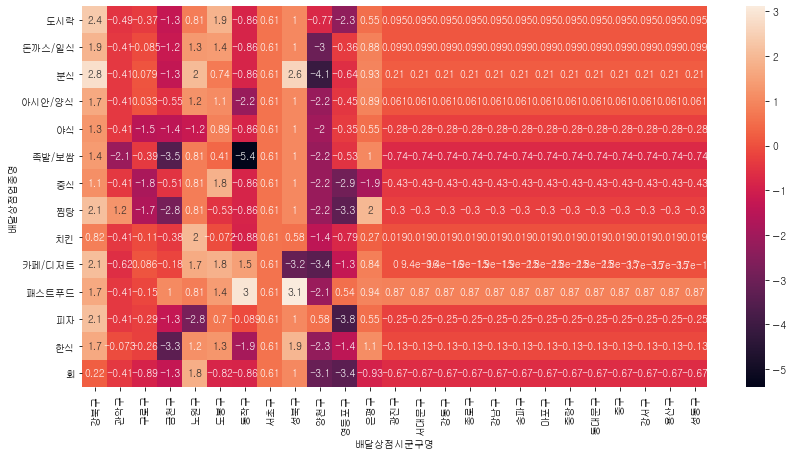

In [296]:
# 로버스트 정규화를 진행합니다.
median_ = np.median(dlvr_firstmile.values)
q75, q25 = np.percentile(dlvr_firstmile.values, [75, 25])
iqr_ = q75 - q25
dlvr_firstmile_rscore = pd.DataFrame((median_ - dlvr_firstmile.values)/iqr_, columns = dlvr_firstmile.columns, index=dlvr_firstmile.index)

plt.figure(figsize=(14, 7))
sns.heatmap(dlvr_firstmile_rscore, annot=True)
plt.show()

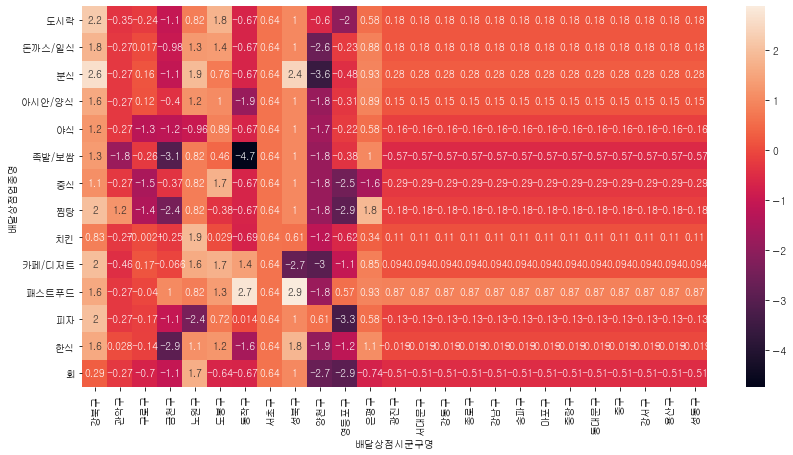

In [243]:
plt.figure(figsize=(14, 7))
sns.heatmap(dlvr_firstmile_zscore, annot=True)
plt.show()

## 생존 가능성

### 폐업률

In [244]:
# 기본적으로 인허가일자가 2019년 7월 31일 이후의 점포를 제거합니다.
# 그리고 폐업일자가 2017년 12월 31일 이전의 점포를 제거합니다.
# 2020.01.01 ~ 2020.12.31 까지
asdf2020_close = all_shop_df.loc[~(all_shop_df.폐업일자 <= '2019-12-31') & (all_shop_df.인허가일자 <= '2020-12-31')]
# 2019년 7월 31일 이후로 폐업한 가게는 영업중인 것으로 바꿔줍니다.
asdf2020_close.loc[asdf2020_close.폐업일자 > '2020-12-31', '상세영업상태명'] = '영업'
# 마찬가지로 폐업일자도 바꿔줍니다.
asdf2020_close.loc[asdf2020_close.폐업일자 > '2020-12-31', '폐업일자'] = np.nan

In [245]:
asdf2020_close.loc[asdf2020_close.상세영업상태명 == '영업', 'OC'] = 0
asdf2020_close.loc[asdf2020_close.상세영업상태명 == '폐업', 'OC'] = 1

In [246]:
asdf2020_close_seoul = asdf2020_close.loc[asdf2020_close.소재지주소광역시도 == '서울특별시']

In [247]:
shop_close = (pd.pivot_table(data=asdf2020_close_seoul.loc[~(asdf2020_close_seoul.업태구분명.isin(['기타', '패밀리레스트랑']))], index='소재지주소시군구', columns='업태구분명', values='OC')*100).T

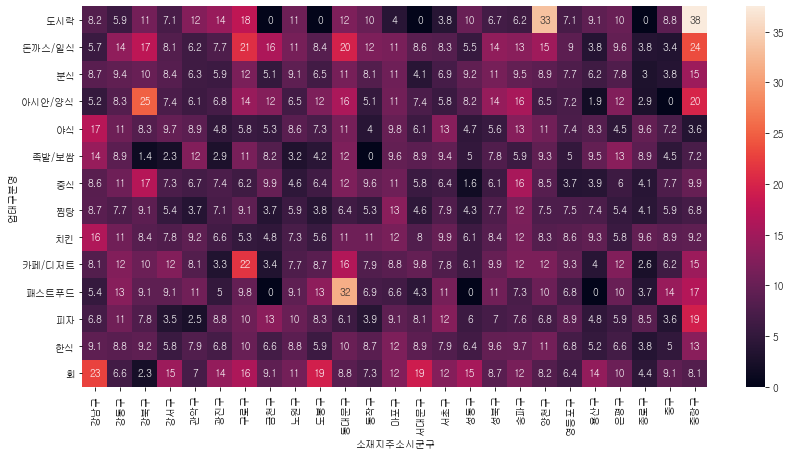

In [248]:
plt.figure(figsize=(14, 7))
sns.heatmap(shop_close, annot=True)
plt.show()

In [249]:
# # 정규화를 진행합니다.
# mean_ = shop_close.values.mean()
# std_ = shop_close.values.std()
# shop_close_zscore = pd.DataFrame((mean_ - shop_close.values) / std_, columns = shop_close.columns, index=shop_close.index)

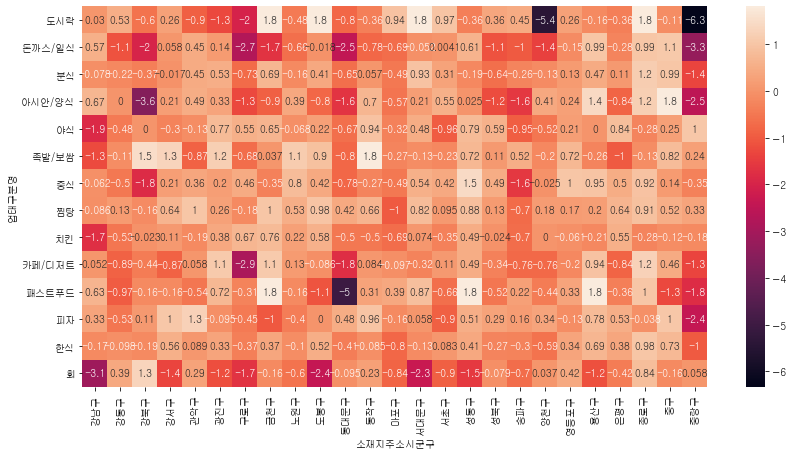

In [297]:
# 로버스트 정규화를 진행합니다.
median_ = np.median(shop_close.values)
q75, q25 = np.percentile(shop_close.values, [75, 25])
iqr_ = q75 - q25
shop_close_rscore = pd.DataFrame((median_ - shop_close.values)/iqr_, columns = shop_close.columns, index=shop_close.index)

plt.figure(figsize=(14, 7))
sns.heatmap(shop_close_rscore, annot=True)
plt.show()

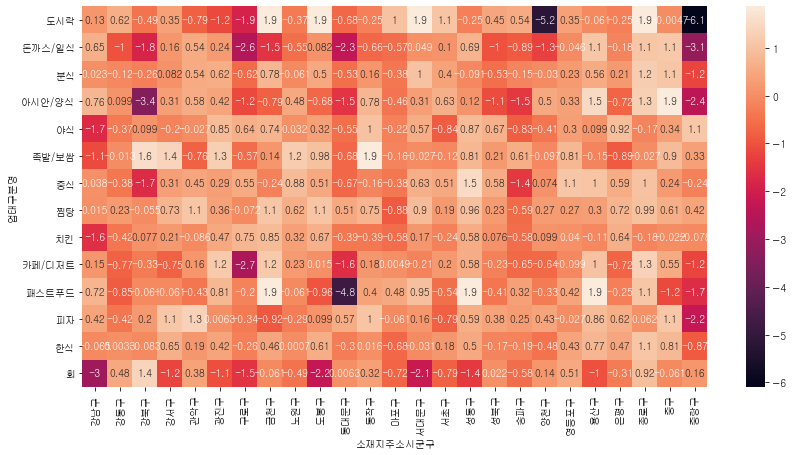

In [250]:
plt.figure(figsize=(14, 7))
sns.heatmap(shop_close_zscore, annot=True)
plt.show()

### 인구대비업체수비율

In [251]:
demo_shop = pd.merge(asdf_2020_seoul_sum, pop_table.reset_index()[['index', '총인구2020']], how='left', left_on='소재지주소시군구', right_on='index')

In [252]:
demo_shop.drop(['index', '상세영업상태명'], axis=1, inplace=True)

In [253]:
demo_shop['점포당인구수'] = demo_shop.총인구2020 / temp.관리번호

In [254]:
demo_shop_table = pd.pivot_table(data=demo_shop.loc[~(demo_shop.업태구분명.isin(['기타', '패밀리레스트랑']))], index='업태구분명', columns='소재지주소시군구', values='점포당인구수')

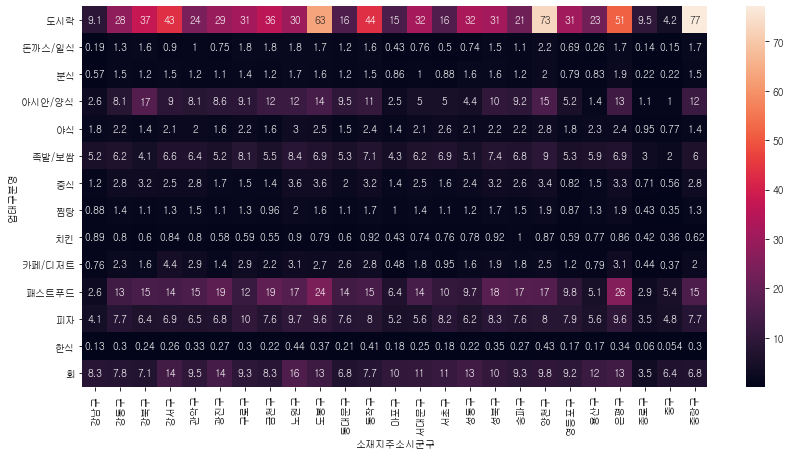

In [255]:
plt.figure(figsize=(14, 7))
sns.heatmap(demo_shop_table*0.001, annot=True)
plt.show()

In [256]:
# 인구대비업체수비율 정규화는 업종별로 다른 특성을 보이기 때문에 업종별로 따로 정규화를 실시합니다.
demo_shop_zscore = demo_shop_table.copy()
for col in list(demo_shop_table.columns):
    demo_shop_zscore[col] = (demo_shop_table[col] - demo_shop_table.mean(axis=1)) / demo_shop_table.std(axis=1)

In [257]:
# 또한 인구대비업체수비율은 너무 높아도 좋지않고, 나빠도 좋지 않습니다. 따라서 평균에 가까울수록 높은 점수를, 평균과 멀어질수록 낮은 점수를 주겠습니다.
# 전체 값을 음수로 전환하고, + 2을 해주겠습니다.
demo_shop_zscore_scaling = -(abs(demo_shop_zscore)) + 3

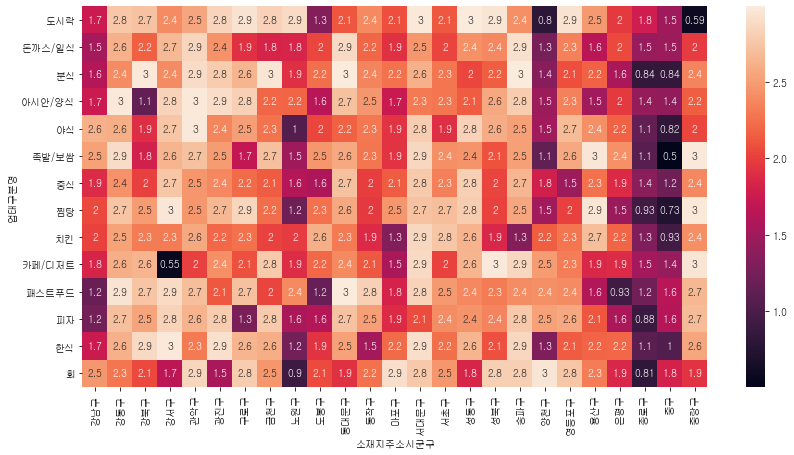

In [258]:
plt.figure(figsize=(14, 7))
sns.heatmap(demo_shop_zscore_scaling, annot=True)
plt.show()

## 배후지 매력도

### 1인가구비율

### MZ세대인구 비율

## 성장 가능성

### 배달주문 증가율

In [259]:
dlvr_uncanceled_seoul = dlvr_uncanceled.loc[dlvr_uncanceled.배달상점광역시도명 == '서울특별시']

In [260]:
dlvr_growth = (
    dlvr_uncanceled_seoul
    .loc[(dlvr_uncanceled_seoul.주문월.isin([2, 3, 4, 5])) & ~(dlvr_uncanceled_seoul.배달상점업종명.isin(['배달전문업체', '심부름']))]
    .groupby(['배달상점업종명', '주문월'])['순번'].count()
    .reset_index()
)

In [261]:
dlvr_growth['전월'] = dlvr_growth.순번.shift(1)
dlvr_growth['순증'] = dlvr_growth.순번 - dlvr_growth.전월
dlvr_growth['증가율'] = (dlvr_growth.순증 / dlvr_growth.전월) * 100

In [262]:
dlvr_growth_mean = (
    pd.pivot(data=dlvr_growth.loc[dlvr_growth.주문월.isin([3, 4, 5])], index='배달상점업종명', columns='주문월', values='증가율').mean(axis=1)
    .to_frame()
)

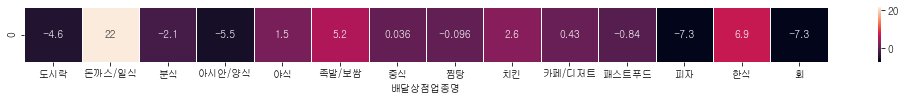

In [263]:
plt.figure(figsize=(18, 1))
sns.heatmap(dlvr_growth_mean.T, annot=True, linewidths=.5)
plt.show()

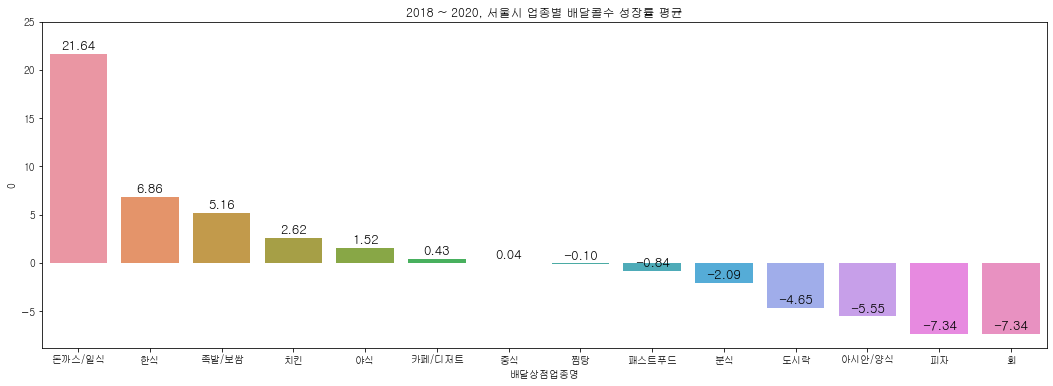

In [264]:
plt.figure(figsize=(18, 6))
plots = sns.barplot(data=dlvr_growth_mean, x=dlvr_growth_mean.index, y=0,
                   order=dlvr_growth_mean.sort_values(by=0, ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

plt.ylim(top=25)
plt.title('2018 ~ 2020, 서울시 업종별 배달콜수 성장률 평균')
plt.show()

In [265]:
# 정규화를 진행합니다.
mean_ = dlvr_growth_mean.mean()[0]
std_ = dlvr_growth_mean.std()[0]
dlvr_growth_mean.loc[:, 'zscore'] = (dlvr_growth_mean.loc[:, 0] - mean_) / std_

In [266]:
# 구별로 같은 값을 복제해줍니다.
for col in goo:
    dlvr_growth_mean[col] = dlvr_growth_mean.zscore
dlvr_growth_zscore = dlvr_growth_mean.iloc[:, 2:]

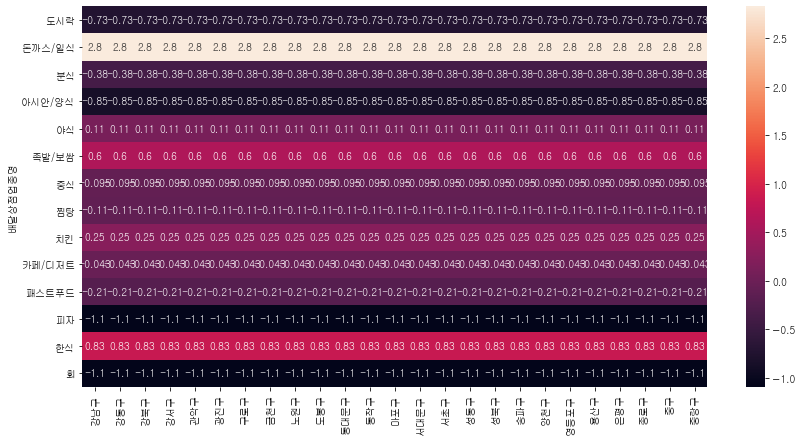

In [267]:
plt.figure(figsize=(14, 7))
sns.heatmap(dlvr_growth_zscore, annot=True)
plt.show()

### MZ세대증가율

최근 3개년 지역구별 MZ세대 증가율

In [268]:
# 인구테이블과 인구이동테이블을 합쳐서 MZ테이블을 만듭니다.
pop_mz = pd.concat([pop_transfer_fianl1.iloc[:, 7:], pop_table.iloc[:, 4:8]], axis=1)

In [269]:
# 전년도 MZ세대 전체 인구수 분에 당해년도 MZ세대 순이동수
pop_mz['2018MZ증감율'] = (pop_mz.MZ2018 / pop_mz.MZ인구2017) * 100
pop_mz['2019MZ증감율'] = (pop_mz.MZ2019 / pop_mz.MZ인구2018) * 100
pop_mz['2020MZ증감율'] = (pop_mz.MZ2020 / pop_mz.MZ인구2019) * 100

In [270]:
# 3년치를 평균내줍니다.
pop_mz['3년평균MZ증감율'] = pop_mz.iloc[:, 7:].mean(axis=1)

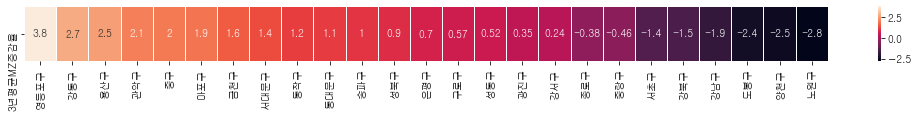

In [271]:
plt.figure(figsize=(18, 1))
sns.heatmap(pop_mz.iloc[:, -1].sort_values(ascending=False).to_frame().T.round(2), annot=True, linewidths=.5)
plt.show()

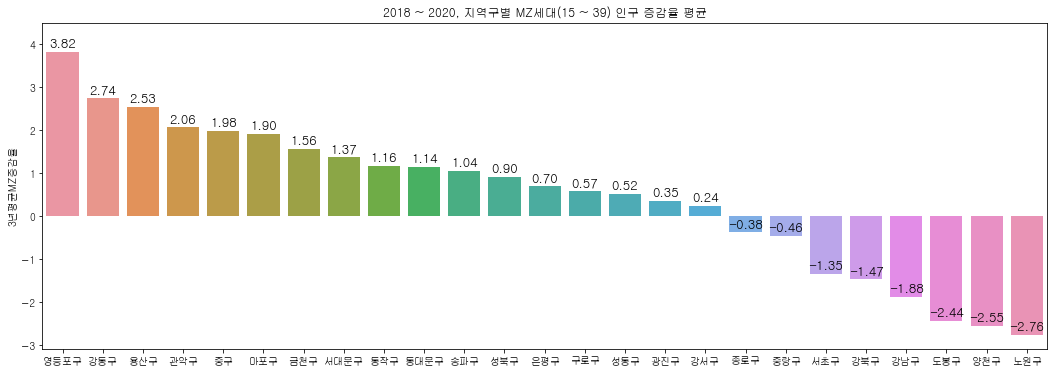

In [272]:
plt.figure(figsize=(18, 6))
plots = sns.barplot(data=pop_mz, x=pop_mz.index, y='3년평균MZ증감율',
                   order=pop_mz.sort_values(by='3년평균MZ증감율', ascending=False).index)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')

plt.ylim(top=4.5)
plt.title('2018 ~ 2020, 지역구별 MZ세대(15 ~ 39) 인구 증감율 평균')
plt.show()

In [273]:
pop_mz_mean = pop_mz.iloc[:, -1].to_frame()

In [274]:
# 정규화를 진행합니다.
mean_ = pop_mz_mean.mean()[0]
std_ = pop_mz_mean.std()[0]
pop_mz_mean.loc[:, 'zscore'] = (pop_mz_mean.iloc[:, 0] - mean_) / std_

In [275]:
# 업종별로 같은 값을 복제해줍니다.
for col in list(dlvr_lastmile.index):
    pop_mz_mean[col] = pop_mz_mean.zscore
pop_mz_zscore = pop_mz_mean.iloc[:, 2:].T

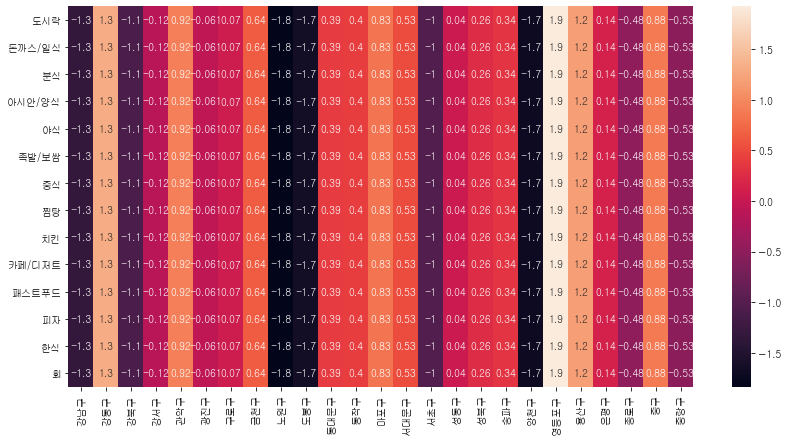

In [276]:
plt.figure(figsize=(14, 7))
sns.heatmap(pop_mz_zscore, annot=True)
plt.show()

## 다이아몬드 모형 TOP-3 샘플

In [277]:
temp = pd.DataFrame(dlvr_lastmile_zscore.values + dlvr_firstmile_zscore.values + shop_close_zscore.values + demo_shop_zscore.values + dlvr_growth_zscore.values + pop_mz_zscore.values,
            index=pop_mz_zscore.index, columns=pop_mz_zscore.columns)

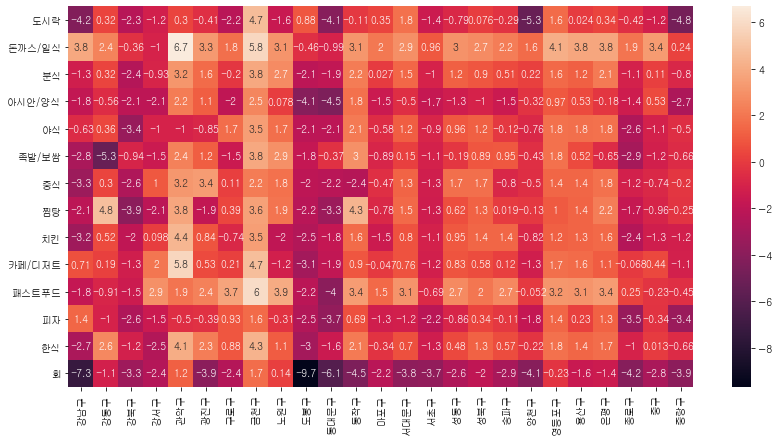

In [278]:
plt.figure(figsize=(14, 7))
sns.heatmap(temp, annot=True)
plt.show()

In [279]:
temp.stack().reset_index().sort_values(by=0, ascending=False).head(10)

level_0 level_1         0
29   돈까스/일식     관악구  6.681724
257   패스트푸드     금천구  5.995051
32   돈까스/일식     금천구  5.829483
229  카페/디저트     관악구  5.757582
176      찜탕     강동구  4.777595
232  카페/디저트     금천구  4.708646
7       도시락     금천구  4.687532
204      치킨     관악구  4.414501
186      찜탕     동작구  4.335929
307      한식     금천구  4.256074

# 참고 문헌

1. 한국농수산식품유통공사, 외식업체 마케팅 트렌드 조사 (2020년 12월.)
2. 오픈서베이 배달 서비스 트렌드 리포트 2020
3. 오픈서베이 배달 서비스 트렌드 리포트 2021
4. 시사저널, “6개월마다 판도 바뀌는 창업세계에서 생존 방법은?”, 김상훈 창업통tv 대표 기고, 2021.05.20., https://www.sisajournal.com/news/articleView.html?idxno=216928
5. 뉴시스, “코로나에 배달음식시장 호황… 작년 17조 달해”, 기자 이름 없음, 2021.02.22., https://newsis.com/view/?id=NISX20210222_0001347095
6. 조선일보, “밀려드는 동네배달 주문… 올해 1~2월 서울 식당 1350곳 개업”, 성유진 기고, 2021.04.07., https://www.chosun.com/economy/market_trend/2021/04/07/6UODGKNDGNGMXLYXBBJ6S76YSY/
7. 국민일보, “배달앱 ‘단건경쟁’에 라이더 기근… 저녁장사 접는 식당들, 최현규 기고, 2021.08.11., http://news.kmib.co.kr/article/view.asp?arcid=0924204404&code=11151400&cp=nv
8. 이정민, 김동준, and 아승일. "상업시설 업종별 밀도가 음식점 폐업에 미치." 국토계획 56.1 (2021).
9. 동아일보, "1인 가구 절반 이상이 단독주택 거주? 알고보니 ‘원룸’도 단독주택", 박해식, 2016.09.17., https://www.donga.com/news/Economy/article/all/20160917/80313267/2